# CIS 5450 Final Project

**Cardiovascular Disease Risk**

*Chandler Cheung, Keshav Ramesh, and Skyler Cheung*

# Introduction

The Cardiovascular Diseases Risk Dataset provides 308,854 observations with 19 different variables on various health-related risk behaviors and health conditions. This dataset is a subset of the Behavioral Risk Factor Surveillance System (BRFSS) dataset, which had 304 unique variables. The data was collected using telephone surveys from U.S. residents. This is an important dataset because it provides some insight on how certain personal lifestyle factors affect chronic health conditions, which is crucial in addressing chronic health conditions.

In particular, we are interested in evaluating how certain factors affect different health outcomes. We chose four different predictor variables: `Heart_Disease`, `Skin_Cancer`, `Arthritis`, and `General_Health`. These are prominent diseases and can dramatically affect everyday life. As such, we wanted to study what are some features that can be used to predict whether someone has these certain health conditions.

First, we performed some exploratory data analysis by plotting the relationships between different variables in the dataset. We noticed that there is a large class imbalance for the 4 predictor variables that we chose, which we need to take into account when creating our models. There are 283,883 observations without heart disease vs. 24,971 with; there are 278,860 observations without skin disease vs. 29.994 with; there are 207,783 observations without arthritis vs. 101071 with; there are 11,331 observations with poor general health, 35,810 with fair general health, 95,364 good general health, 110,395 very good general health, and 55,954 excellent general health. Comparing relationships between variables, we noticed males tended to be taller and have a slightly higher weight than females. There were no significant relationships between `Sex` and `Green_Vegetables_Consumption` and `FriedPotato_Consumption`.

Next, we cleaned the data by transforming categorical variables to numerical variables using one-hot encoding and direct mapping to integers. We also cleaned the `Diabetes` variable so that it is a binary variable, instead of having different levels for when someone had diabetes. Next, we performed some additional preprocessing of the data using principal component analysis. Looking at the correlation heatmap of the dataset, we noticed that there were some moderately high correlations between some variables, specifically `BMI` & `Weight` and `Sex` & `Height`. Using principal component analysis, we reduced the dimensionality of the dataset and removed the correlation effect, which would have hurt the performance of our models.

We decided to train 5 different models to compare the difference in performance for the following predictor variables: `Heart_Disease`, `Skin_Cancer`, and `Arthritis`. The five different models are the following: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Network. We chose decision trees as our baseline model because the are the quintessential model for classifications. Decision trees are built by choosing features to split the data. This makes it a common choice for classification tasks. To improve the decision tree models, we tried both random forest and gradient boosting, which are ensemble methods using tree models. By aggregating the predictions across many trees, random forest and gradient boosting models are more complex than a single decision tree. We chose to do both random forest and gradient boosting because we wanted to compare the different aggregation methods. For random forest, each tree is grown with a deep depth and many trees are used to average the variations and lower the mean variance of the model; additionally, only a sample of features are chosen at each split point when growing the trees. The advantage is that we can lower the mean variance of the model while keeping the bias relatively the same. For gradient boosting, trees are fitted to the residuals of the previous aggregated trees. The advantage is that fewer trees would be needed to achieve relatively good performance because each subsequent tree is trained on fitting the errors in the previous trees. After comparing the two models, we found that random forest does better. This suggests that there may be some noisy features in the dataset that the random forest model was able to average away. Another model that we used is Logistic Regression, which is another common model used for classification tasks. We tuned the logistic regression model using the L1 (lasso) penalty using balanced class weights to address class imbalance and one hot encoding. We used the L1 penalty because it promotes sparsity by setting some coefficients to 0 and also shrinks other coefficients. By promoting sparsity, we can interpret the model as selecting the important features by having nonzero coefficients for those features. Additionally, L1 deals with highly correlated variables by only selecting one of them. While this may lead to feature instability, it does not lead to prediction instability. The other model we tried is a neural network. We wanted to see if the model can learn some hidden relationships and patterns in the data to make better predictions. Neural networks are more complex than the other models because they contain the most parameters that need to be trained. Additionally, there are hidden layers that can learn non-linear patterns.

To compare the performance of the models, we used the F1 score. Initially, we looked at the accuracy, but we noticed that there was a imbalance of observations corresponding to each class for the predictor variable. As a result, if we optimized the model on accuracy, the model could always predict the majority class while ignoring all the features and achieve a relatively high accuracy. By using the F1 score, we want to improve both the precision and recall of the model. The precision is fraction of predicted positive observations that are actually positive. The recall is the fraction of true positive observations that are predicted positives. For good model performance, we want both of these metrics to be high. The F1 score is the harmonic mean of the precision and recall. To tune the different models, we optimized based on ttheeh F1 score and used the PCA-reduced one-hot encoding data.

We also performed unsupervised machine learning by using K-Means to identify clusters in the dataset for `General_Health`. Our hypothesis for this model before training was that data with `General_Health` outcome will be clustered together, which means that kMeans can identify these clusters. This would suggest that data points in the feature space are grouped together and that certain features can be used to predict `General_Health`. After training the kMeans model, within each cluster, we used the the majority label in the cluster as the prediction for points that fall within the cluster. Even after performing different feature engineering and sampling from each class equally to address the imbalanced class issue, the best model that we achieved had a low f1 score. This method for predicting `General_Health` was not as effective as we had hoped, which suggests that general health data points are not as clustered as we thought. This is illustrated with the plot of the data points projected onto 2D space.

At the end, we used the best models that we created and finetuned to make predictions on whether we had the 3 health ailments. To predict `Heart_Disease`, our best model is the tuned random forest model with an accuracy of 0.882 and an F1 score of 0.333. To predict `Skin_Cancer`, our best model is tuned logistic regression model with an accuracy of 0.707 and an F1 score of 0.317. To predict `Arthritis`, our best model is the tuned logistic regression model with an accuracy of 0.693 and an F1 score of 0.626. After estimating the data for ourselves for the features used in the dataset, the models made the following predictions: Chandler, Skyler, and Keshav have no heart disease, skin cancer, nor arthritis.

Overall, we uncovered many different relationships between personal lifestyle factors and chronic health conditions.

# Results and Analysis

**Performance of Different Models**

|  Model  |  Predictor Variable  |  Accuracy  |  F1 Score  |
|-----|-----|-----|-----|
| Logistic Regression (No regularization) | Heart Disease | 0.919 | 0.0839 |
| Logistic Regression (L2 penalty, balanced class weights) | Heart Disease | 0.732 | 0.300 |
| Logistic Regression (L1 penalty, balanced class weights, tuned) | Heart Disease | 0.731 | 0.299 |
| Logistic Regression (one hot encoding, L1 penalty, balanced class weights, tuned) | Heart Disease | 0.736 | 0.327 |
| Logistic Regression (No regularization) | Skin Cancer | 0.904 | 0.00470 |
| Logistic Regression (L2 penalty, balanced class weights) | Skin Cancer | 0.679 | 0.268 |
| Logistic Regression (L1 penalty, balanced class weights, tuned) | Skin Cancer | 0.676 | 0.268 |
| Logistic Regression (one hot encoding, L1 penalty, balanced class weights, tuned) | Skin Cancer | 0.707 | 0.317 |
| Logistic Regression (No regularization) | Arthritis | 0.712 | 0.412 |
| Logistic Regression (L2 penalty, balanced class weights) | Arthritis | 0.669 | 0.552 |
| Logistic Regression (L1 penalty, balanced class weights, tuned) | Arthritis | 0.661 | 0.554 |
| Logistic Regression (one hot encoding, L1 penalty, balanced class weights, tuned) | Arthritis | 0.693 | 0.626 |
| Decision Tree (Fully grown) | Heart Disease | 0.859 | 0.193 |
| Decision Tree (Tuned depth) | Heart Disease | 0.865 | 0.209 |
| Decision Tree (Fully grown) | Skin Cancer | 0.812 | 0.156 |
| Decision Tree (Tuned depth) | Skin Cancer | 0.830 | 0.198 |
| Decision Tree (Fully grown) | Arthritis | 0.615 | 0.423 |
| Decision Tree (Tuned depth) | Arthritis | 0.655 | 0.478 |
| Random Forest | Heart Disease | 0.918 | 0.0595 |
| Random Forest (Tuned) | Heart Disease | 0.882 | 0.333 |
| Random Forest | Skin Cancer | 0.902 | 0.0137 |
| Random Forest (Tuned) | Skin Cancer | 0.846 | 0.298 |
| Random Forest | Arthritis | 0.700 | 0.426 |
| Random Forest (Tuned) | Arthritis | 0.694 | 0.622 |
| Gradient Boosting | Heart Disease | 0.919 | 0.0830 |
| Gradient Boosting (Tuned) | Heart Disease | 0.916 | 0.118 |
| Gradient Boosting | Skin Cancer | 0.904 | 0.00968 |
| Gradient Boosting (Tuned) | Skin Cancer | 0.900 | 0.0647 |
| Gradient Boosting | Arthritis | 0.713 | 0.425 |
| Gradient Boosting (Tuned) | Arthritis | 0.732 | 0.539 |
| Neural Network (Tuned) | Heart Disease | - | 0.178 |
| Neural Network (Tuned) | Skin Cancer | - | 0.112 |
| Neural Network (Tuned) | Arthritis | - | 0.545 |
| Neural Network (Tuned, equal sampling) | General Health | 0.208 | 0.191 |


**Analysis**

From our exploratory data analysis, we sought to determine the relationships between the variables and examine the different samples. We initially had a hypothesis that people who eat more green vegetables would eat less fried potato and vice versa. When plotting the data on green vegetable consumption and fried potato consumption, we see that most of the data is clustered in the bottom left corner, which corresponds to people having low consumption in both green vegetables and fried potatoes. The plot is sparse in the top right, which signifies that there are not a lot of people who consume a lot of green vegetables and fried potatoes. This is what we expect. Additionally, we see that there are data points in the top left and bottom right, which correspond to people favoring either green vegetables or fried potatoes, but not both. When looking at the number of labels for each of the four predictors that we chosen (`Heart_Disease`, `Skin_Cancer`, `Arthritis`, `General_Health`), we noticed that there was a significant class imbalance. This would severely affect our model if we did not account of this because the model would end up always predicting the majority class and achieve a relatively high accuracy. As a result, in our models, we used class weights so that classes that appeared less frequently would be weighted the same. Additionally, we chose to optimize the F1 score because that performance metric takes into account the precision and recall of the model. Always predicting the majority class will have a low precision. A model with good performance will have high precision and high recall. Additionally, another part of our EDA that influenced our modeling was the correlations between variables. When plotting the correlation heat map, we see that there is moderately high correlations between some variables, such as `BMI` & `Weight` and `Sex` & `Height`. Having highly correlated variables in our model is bad because they are essentially redundant features and will contribute to overfitting of the model to the training data. This will lead to the model not performing as well when encountering new data. To address the correlations, we performed PCA so that it will identify the principal components that explain the most variance in the data. By reducing the dimensionality of the dataset, we can eliminate the correlation effect. Additionally, for the logistic regression, we used the L1 regularization penalty because it creates sparsity in the features that we can interpret. It would only select one of the correlated features and not keep all of them in the final model.

In our tuned logistic regression models, since we used the L1 regularization penalty, we can interpret the features with nonzero coefficients as being important for predicting the response variable. L1 regularization creates sparsity by setting some coefficients to be 0, so the features with nonzero coefficients are chosen by the model to be important. In this way, we created an interpretative model where we can examine the important features that influence the response variable. For predicting `Heart_Disease`, the features with nonzero coefficients are 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History', 'Alcohol_Consumption', 'General_Health_Excellent', 'General_Health_Fair', 'General_Health_Poor', 'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago', 'Checkup_Within the past year’. We see that the important features are a combination of lifestyle factors and other health conditions. This is not surprising, since each of these features affect the likelihood of heart disease to a certain extent. For predicting `Skin_Cancer`, the features with nonzero coefficients are 'Other_Cancer', 'Arthritis', 'Alcohol_Consumption', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_Within the past year’. We see that there are less important features compared to `Heart_Disease`. We did not expect that `Alcohol_Consumption` is an important feature for `Skin_Cancer` but the other important features make reasonable sense. For predicting `Arthritis`, the features with nonzero coefficients are 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Sex', 'BMI', 'Smoking_History', 'General_Health_Excellent', 'General_Health_Fair', 'General_Health_Poor', 'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago', 'Checkup_Within the past year’. These important features also make sense because as people get older, they have a higher probability of getting arthritis. Additionally, the features seem to be good indicators of arthritis.

Comparing the performance of all the models, we see random forest performs the best for predicting `Heart_Disease`, and logistic regression performs best for predicting `Skin_Cancer` and `Arthritis`. Logistic regression is a simpler model than random forests, gradient boosting, or neural networks. Our results signify that adding complexity to models do not necessarily improve the performance of the models. This is because increasing the complexity of the model will increase the variance of the model because the model can fit the training data more closely, making it hard for it to generalize to new data points. As such, it would have poor performance, even if they are tuned. Comparing the two ensemble methods of random forest and gradient boosting, we see that random forest performs better. This suggests that the existence of some noisy features in the dataset. Since random forest is based on averaging the predictions of the trees in the forest, the variance in each individual tree will be averaged away. In contrast, gradient boosting involves fitting subsequent trees on the error of the ensemble so far. Compared to a single decision tree, random forest does better, whereas gradient boosting does worse except for predicting `Arthritis`. The result of the random forest is expected because ensemble models tend to do better than single classifiers, but we were surprised that the gradient boosting classifier had such low performance. This could be due too much overfitting on the random variations of the training data. The neural network also had low performance. We only tuned the model using 5 epochs, due to time constraints, so that is a limitation of this analysis. However, the F1 score was not always increasing as the number of epochs increased. Overall, we see that our logistic regression models and random forest performed better than our baseline decision tree classifiers.

In our K-Means model for an unsupervised machine learning algorithm to create clusters for the `General_Health` data, the model did not perform as well as we had hoped. Our initial hypothesis was that there would be clear groupings in the data that the model can learn and make predictions. We initially realized that by using the majority label for the cluster, the model only ended up predicting ‘Very Good’ because most of the data in the training set had that label. To address this class imbalance, we decided to create a balanced training dataset by sampling each class equally. This significantly improved the performance of the model, and the model made predictions for all classes. However, it was still not as good as we thought it would be. When plotting the clusters of the data in 2D space, we see that there isn’t really a good way to group the data. They are all scattered around. So, it makes sense that the K-Means model was not able to identify good clusters to make good predictions.

The predictions that the model gave for our own data seem to be accurate too. As young, healthy college students, we do not have heart disease, skin cancer, or arthritis. So, the models made accurate predictions on our own data.

# Imports

We used various state-of-the-art Python libraries that are essential for data science and machine learning.

*   Numpy: data manipulation
*   Pandas: data handling and analysis
*   Seaborn: data visualization
*   Sci-kit Learn: machine learning models and pipelines
*   PyTorch: deep learning models



In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.spatial.distance import cdist

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans

import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Loading Data

Cardiovascular Disease Risk Prediction dataset from Kaggle. There are 19 different features that correspond to various lifestyle factors.

https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [ ]:
url = 'https://drive.google.com/uc?id=1BRhtuxkdmmJAZaBlbJAwEogcAGD-DTTN' # csv file link
cvd_df = pd.read_csv(url)
cvd_df.shape

(308854, 19)

Display the first 5 rows in the dataset

In [ ]:
cvd_df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

Explore data types of the variables in the dataset

In [ ]:
cvd_df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

# Exploratory Data Analysis

Summary statistics for numerical data

In [ ]:
print(cvd_df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

Value counts for categorical data

In [ ]:
for column in cvd_df.select_dtypes(include = ['object']):
  print(cvd_df[column].value_counts())
  print("")
  print("")

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64


Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64


Yes    239381
No      69473
Name: Exercise, dtype: int64


No     283883
Yes     24971
Name: Heart_Disease, dtype: int64


No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64


No     278976
Yes     29878
Name: Other_Cancer, dtype: int64


No     246953
Yes     61901
Name: Depression, dtype: int64


No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64


No     207783
Yes    101071
Name: Arthritis, dtype: int64


Female    160196
Male      148658
Name: Sex, dtype:

Checking for missing values

In [ ]:
print(cvd_df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


**Height vs. Weight**
* The scatterplot shows a very slight positive correlation between height and weight, which is expected as taller individuals generally weigh more, but there is no significant linear trend between height and weight.
* There is a wide distribution of weights for any given height, suggesting variability in body composition.
* The data is color-coded by sex, with Females in blue and Males in orange, suggesting that males ae taller and weigh slightly more, on average.

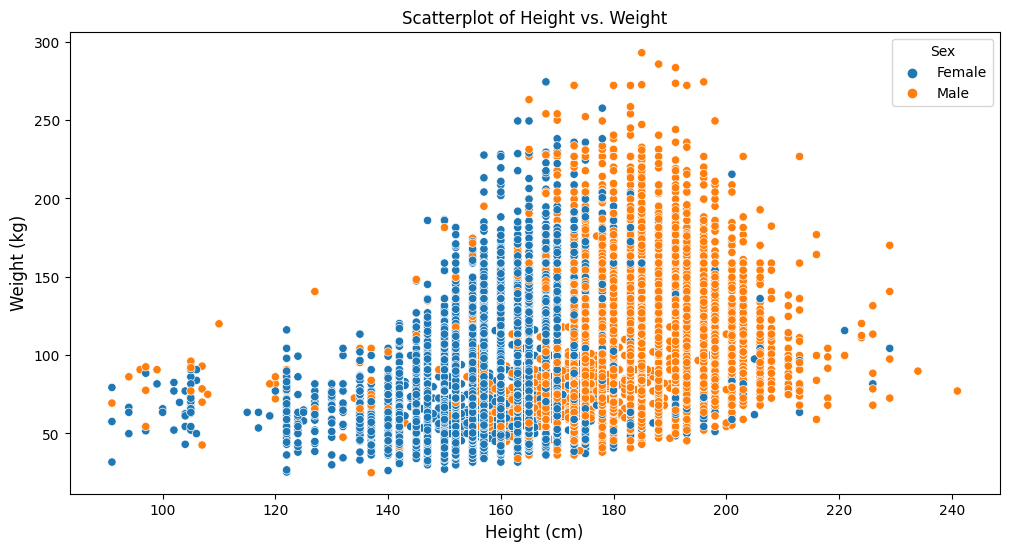

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Height_(cm)', y='Weight_(kg)', data=cvd_df, hue='Sex')

ax.set_xlabel("Height (cm)", fontsize=12)
ax.set_ylabel("Weight (kg)", fontsize=12)
plt.title("Scatterplot of Height vs. Weight")

plt.show()

**Fruit vs. Green Vegetables Consumption**
* A lot of data points where Fruit Consumption is less than 40 and Green Vegetables less than 60.
* Not much of a significant difference between vegetable and fruit consumption between genders.
* The points are spread out, indicaating that there isn't a strong correlation between fruit consumption and green vegetable consumption.

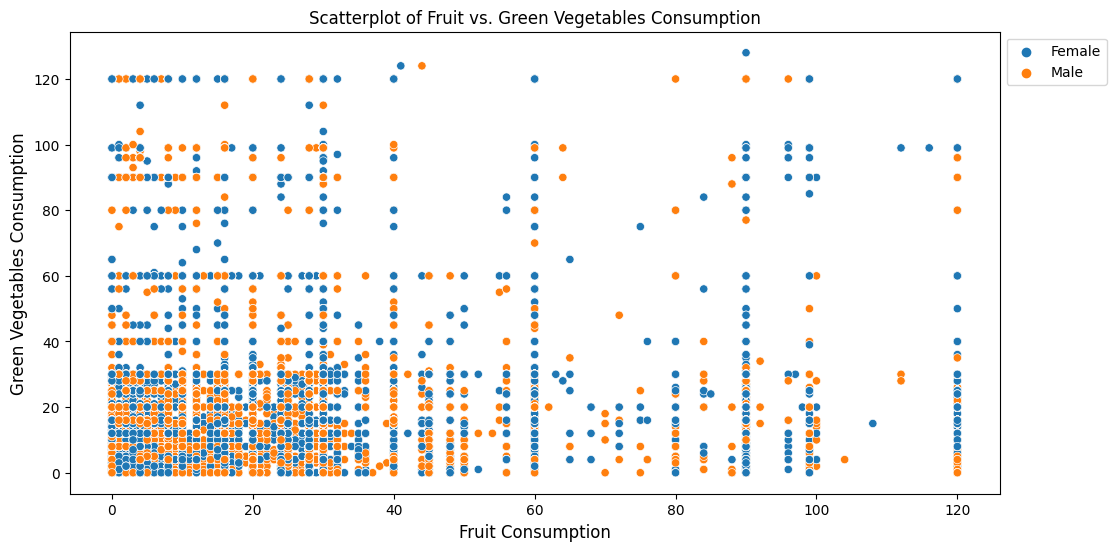

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Fruit_Consumption', y='Green_Vegetables_Consumption', data=cvd_df, hue='Sex')

ax.set_xlabel("Fruit Consumption", fontsize=12)
ax.set_ylabel("Green Vegetables Consumption", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Scatterplot of Fruit vs. Green Vegetables Consumption")

plt.show()

**Green Vegetables vs. Fried Potato Consumption**
* A lot of data points where Fruit Consumption is less than 40 and Fried Potato Consumption is less than 40.
* Not much of a significant difference between vegetable and fruit consumption between genders.
* The spread of points suggests a lack of correlation between the consumption of fried potatoes vs. green vegetables.

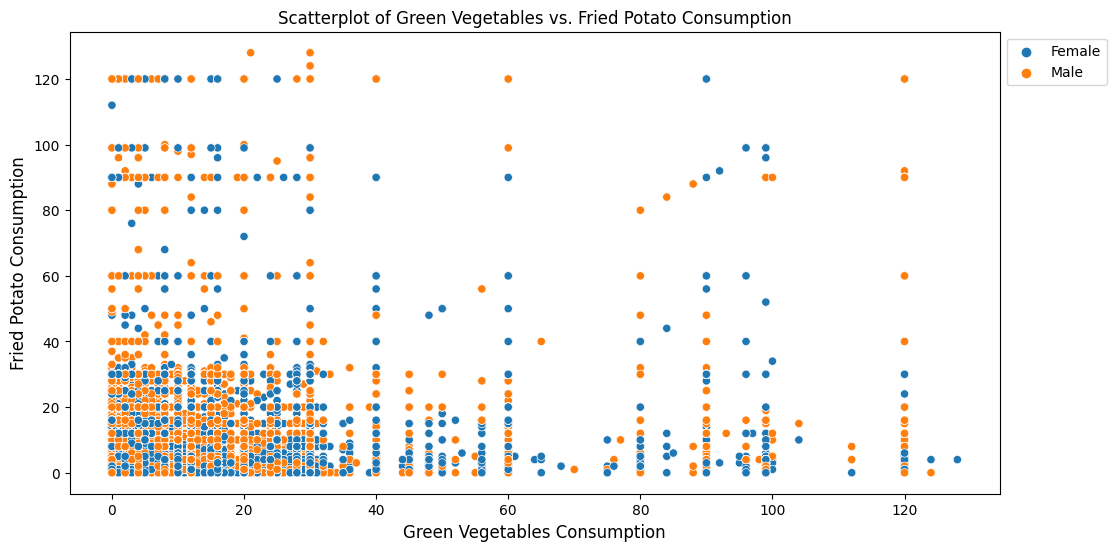

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Green_Vegetables_Consumption', y='FriedPotato_Consumption', data=cvd_df, hue='Sex')

ax.set_xlabel("Green Vegetables Consumption", fontsize=12)
ax.set_ylabel("Fried Potato Consumption", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Scatterplot of Green Vegetables vs. Fried Potato Consumption")

plt.show()

**Age vs. Alcohol Consumption**
* Younger age groups (18-24) have a slightly lower mean alcohol consumption compared to other age groups, and older group consume less alcohol as well.
* Alcohol consumption appears to be relatively consistent across the middle age categories, and seem to slightly peak particularly within (30-34), (35-39), and (65-69).

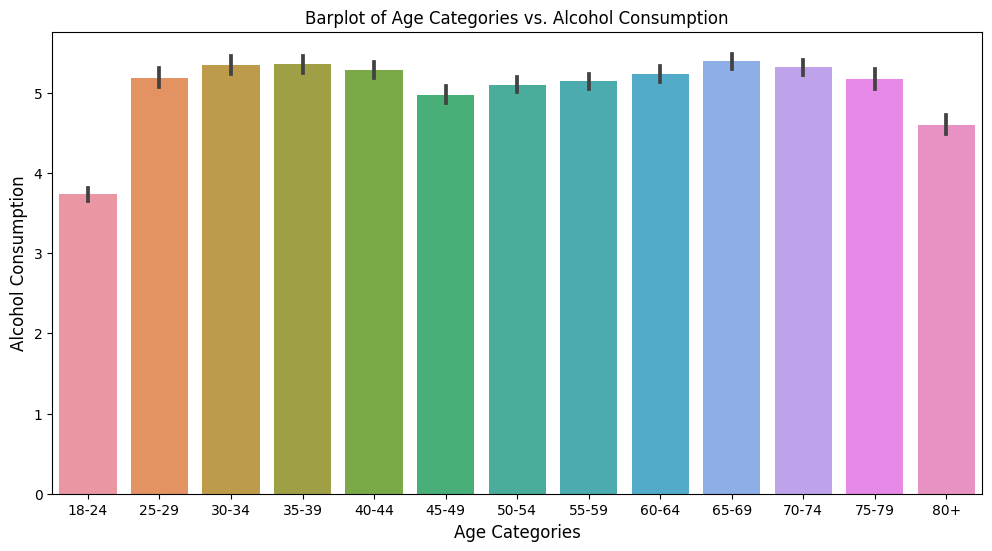

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Age_Category', y='Alcohol_Consumption', data=cvd_df,
            order=[
                '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
                '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
            ])

ax.set_xlabel("Age Categories", fontsize=12)
ax.set_ylabel("Alcohol Consumption", fontsize=12)
plt.title("Barplot of Age Categories vs. Alcohol Consumption")

plt.show()

**General Health Categories Distribution**
* Unequal distribution of general health categories, which range from "Poor" to "Excellent", with the vast majority of respondents reporting their health as "Very Good" or "Excellent".
* There are a lot more 'Good' and 'Very Good' subjects in the dataset, and the "Poor" category having the least number of responses could be due to a variety of factors, including fewer individuals in poor health or reluctance to report poor health.

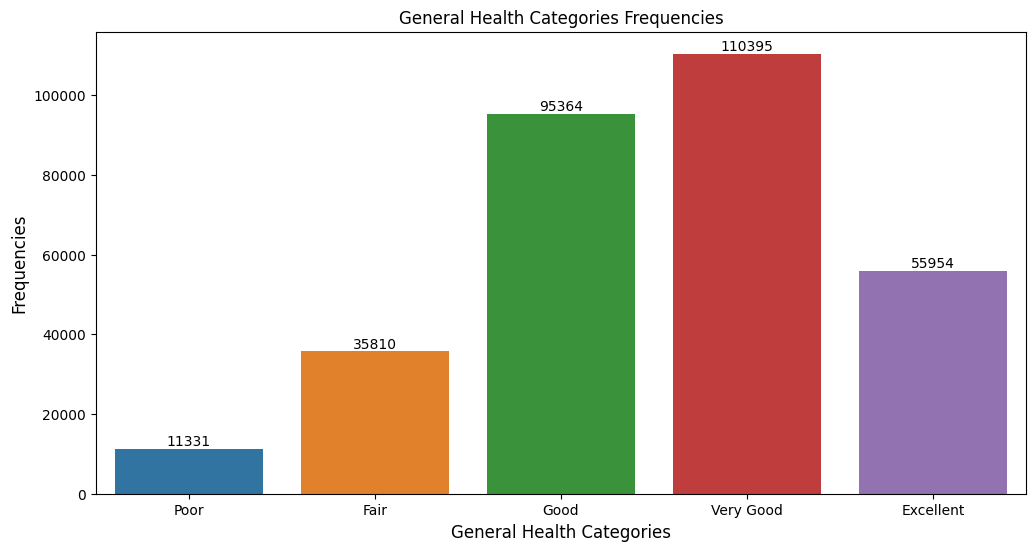

In [ ]:
health_counts = Counter(cvd_df['General_Health'])
labels, values = list(health_counts.keys()), list(health_counts.values())

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=labels, y=values, order=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

ax.bar_label(ax.containers[0])

ax.set_xlabel("General Health Categories", fontsize=12)
ax.set_ylabel("Frequencies", fontsize=12)
plt.title("General Health Categories Frequencies")

plt.show()

## Contingency Tables

In [ ]:
def create_contingency_plot(x):
    contingency_table = pd.crosstab(cvd_df['Sex'], cvd_df[x])

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', square=True)

    ax.set_xlabel(x.replace('_', ' '), fontsize=12)
    ax.set_ylabel("Sex", fontsize=12)
    plt.title("Frequency Counts")

    plt.show()

**Heart Disease vs. Age Distribution**
* A lot more people do not have heart disease than do, as a significant number of females and males reported not having hear disease.
* The number of females reporting heart disease is slightly less than the number of males.
* The data could suggest a gender difference in heart disease prevalence or reporting.

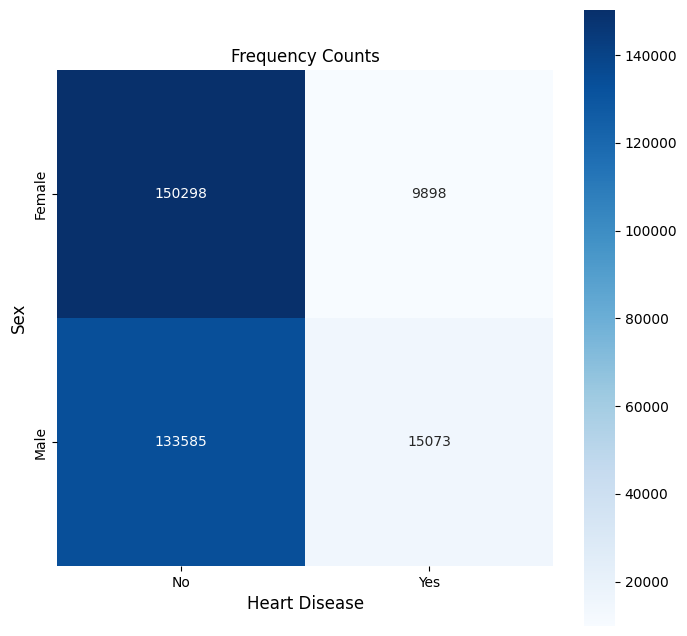

In [ ]:
create_contingency_plot('Heart_Disease')

**Skin Cancer vs. Age Distribution**
* A lot more people do not have skin cancer than do, for both the majority of females and males.
* The number of reported cases of skin cancer is higher in females than in males.
* This could indicate a higher prevalence or reporting rate of skin cancer among female subjects.

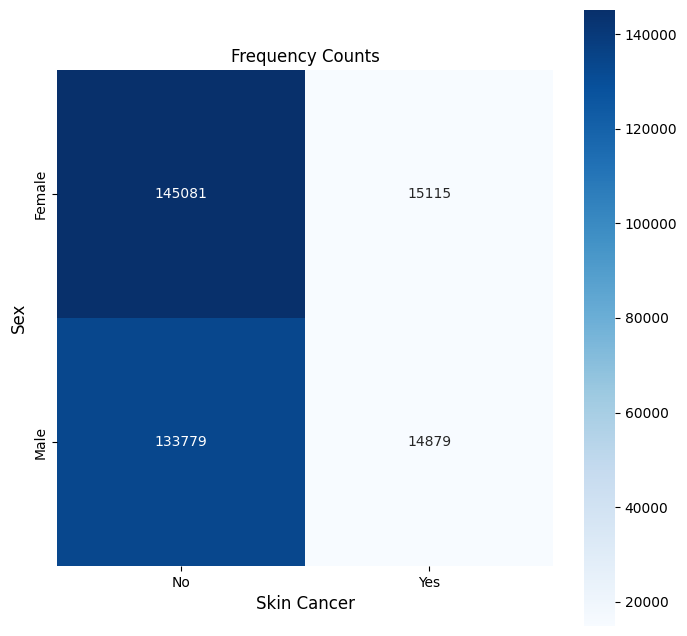

In [ ]:
create_contingency_plot('Skin_Cancer')

**Diabetes vs. Age Distribution**
* A lot more people do not have diabetes than do, for both females and males.
* There are more individuals with diabetes in the male population than in the female population.
* A notable number of females reported having diabetes only during pregnancy, which can likely be attributed to gestational diabetes and not typically found in males.

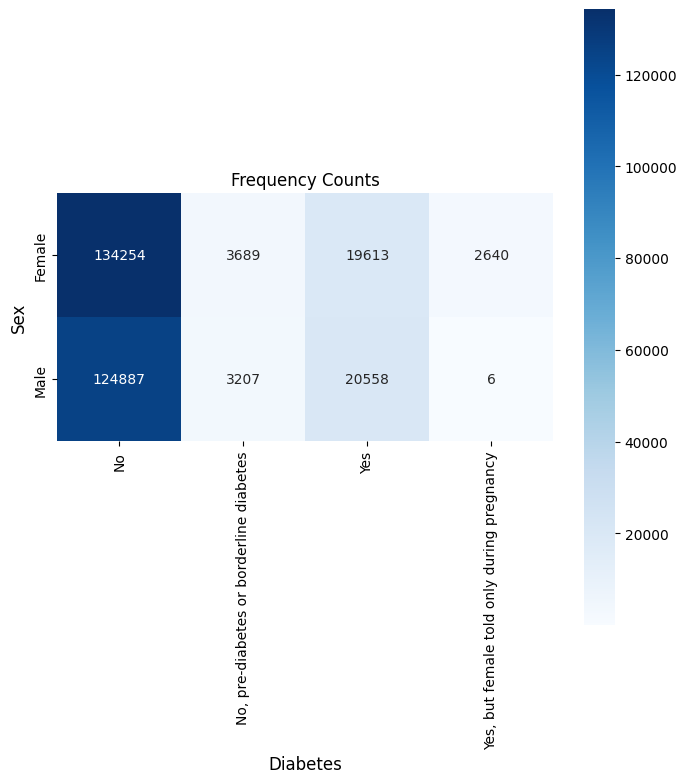

In [ ]:
create_contingency_plot('Diabetes')

**Arthritis vs. Age Distribution**
* A lot more people do not have arthritis than do, with more females than males reporting having arthrities.
* A significant number of both genders reported not having arthritis, but the number of cases is substantial in both, indicating a common condition.

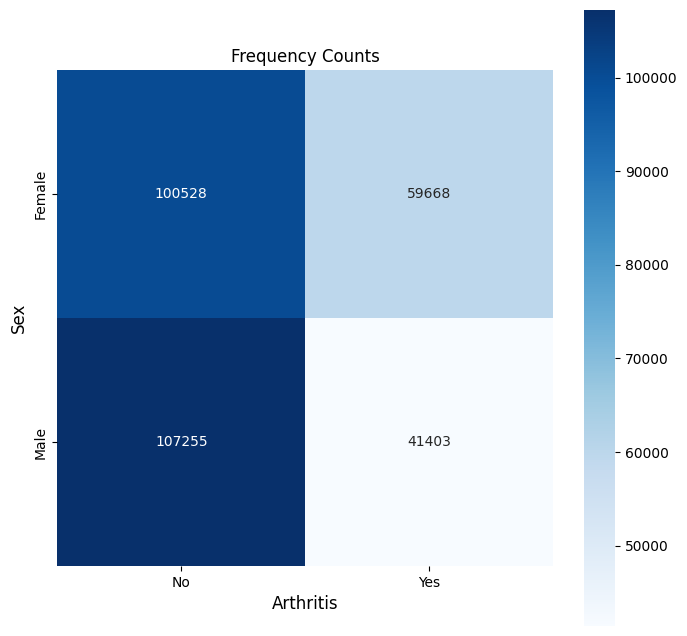

In [ ]:
create_contingency_plot('Arthritis')

**Smoking History vs. Age Distribution**
* More people have not smoked than did, but there is a higher number of males who have a history of smoking compared to females.
* The number of indnividuals without a smoking history is reported as higher in females than in males.

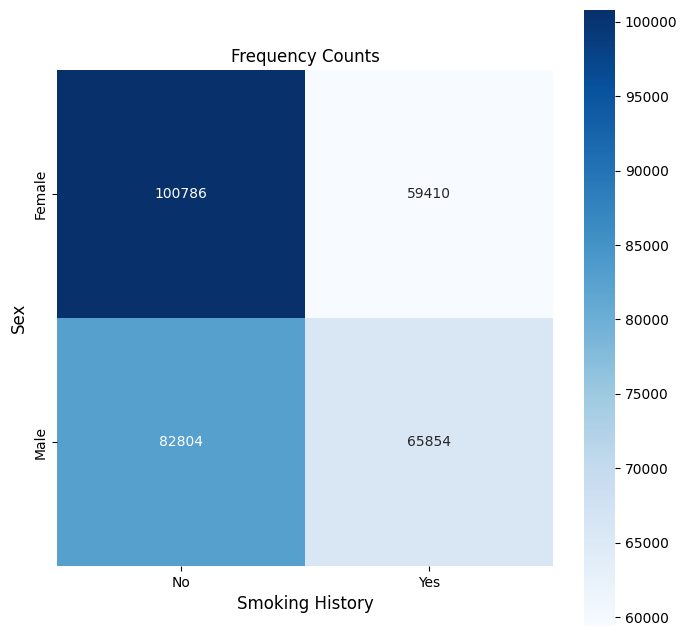

In [ ]:
create_contingency_plot('Smoking_History')

In [ ]:
def create_contingency_plot_2(x, y):
    contingency_table = pd.crosstab(cvd_df[x], cvd_df[y])

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', square=True)

    ax.set_xlabel(y.replace('_', ' '), fontsize=12)
    ax.set_ylabel(x.replace('_', ' '), fontsize=12)
    plt.title(f"Frequency Counts: {x.replace('_', ' ')} vs {y.replace('_', ' ')}")

    plt.show()

**Diabetes vs. General Health Conditions**
* Most individuals without diabetes reported their general health as either "Very Good" or "Excellent".
* The frequency of diabetes is higher in individuals with "Fair" or "Poor" general health than in another general health categories, which is as expected.
* There is a noticeable trend where as general health decreases, the frequency of diabetes increases, which makes sense logically.

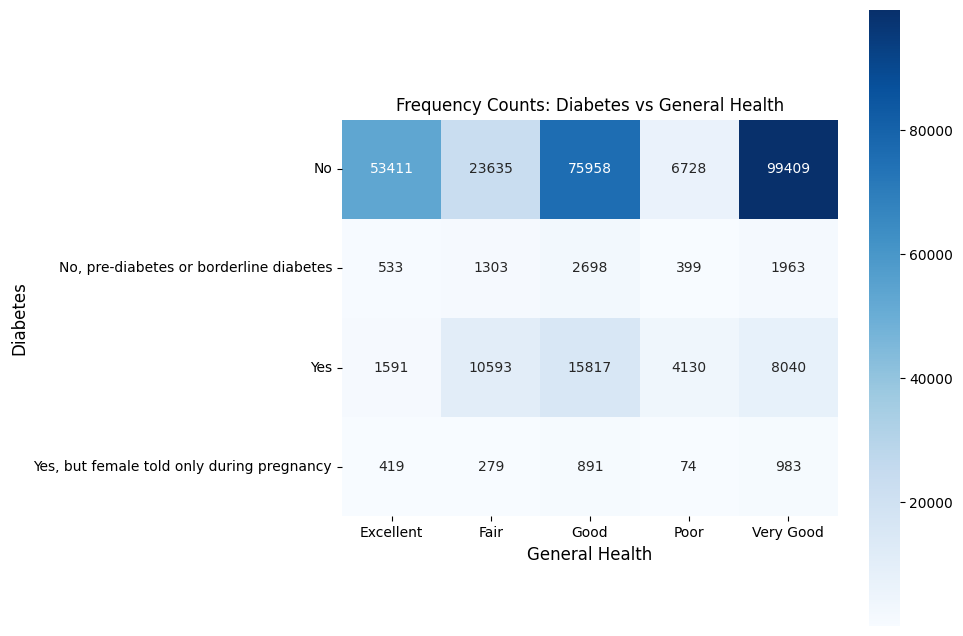

In [ ]:
create_contingency_plot_2('Diabetes', 'General_Health')

# Cleaning Data



* Change wording of 'Checkup' column
* Change 'No' to 0 and 'Yes' to 1
* In 'Diabetes' column, changed 'No, pre-diabetes or borderline diabetes' to 'No' (0) and 'Yes, but female told only during pregnancy' to 'Yes' (1)
* Change 'Sex' column to binary column with 0's and 1's
* Map 'General_Health' categories to numbers

Additionally, we explore two different ways to convert categorical variables to numerical variables so that those features could be used in machine learning models. One way is to map integers to the different levels of the categorical variable. The disadvantage of this is that this creates more distance between levels with numbers that are farther apart when in reality that separation does not exist. Another technique is using one-hot encoding, where each value gets turned into a vector that has length equal to the number of unique labels and it is 0 everywhere except for the actual label of the data. This creates sparse vectors. After training the models, we observed that models using one-hot encoding data performed better than the model using the other technique.

In [ ]:
# remove any null values
cvd_df = cvd_df.dropna()

In [ ]:
# replace 'No' with 0 and 'Yes' with 1 in all binary columns
binary_mapping = {
    'No': 0,
    'Yes': 1
}

cvd_df['Exercise'] = cvd_df['Exercise'].apply(lambda x: binary_mapping[x])
cvd_df['Heart_Disease'] = cvd_df['Heart_Disease'].apply(lambda x: binary_mapping[x])
cvd_df['Skin_Cancer'] = cvd_df['Skin_Cancer'].apply(lambda x: binary_mapping[x])
cvd_df['Other_Cancer'] = cvd_df['Other_Cancer'].apply(lambda x: binary_mapping[x])
cvd_df['Depression'] = cvd_df['Depression'].apply(lambda x: binary_mapping[x])
cvd_df['Diabetes'] = cvd_df['Diabetes'].apply(lambda x: binary_mapping[x.split(',')[0]])
cvd_df['Arthritis'] = cvd_df['Arthritis'].apply(lambda x: binary_mapping[x])
cvd_df['Smoking_History'] = cvd_df['Smoking_History'].apply(lambda x: binary_mapping[x])

In [ ]:
# change 'Sex' column to binary column with 0's and 1's
# 0 is Female and 1 is Male

gender_mapping = {
    'Female': 0,
    'Male': 1
}

cvd_df['Sex'] = cvd_df['Sex'].apply(lambda x: gender_mapping[x])

In [ ]:
cvd_df_encoded = pd.get_dummies(cvd_df, columns=['General_Health', 'Age_Category', 'Checkup'])

In [ ]:
# clean up 'Checkup' column
checkup_mapping = {
    'Within the past year': 'past 1 years',
    'Within the past 2 years': 'past 2 years',
    'Within the past 5 years': 'past 5 years',
    '5 or more years ago': '5+ years',
    'Never': 'Never'
}

cvd_df['Checkup'] = cvd_df['Checkup'].apply(lambda x: checkup_mapping[x])

In [ ]:
# change 'General_Health' column to column with numbers

health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

cvd_df['General_Health'] = cvd_df['General_Health'].apply(lambda x: health_mapping[x])

# Splitting Dataset into Training and Testing Sets

Split dataset with features and predictor variable for machine learning purposes, taking several parameters such as the target variable, a seed for a random number generator, test size, and boolean flags, in order to use scikit-learn to standardize features.

In [ ]:
class DataSplitter:
    def __init__(self, predictor, seed=42, test_size=0.2, numerical=False, encoded=False):
        if encoded:
            columns_to_drop = cvd_df_encoded.filter(like=predictor).columns
            features = cvd_df_encoded.drop(columns=columns_to_drop)
        elif numerical:
            features = cvd_df.drop(columns=[predictor, 'Age_Category', 'Checkup',
                                            'Checkup', 'Exercise', 'Heart_Disease',
                                            'Skin_Cancer', 'Other_Cancer', 'Depression',
                                            'Diabetes', 'Arthritis', 'Sex',
                                            'Age_Category', 'Smoking_History'])
        else:
            features = cvd_df.drop(columns=[predictor, 'Age_Category', 'Checkup'])

        target = cvd_df[predictor]

        X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                            test_size=test_size, random_state=seed)

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        scaler = StandardScaler()

        self.X_train_scaled = scaler.fit_transform(X_train)
        self.X_test_scaled = scaler.transform(X_test)


In [ ]:
hd_data = DataSplitter('Heart_Disease')
hd_data_encoded = DataSplitter('Heart_Disease', encoded=True)
gh_data = DataSplitter('General_Health')
gh_num_data = DataSplitter('General_Health', numerical=True)
gh_data_encoded = DataSplitter('General_Health', encoded=True)
sc_data = DataSplitter('Skin_Cancer')
sc_data_encoded = DataSplitter('Skin_Cancer', encoded=True)
a_data = DataSplitter('Arthritis')
a_data_encoded = DataSplitter('Arthritis', encoded=True)

# Preprocessing

## Correlation Heatmap

* Relatively strong positive correlations between Weight and BMI
* Relatively strong positive correlations between Height and Sex
* Moderate positive correlations between General Health and Exercise
* Moderate positive correlations between Weight and Height
* Moderate positive correlations between Weight and Sex
* Moderate positive correlations between Fruit Consumption and Green Vegetable Consumption

* Moderate negative correlations between Heart Disease and General Health
* Moderate negative correlations between Diabetes and General Health
* Moderate negative correlations between Arthritis and General Health
* Moderate negative correlations between BMI and General Health

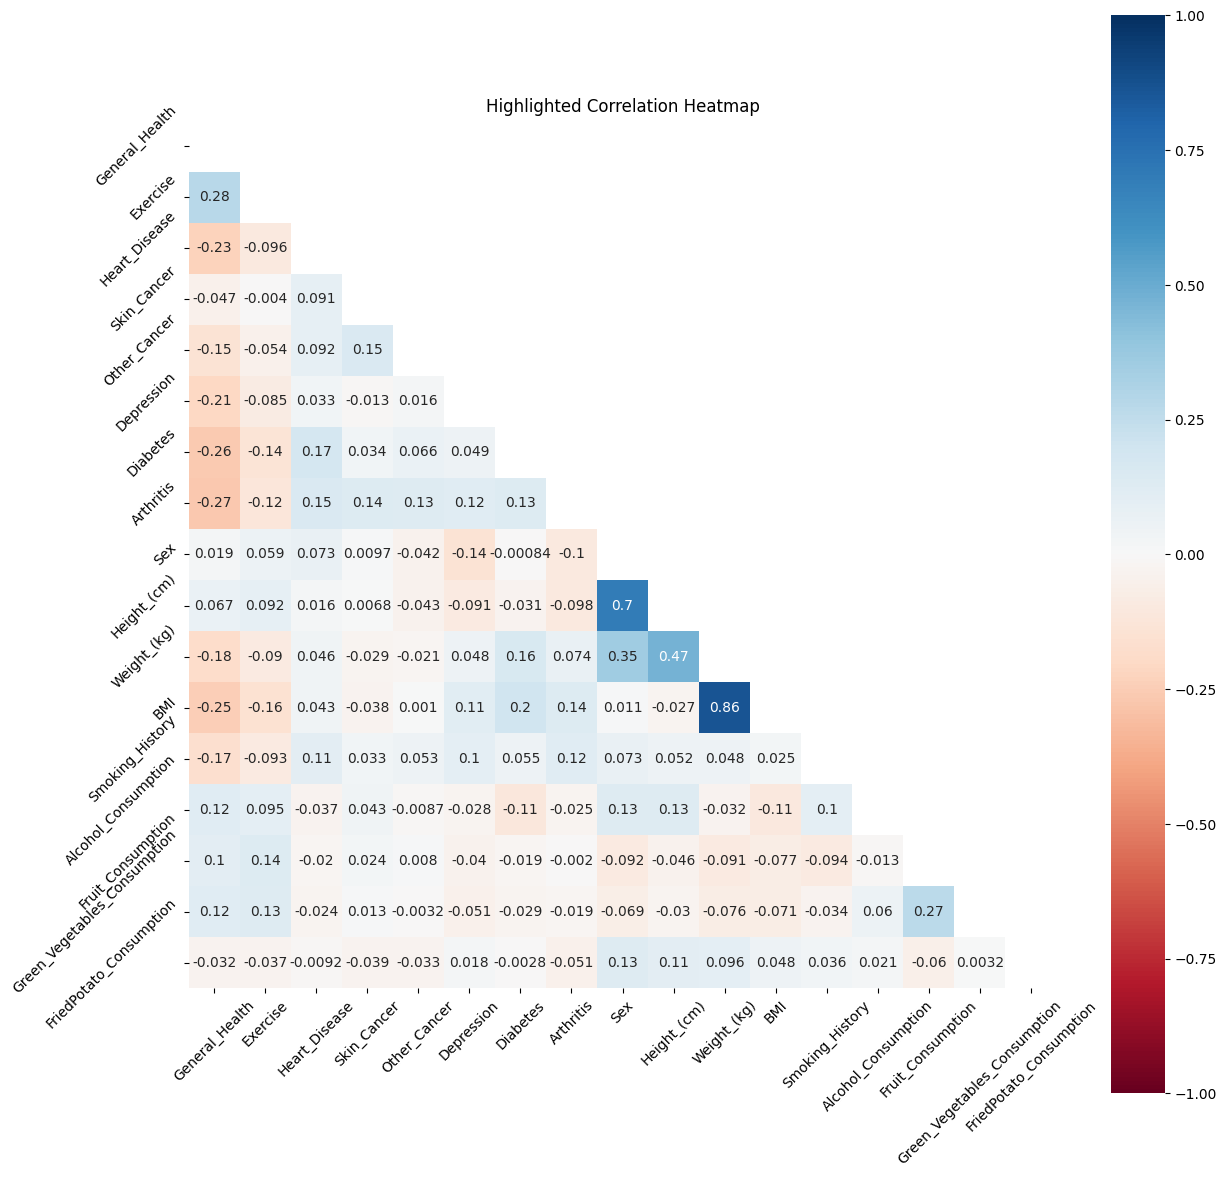

In [ ]:
corr_mat = cvd_df.corr(numeric_only=True)

# Mask for upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr_mat, mask=mask, cmap='RdBu', vmin=-1, vmax=1,
            annot=True, square=True)

ax.set_title("Highlighted Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Principal Component Analysis

PCA is a technique to reduce the dimensionality of the dataset by determining the components that explain the most variance in the data. Afterwards, we transform the dataset by project the on the components space. To determine the appropriate number of components, we look at the explained cumulative variance plot. We chose the number of principal components that explain a total of at least 80% of the variance in the data.

### Heart Disease Data

Top 11 principal components explain more than 80% of the variance in the data

In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(hd_data.X_train)
X_test_scaled = scaler.transform(hd_data.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
evrs = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

The graph is a visualization of a Principal Component Analysis (PCA) explained variance plot, which is commonly used to determine the number of principal components to keep in a dimensionality reduction process. Here's what it shows:

 - Cumulative Explained Variance Ratio (blue line and dots): This line chart indicates the total variance explained by the principal components up to that point. For example, the first point represents the variance explained by the first principal component, the second point the total variance explained by the first two components, and so on. It's helpful in understanding how many components are needed to capture a significant amount of information.

 - Individual Explained Variance Ratio (gray bars): The bar chart represents the variance explained by each individual principal component. It shows how much new information each subsequent component adds.

 - Red Dashed Line: This horizontal line is often used as a cutoff threshold, which in this case is set at 0.8 or 80%. It shows the point at which the cumulative explained variance reaches the desired level of total variance that one might wish to capture in the data.

The x-axis indicates the number of principal components, while the left y-axis shows the cumulative explained variance ratio and the right y-axis shows the individual explained variance ratio.

This plots helps in deciding how many principal components to retain by showing both the individual and cumulative contribution of each component to the total variance. When the cumulative explained variance curve flattens out or reaches a specific threshold (like 80% in this case), it suggests that adding more components does not significantly increase the amount of variance explained, which can inform the decision on how many components to keep for further analysis.

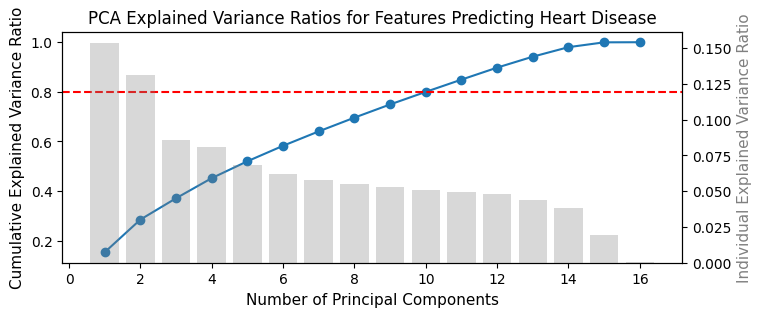

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting Heart Disease')
plt.show()

We can then refit and transform the dataset to use 11 principal components.

In [ ]:
# Refit PCA
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

hd_data.X_train_pca = X_train_pca
hd_data.X_test_pca = X_test_pca

Now, we break down the principal components of the dataset and examine them one by one.

In [ ]:
# Loadings analysis

# Extracting the loadings
loadings = pca.components_

# Creating a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=hd_data.X_train.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

# Showing the loadings for the first few components
print(loadings_df.head())

     General_Health  Exercise  Skin_Cancer  Other_Cancer  Depression  \
PC1       -0.318621 -0.211270     0.009594      0.047268    0.114313   
PC2       -0.318582 -0.259250     0.066713      0.161414    0.240495   
PC3        0.172450  0.110519    -0.338397     -0.308072   -0.049668   
PC4       -0.017412  0.213788     0.376920      0.304147   -0.082583   
PC5       -0.031702  0.067847    -0.298862     -0.288763    0.482834   

     Diabetes  Arthritis       Sex  Height_(cm)  Weight_(kg)       BMI  \
PC1  0.234604   0.163789  0.252427     0.254047     0.550214  0.481799   
PC2  0.199895   0.292486 -0.494425    -0.518062    -0.172702  0.096128   
PC3  0.030337  -0.206172 -0.222678    -0.171662     0.275665  0.409364   
PC4  0.143613   0.277958  0.032652     0.088204     0.131785  0.098667   
PC5 -0.169516   0.052610 -0.107182    -0.061652     0.023457  0.062685   

     Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
PC1         0.143331            -0.058482          -0.1756

**Simple test of how PCA affects Model Performance**

We built a simple logistic regression model to compare how the PCA-transformed data affects the performance of the model. We used the dataset in which the categorical data is mapped to integers. We see that the model using the PCA-reduced data had a similar performance in terms of accuracy to the model using the original data.

 - Model accuracy with original features (approximately 0.9149): This number shows how well the logistic regression model, trained on the original unscaled features, was able to correctly predict the outcomes on the test dataset. An accuracy of around 0.9149 means that about 91.49% of the predictions made by the model were correct.

 - Model accuracy with PCA-reduced features (approximately 0.9188): This number reflects the accuracy of the logistic regression model that was trained on the PCA-reduced features. An accuracy of around 91.88% suggests that 0.9188 of the model's predictions were correct when using the dimensionality-reduced dataset.

In [ ]:
# Model performance evaluation

# Example: Logistic Regression with original and PCA-reduced data
logreg = LogisticRegression()
logreg.fit(X_train_scaled, hd_data.y_train)
score_original = logreg.score(X_test_scaled, hd_data.y_test)

logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, hd_data.y_train)
score_pca = logreg_pca.score(X_test_pca, hd_data.y_test)

print(f"Model accuracy with original features: {score_original}")
print(f"Model accuracy with PCA-reduced features: {score_pca}")

Model accuracy with original features: 0.91942821064901
Model accuracy with PCA-reduced features: 0.9188130352430752


PCA using one hot encoding data for `Heart_Disease`

In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(hd_data_encoded.X_train)
X_test_scaled = scaler.transform(hd_data_encoded.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
explained_variance_ratevrsios = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

From this graph, we can see that the first few principal components contribute significantly to the variance. For instance, the first component explains just under 15% of the variance.

Additionally, the cumulative explained variance reaches the 80% threshold at around 9 or 10 components, as indicated by where the cumulative line intersects the threshold line. This suggests that one could use 9 or 10 components for further analysis and still retain 80% of the variance in the data.

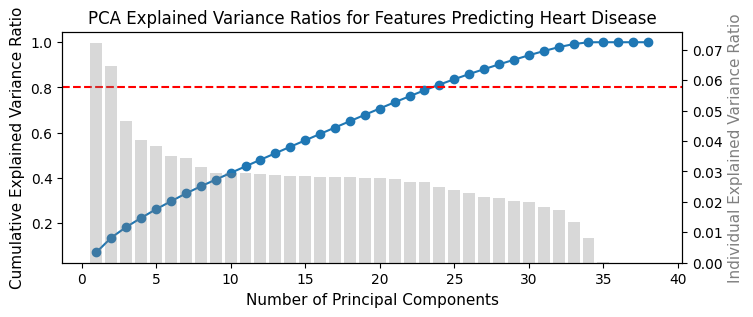

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting Heart Disease')
plt.show()

Refit and transform dataset using 24 principal components. Top 24 prinicipal components explain more than 80% of the variance in the data for heart disease using one hot encoding.

In [ ]:
# Refit PCA
pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

hd_data_encoded.X_train_pca = X_train_pca
hd_data_encoded.X_test_pca = X_test_pca

### Skin Cancer Data

Top 10 principal components explain more than 80% of the variance in the data

In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(sc_data.X_train)
X_test_scaled = scaler.transform(sc_data.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
evrs = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

For this specific graph, we can make several observations:

The cumulative variance sharply increases with the first few components, indicating they capture most of the information.
Around the 10th component, the cumulative explained variance crosses the 80% threshold line, suggesting that you might not need more than 10 components to retain 80% of the variance in the dataset.
The individual explained variance of each component decreases as we move to higher-numbered components, reflecting that they add less new information.

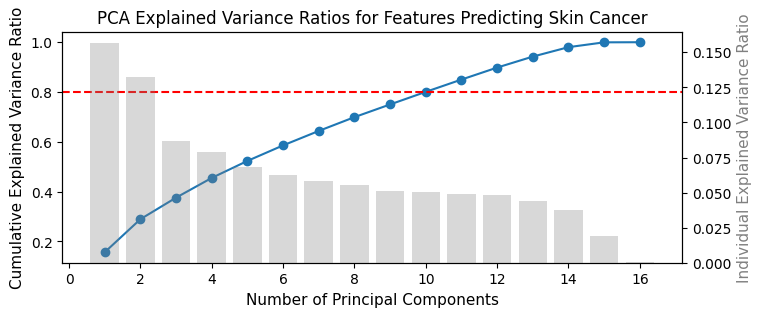

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting Skin Cancer')
plt.show()

Refit and transform data using 10 principal components

In [ ]:
# Refit PCA
pca = PCA(n_components=10)
sc_data.X_train_pca = pca.fit_transform(X_train_scaled)
sc_data.X_test_pca = pca.transform(X_test_scaled)

PCA using one hot encoding data for `Skin_Cancer`



In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(sc_data_encoded.X_train)
X_test_scaled = scaler.transform(sc_data_encoded.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
evrs = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

In this graph, our 80% threshold line indicates that around 24 components are sufficient to capture 80% of the variance in the dataset, with the overall graph extending to 40 components total that are derived from PCA.

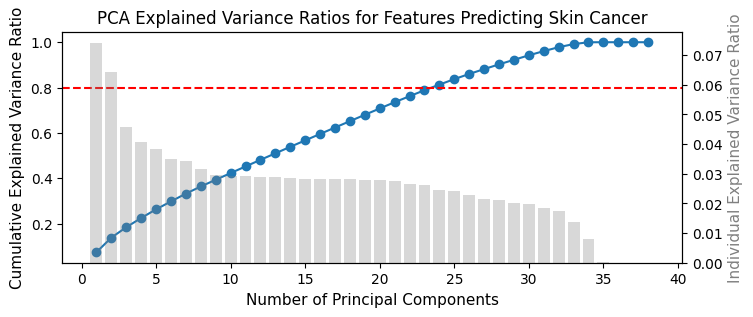

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting Skin Cancer')
plt.show()

Refit and transform data using 24 principal components. Top 24 principal components explain more than 80% of the variance in the data for skin cancer using one hot encoding.

In [ ]:
# Refit PCA
pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

sc_data_encoded.X_train_pca = X_train_pca
sc_data_encoded.X_test_pca = X_test_pca

### Arthritis Data

Top 11 principal components explain more than 80% of the variance in the data

In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(a_data.X_train)
X_test_scaled = scaler.transform(a_data.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
evrs = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

This graph, which uses PCA for features predicting arthritis, indicates that the cutoff level for selecting the number of components to keep lies at the 11th component, indicating that there are only 11 components that are actually needed to explain 80% of variance in the dataset.

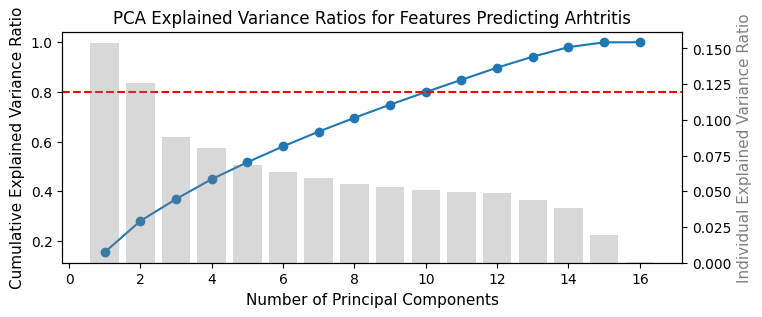

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting Arthritis')
plt.show()

Refit and transform data using 11 principal components

In [ ]:
# Refit PCA
pca = PCA(n_components=11)
a_data.X_train_pca = pca.fit_transform(X_train_scaled)
a_data.X_test_pca = pca.transform(X_test_scaled)

PCA using one hot encoding data for Arthritis

In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(a_data_encoded.X_train)
X_test_scaled = scaler.transform(a_data_encoded.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
evrs = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

From this graph, one can infer that a relatively large number of principal components (approximately 24) are required to explain a significant portion of the variance (at least 80%) within the dataset. This indicates that dimensionality reduction through PCA would be effective for this dataset, as it retains the most informative features while reducing the number of variables, which could help to simplify models, reduce computation time, and possibly improve the generalization of a predictive model for arthritis.

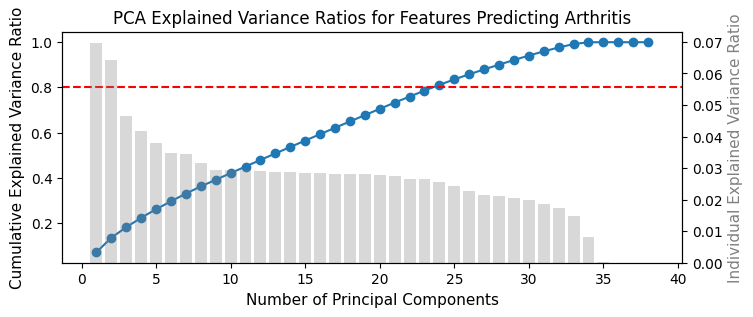

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting Arthritis')
plt.show()

Refit and transform data using 24 principal components. Top 24 principal components explain more than 80% of the variance in the data for arthritis using one hot encoding.

In [ ]:
# Refit PCA
pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

a_data_encoded.X_train_pca = X_train_pca
a_data_encoded.X_test_pca = X_test_pca

### General Health Data

In [ ]:
# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(gh_data_encoded.X_train)
X_test_scaled = scaler.transform(gh_data_encoded.X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
evrs = pca.explained_variance_ratio_

cum_evr = []

cum_ratio = 0
for i in range(len(evrs)):
    cum_ratio += evrs[i]
    cum_evr.append(cum_ratio)

**Explained Cumulative Variance Plot**

The x-axis numbers the principal components derived from the PCA, extending to about 35 in this case. From this graph, one can infer that a relatively large number of principal components (approximately 22) are required to explain a significant portion of the variance (at least 80%) within the dataset

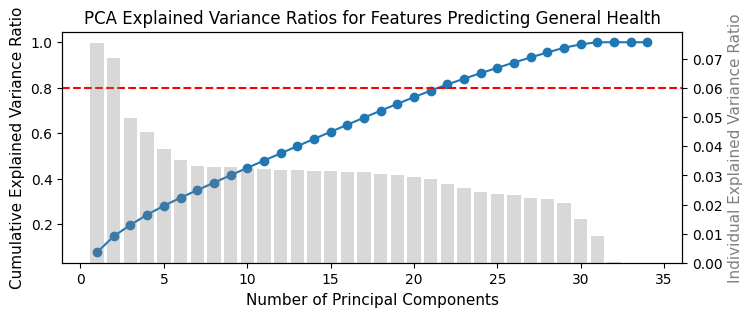

In [ ]:
# Variance ratio bar chart
fig, ax1 = plt.subplots(figsize=(8, 3))

# Line plot for cumulative explained variance
ax1.plot(range(1, len(cum_evr) + 1), cum_evr)
ax1.scatter(range(1, len(cum_evr) + 1), cum_evr)
ax1.axhline(0.8, color='red', linestyle='dashed')
ax1.set_xlabel('Number of Principal Components', fontsize=11)
ax1.set_ylabel('Cumulative Explained Variance Ratio', fontsize=11)

# Bar chart for individual explained variance
ax2 = ax1.twinx()
ax2.bar(range(1, len(evrs) + 1), evrs, alpha=0.3, color='grey')
ax2.set_ylabel('Individual Explained Variance Ratio', color='grey', fontsize=11)

plt.title('PCA Explained Variance Ratios for Features Predicting General Health')
plt.show()

Refit and transform data using 22 principal components. Top 22 principal components explain more than 80% of the variance in the data for general health using one hot encoding.

In [ ]:
# Refit PCA
pca = PCA(n_components=22)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

gh_data_encoded.X_train_pca = X_train_pca
gh_data_encoded.X_test_pca = X_test_pca

# Modeling

## Logistic Regression

Logistic regression is a common statistical technique that is typically used for binary classification, such as classifying `Heart_Disease`. Logistic regression predicts the probability that an instance belongs to one of two classes. The output is transformed using a sigmoid function, which contrains values to be between 0 and 1. During training, the model determines the appropriate coefficients that define a linear decision boundary.

The hyperparameter that we are tuning for logistic regression is the strength of the regularization parameter. Increasing the strength of the regularization parameter will shrink the coefficients of the model more, leading to increased bias and decreased variance in the model.

### Predicting Heart Disease

**Simple Logistic Regression with no regularization penalty and not one-hot encoding**

The logistic regression outputs give several pieces of information regarding the performance of the model on the test dataset:

Test Accuracy (approximately 0.9195): This is the proportion of the total number of predictions that were correct. With a test accuracy of about 91.95%, the logistic regression model correctly predicted whether an individual would have heart disease or not for this percentage of the test dataset.

F1 Score (approximately 0.0839): The F1 score is the harmonic mean of precision and recall and is a measure of a test's accuracy. An F1 score of about 0.0839 is quite low, suggesting that the model is not very effective at predicting the positive class (presumably the presence of heart disease). This could be due to a very imbalanced dataset where one class (likely 'no heart disease') dominates, or the model may not be capturing the complexity of the factors that contribute to heart disease.

Confusion Matrix: The confusion matrix is a table used to describe the performance of a classification model. The matrix provided has the following structure:

 - True Negatives (56566): The model correctly predicted the negative class (no heart disease) 56,566 times.
 - False Positives (208): The model incorrectly predicted the positive class (heart disease) 208 times.
 - False Negatives (4769): The model incorrectly predicted the negative class 4,769 times.
 - True Positives (228): The model correctly predicted the positive class only 228 times.


In [ ]:
# Simple logistic regression with no penalty

lr_clf_hd = LogisticRegression(penalty = None)

lr_clf_hd.fit(hd_data.X_train_scaled, hd_data.y_train)
y_pred = lr_clf_hd.predict(hd_data.X_test_scaled)

test_accuracy = lr_clf_hd.score(hd_data.X_test_scaled, hd_data.y_test)

lr_confusion = confusion_matrix(hd_data.y_test, y_pred)

lf_f1_score = f1_score(hd_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.91942821064901
Logistic Regression F1 Score: 0.08393152954168968
Confusion matrix: 
[[56566   208]
 [ 4769   228]]


Plot confusion matrix

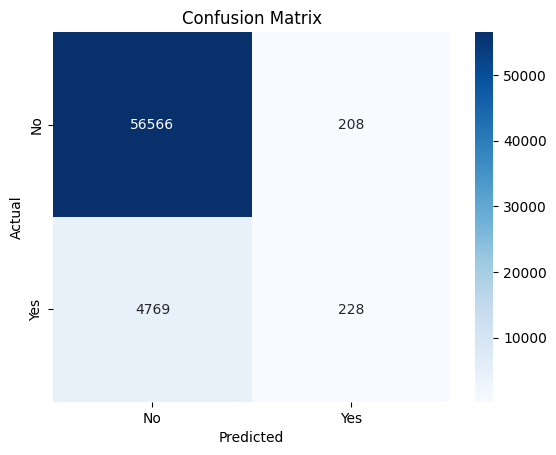

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression with L2 (ridge) regularization penalty and class weights to address imbalance classes. We chose to use L2 regularization here because it is the default in `sklearn` and we wanted to compare the performance to the no regularized model. The output provides the following information:

Test Accuracy (approximately 0.7318): The model correctly predicted the outcome for around 73.18% of the test set. This accuracy is lower than the model without regularization and class weighting, which may suggest that the previous model was overfitting the training data, while the current model, with a lower accuracy, might generalize better.

F1 Score (approximately 0.2998): The F1 score has significantly increased compared to the previous model without regularization and class weighting (which had an F1 score of about 0.0839). The F1 score is a more balanced metric that considers both precision and recall, particularly useful when dealing with imbalanced classes. An improved F1 score indicates that the model is now better at correctly identifying positive cases (patients with heart disease) than before.

Confusion Matrix:

 - True Negatives (41655): The model correctly predicted 'no heart disease' 41,655 times.
 - False Positives (15119): The model incorrectly predicted 'heart disease' 15,119 times.
 - False Negatives (1449): The model incorrectly predicted 'no heart disease' 1,449 times.
 - True Positives (3548): The model correctly predicted 'heart disease' 3,548 times.

The confusion matrix shows that with L2 regularization and balanced class weights, the number of false negatives has significantly decreased (from 4769 to 1449), and the number of true positives has increased (from 228 to 3548). This indicates that the model is now better at identifying cases of heart disease, which is crucial in a medical setting.

The trade-off for this increase in model sensitivity is an increase in false positives (from 208 to 15119), which suggests that while the model is better at catching more instances of the disease, it also misclassifies more healthy instances as diseased.

Overall, the model with L2 regularization and class weighting is more balanced and likely to be more useful in a clinical setting, despite the lower overall accuracy, because it reduces the risk of missing actual cases of heart disease.

In [ ]:
# Logistic Regression with L2 penalty and weighted classes

lr_clf_hd = LogisticRegression(penalty='l2', class_weight='balanced')

lr_clf_hd.fit(hd_data.X_train_scaled, hd_data.y_train)
y_pred = lr_clf_hd.predict(hd_data.X_test_scaled)

test_accuracy = lr_clf_hd.score(hd_data.X_test_scaled, hd_data.y_test)

lr_confusion = confusion_matrix(hd_data.y_test, y_pred)

lf_f1_score = f1_score(hd_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")

print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.7317835230124168
Logistic Regression F1 Score: 0.29986477349560514
Confusion matrix: 
[[41655 15119]
 [ 1449  3548]]


Plot confusion matrix

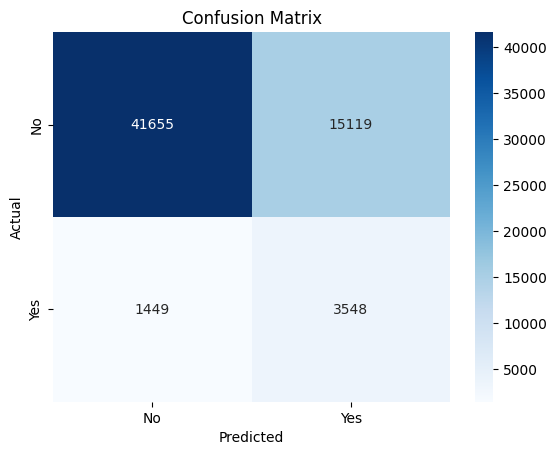

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameters using cross validation. In this case, the training data is split into 5 folds because we evaluate the model using the F1 score. The hyperparameter that we are tuning is the strength of the regularization parameter. Increasing the strength of the regularization parameter will shrink the coefficients of the model more, leading to increased bias and decreased variance in the model.

In [ ]:
# hyperparameter tuning for regularization strength and using f1 score as score

lambdas = np.logspace(0, -6, 15)

lr_clf_hd = LogisticRegressionCV(penalty = 'l1', class_weight='balanced', solver='liblinear',
                                 scoring='f1', cv=5, Cs=lambdas, random_state=42)

lr_clf_hd = lr_clf_hd.fit(hd_data.X_train_scaled, hd_data.y_train)

Plot of cross-validation error and the strength of the regularization parameter

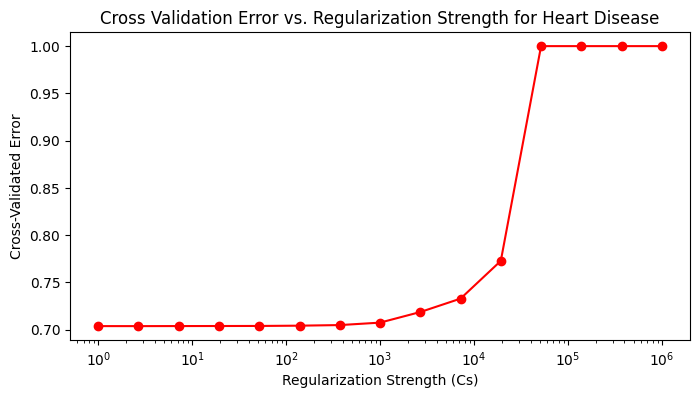

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(1 / lambdas, 1 - lr_clf_hd.scores_[1].mean(axis=0), marker='o',
         linestyle='-', color='r')

plt.xscale('log')
plt.xlabel('Regularization Strength (Cs)')
plt.ylabel('Cross-Validated Error')
plt.title('Cross Validation Error vs. Regularization Strength for Heart Disease')

plt.show()

Test performance of logistic regression parameter after choosing the regularization parameter that minimizes the cross-validation error curve. The parameter is the 6th one in the list of parameters that we tested.

Confusion Matrix:

 - True Negatives (41587): The model correctly predicted 'no heart disease' 41,587 times.
 - False Positives (15187): The model incorrectly predicted 'heart disease' 15,187 times.
 - False Negatives (1443): The model incorrectly predicted 'no heart disease' 1,443 times, meaning it missed these actual cases of heart disease.
 - True Positives (3554): The model correctly identified 3,554 cases of heart disease.

Comparing these results to the previous model without regularization (or with different regularization strength), we can see that the test accuracy has decreased slightly, while the F1 score has improved, indicating a better balance between precision and recall. The confusion matrix shows that while there are still a significant number of false positives, the number of false negatives is relatively low, which is crucial for medical diagnoses where missing a positive case can be more dangerous than incorrectly identifying a negative case as positive.

These outputs suggest that the model with the chosen L1 regularization parameter is better at identifying positive cases (at the cost of more false positives) compared to a model without regularization or with different regularization parameters. This is a trade-off that needs to be carefully considered in a clinical setting where the consequences of false negatives and false positives can have different implications.

In [ ]:
lr_clf_hd = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[5], random_state=42)

lr_clf_hd.fit(hd_data.X_train_scaled, hd_data.y_train)
y_pred = lr_clf_hd.predict(hd_data.X_test_scaled)

test_accuracy = sum(hd_data.y_test == y_pred) / len(y_pred)

lf_f1_score = f1_score(hd_data.y_test, y_pred)

lr_confusion = confusion_matrix(hd_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.7307798157711547
Logistic Regression F1 Score: 0.2994355042547813
Confusion matrix: 
[[41587 15187]
 [ 1443  3554]]


Plot confusion matrix

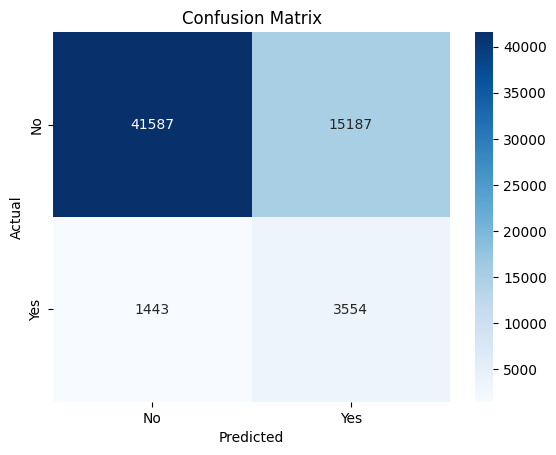

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we used the L1 regularization penalty, we can interpret the features with a nonzero coefficients as the important features for the predictor. In this way, this is an interpretive model where we can draw insights about the different features that predict an outcome variable. In this model, the features with a nonzero coefficients are 'General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'.


In [ ]:
non_zero_coef = lr_clf_hd.coef_

non_zero_indices = non_zero_coef.nonzero()[1]

feature_names_with_non_zero_coef = [hd_data.X_train.columns[i] for i in non_zero_indices]

print(feature_names_with_non_zero_coef)

['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


Tuning hyperparameters using one hot encoding data for heart disease

In [ ]:
# hyperparameter tuning for regularization strength and using f1 score as score
lambdas = np.logspace(0, -6, 15)

lr_clf_hd = LogisticRegressionCV(penalty = 'l1', class_weight='balanced', solver='liblinear',
                                 scoring='f1', cv=5, Cs=lambdas, random_state=42)

lr_clf_hd = lr_clf_hd.fit(hd_data_encoded.X_train_scaled, hd_data_encoded.y_train)

Plot cross-validation error and strength of regularization parameter

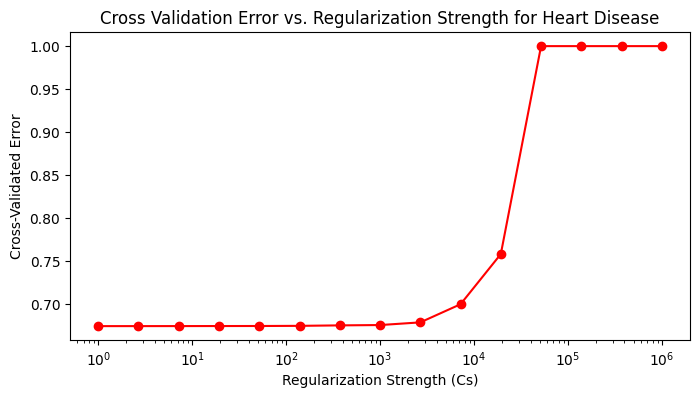

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(1 / lambdas, 1 - lr_clf_hd.scores_[1].mean(axis=0), marker='o',
         linestyle='-', color='r')

plt.xscale('log')
plt.xlabel('Regularization Strength (Cs)')
plt.ylabel('Cross-Validated Error')
plt.title('Cross Validation Error vs. Regularization Strength for Heart Disease')

plt.show()

Test performance of logistic regression parameter after choosing the regularization parameter that minimizes the cross-validation error curve. The parameter is the 8th one in the list of parameters that we tested.

Confusion Matrix:

 - True Negatives (41519): The model correctly predicted the absence of heart disease 41,519 times.
 - False Positives (15255): The model incorrectly predicted heart disease 15,255 times when it was not present.
 - False Negatives (1041): The model failed to detect heart disease 1,041 times when it was actually present.
 - True Positives (3956): The model correctly identified heart disease 3,956 times.

The confusion matrix and F1 score suggest that while the model is relatively accurate, it does tend to make a substantial number of false-positive errors. However, the number of false negatives is low, which is particularly important in medical diagnostics as it reduces the likelihood of missing a diagnosis of heart disease.

Comparing these results to previous outputs, it seems that this model strikes a balance between detecting cases of heart disease and avoiding false negatives, at the cost of a higher number of false positives. This could make the model useful for initial screening purposes, where it's crucial not to miss potential cases of heart disease, with the understanding that some of the positive predictions may be false alarms that require further testing.

In [ ]:
lr_clf_hd = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[7], random_state=42)

lr_clf_hd.fit(hd_data_encoded.X_train_scaled, hd_data_encoded.y_train)
y_pred = lr_clf_hd.predict(hd_data_encoded.X_test_scaled)

test_accuracy = sum(hd_data_encoded.y_test == y_pred) / len(y_pred)

lf_f1_score = f1_score(hd_data_encoded.y_test, y_pred)

lr_confusion = confusion_matrix(hd_data_encoded.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.7361868838127924
Logistic Regression F1 Score: 0.32683410442828814
Confusion matrix: 
[[41519 15255]
 [ 1041  3956]]


Plot confusion matrix

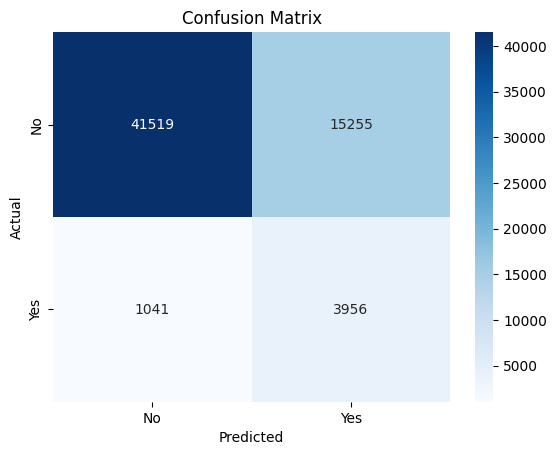

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we used the L1 regularization penalty, we can interpret the features with a nonzero coefficients as the important features for the predictor. In this way, this is an interpretive model where we can draw insights about the different features that predict an outcome variable. In this model, the features with a nonzero coefficients are 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History', 'Alcohol_Consumption', 'General_Health_Excellent', 'General_Health_Fair', 'General_Health_Poor', 'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago', 'Checkup_Within the past year'.

In [ ]:
non_zero_coef = lr_clf_hd.coef_

non_zero_indices = non_zero_coef.nonzero()[1]

feature_names_with_non_zero_coef = [hd_data_encoded.X_train.columns[i] for i in non_zero_indices]

print(feature_names_with_non_zero_coef)

['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History', 'Alcohol_Consumption', 'General_Health_Excellent', 'General_Health_Fair', 'General_Health_Poor', 'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago', 'Checkup_Within the past year']


### Predicting Skin Cancer

**Simple logistic regression model with no regularization penalty**

Test Accuracy (approximately 0.9039): With an accuracy of about 90.39%, the model correctly predicted the outcome for the majority of the cases.

F1 Score (approximately 0.0046): A very low F1 score of approximately 0.0046 indicates a poor balance between precision and recall for the positive class (cases with skin cancer), suggesting the model is not good at predicting the minority class.

Confusion Matrix:

 - True Negatives (55823): The model correctly predicted 'no skin cancer' 55,823 times.
 - False Positives (29): The model incorrectly predicted 'skin cancer' 29 times when it was not present.
 - False Negatives (5905): The model incorrectly predicted 'no skin cancer' 5,905 times when the disease was actually present.
 - True Positives (14): The model correctly identified 'skin cancer' 14 times.

The confusion matrix shows that the model has a very high number of false negatives compared to true positives. This is a serious issue in a medical diagnostic context because it means the model is missing a large number of actual cases of skin cancer.

Despite the high overall test accuracy, the logistic regression model is performing at a mediocre level in terms of identifying positive cases of skin cancer, as evidenced by the very low F1 score and the high number of false negatives. The high accuracy rate is likely misleading due to the imbalanced nature of the dataset, where the majority class (no skin cancer) dominates, making it easier to predict correctly by chance.

In [ ]:
# Simple Logistic Regression
lr_clf_sc = LogisticRegression(penalty = None)

lr_clf_sc.fit(sc_data.X_train_scaled, sc_data.y_train)
y_pred = lr_clf_sc.predict(sc_data.X_test_scaled)

test_accuracy = lr_clf_sc.score(sc_data.X_test_scaled, sc_data.y_test)

lr_confusion = confusion_matrix(sc_data.y_test, y_pred)

lf_f1_score = f1_score(sc_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.9039355037153357
Logistic Regression F1 Score: 0.004696410600469641
Confusion matrix: 
[[55823    29]
 [ 5905    14]]


Plot confusion matrix

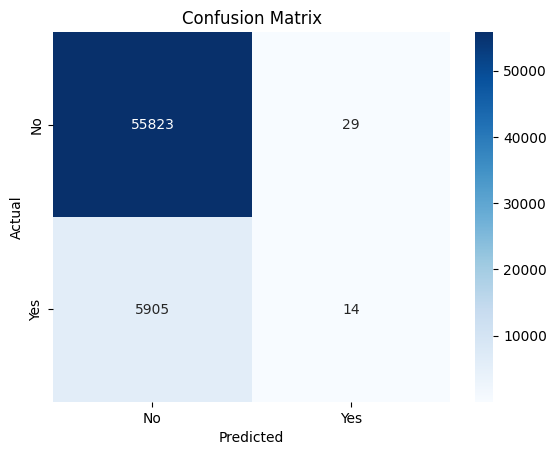

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic regression with L2 (ridge) regularization penalty and class weights to address imbalanced classes. We chose to use L2 penalty because it is the default in `sklearn`, and we wanted to compare it to the peformance of the model with no regularization penalty.

Confusion Matrix:

 - True Negatives (38299): The model correctly predicted 'no skin cancer' 38,299 times.
 - False Positives (17553): The model incorrectly predicted 'skin cancer' 17,553 times when it was not present.
 - False Negatives (2284): The model incorrectly predicted 'no skin cancer' 2,284 times when the disease was actually present.
 - True Positives (3635): The model correctly identified 'skin cancer' 3,635 times.

The confusion matrix shows a substantial number of both false positives and false negatives. However, compared to the model without regularization, the number of false negatives has decreased significantly (from 5905 to 2284), and the number of true positives has increased (from 141 to 3635).

Overall, the model with L2 regularization and balanced class weights performs better at correctly identifying cases of skin cancer, as evidenced by the higher F1 score and improved true positive rate. The trade-off for this improvement is a lower overall accuracy and a higher number of false positives, which may be acceptable in a medical context where failing to detect the disease can have serious consequences.

In [ ]:
# Simple Logistic Regression with L2 penalty
lr_clf_sc = LogisticRegression(penalty = 'l2', class_weight='balanced')

lr_clf_sc.fit(sc_data.X_train_scaled, sc_data.y_train)
y_pred = lr_clf_sc.predict(sc_data.X_test_scaled)

test_accuracy = lr_clf_sc.score(sc_data.X_test_scaled, sc_data.y_test)

lr_confusion = confusion_matrix(sc_data.y_test, y_pred)

lf_f1_score = f1_score(sc_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.6788622492755501
Logistic Regression F1 Score: 0.26819640683218354
Confusion matrix: 
[[38299 17553]
 [ 2284  3635]]


Plot confusion matrix

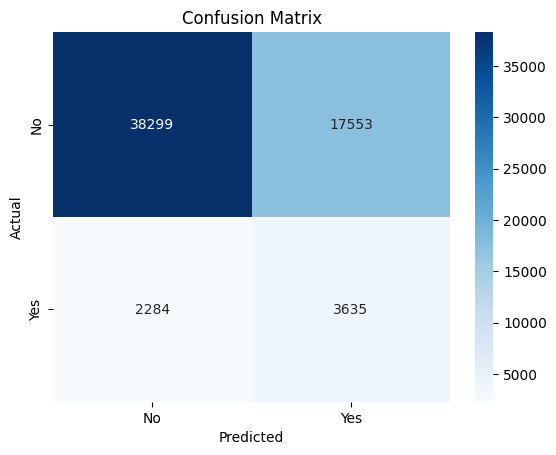

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameters using cross validation. In this case, the training data is split into 5 folds because we evaluate the model using the F1 score. The hyperparameter that we are tuning is the strength of the regularization parameter. Increasing the strength of the regularization parameter will shrink the coefficients of the model more, leading to increased bias and decreased variance in the model.

In [ ]:
# hyperparameter tuning for regularization strength and using f1 score as score
lambdas = np.logspace(0, -6, 15)

lr_clf_sc = LogisticRegressionCV(penalty = 'l1', class_weight='balanced', solver='liblinear',
                                 scoring='f1', cv=5, Cs=lambdas, random_state=42)

lr_clf_sc.fit(sc_data.X_train_scaled, sc_data.y_train)

Plot cross-validation error and strength of regularization penalty

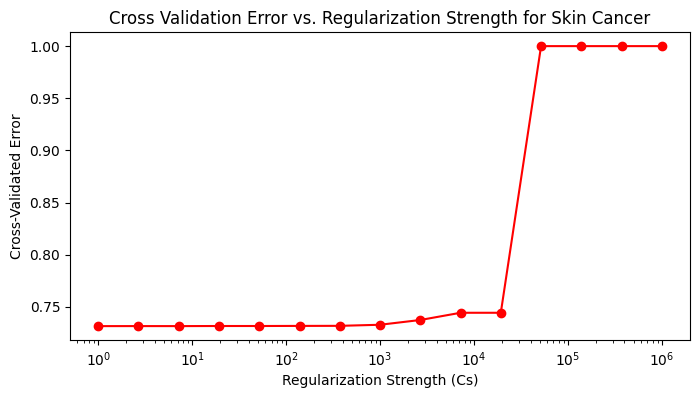

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(1 / lambdas, 1 - lr_clf_sc.scores_[1].mean(axis=0), marker='o',
         linestyle='-', color='r')

plt.xscale('log')
plt.xlabel('Regularization Strength (Cs)')
plt.ylabel('Cross-Validated Error')
plt.title('Cross Validation Error vs. Regularization Strength for Skin Cancer')

plt.show()

Test performance of logistic regression parameter after choosing the regularization parameter that minimizes the cross-validation error curve. The parameter is the 7th one in the list of parameters that we tested.

Confusion Matrix:

 - True Negatives (38138): The model correctly predicted 'no skin cancer' 38,138 times.
 - False Positives (17714): The model incorrectly predicted 'skin cancer' 17,714 times.
 - False Negatives (2270): The model incorrectly predicted 'no skin cancer' 2,270 times when the disease was actually present.
 - True Positives (3649): The model correctly identified 'skin cancer' 3,649 times.

The confusion matrix shows a significant number of false positives, which means the model is prone to incorrectly predicting skin cancer when it's not present. However, it's also catching more true positives compared to the model without regularization (as indicated by an improved F1 score).

Overall, these results suggest that while the model with L1 regularization and balanced class weights might be better at identifying cases of skin cancer compared to one without regularization (as suggested by a higher F1 score), it still struggles with a relatively high number of false positives, which affects its overall accuracy. The improvement in the F1 score indicates a trade-off between reducing false negatives and increasing false positives, which may be a deliberate choice in medical screening to avoid missing cases of skin cancer.

In [ ]:
lr_clf_sc = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[6], random_state=42)

lr_clf_sc.fit(sc_data.X_train_scaled, sc_data.y_train)
y_pred = lr_clf_sc.predict(sc_data.X_test_scaled)

test_accuracy = sum(sc_data.y_test == y_pred) / len(y_pred)

lf_f1_score = f1_score(sc_data.y_test, y_pred)

lr_confusion = confusion_matrix(sc_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.6764824917841705
Logistic Regression F1 Score: 0.2675023825232754
Confusion matrix: 
[[38138 17714]
 [ 2270  3649]]


Plot confusion matrix

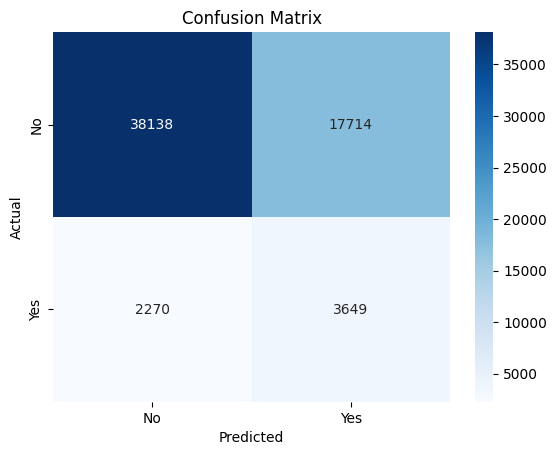

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we used the L1 regularization penalty, we can interpret the features with a nonzero coefficients as the important features for the predictor. In this way, this is an interpretive model where we can draw insights about the different features that predict an outcome variable. In this model, the features with a nonzero coefficients are 'General_Health', 'Exercise', 'Heart_Disease', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'.

In [ ]:
non_zero_coef = lr_clf_sc.coef_

non_zero_indices = non_zero_coef.nonzero()[1]

feature_names_with_non_zero_coef = [sc_data.X_train.columns[i] for i in non_zero_indices]

print(feature_names_with_non_zero_coef)

['General_Health', 'Exercise', 'Heart_Disease', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


Tuning hyperparameters for model using one hot encoding data for skin cancer

In [ ]:
# hyperparameter tuning for regularization strength and using f1 score as score
lambdas = np.logspace(0, -6, 15)

lr_clf_sc = LogisticRegressionCV(penalty = 'l1', class_weight='balanced', solver='liblinear',
                                 scoring='f1', cv=5, Cs=lambdas, random_state=42)

lr_clf_sc = lr_clf_sc.fit(sc_data_encoded.X_train_scaled, sc_data_encoded.y_train)

Plot cross-validation error and strength of regularization penalty

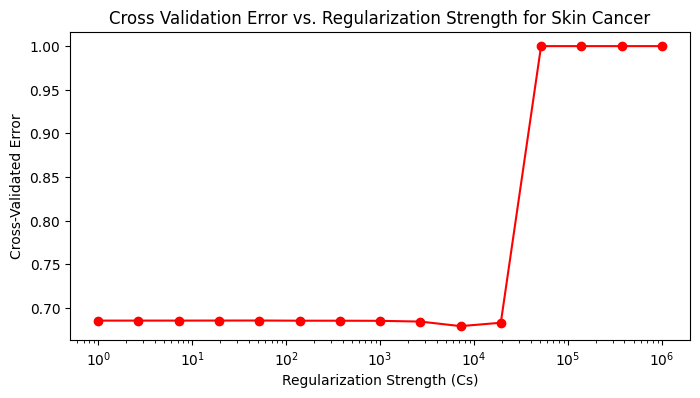

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(1 / lambdas, 1 - lr_clf_sc.scores_[1].mean(axis=0), marker='o',
         linestyle='-', color='r')

plt.xscale('log')
plt.xlabel('Regularization Strength (Cs)')
plt.ylabel('Cross-Validated Error')
plt.title('Cross Validation Error vs. Regularization Strength for Skin Cancer')

plt.show()

Test performance of logistic regression parameter after choosing the regularization parameter that minimizes the cross-validation error curve. The parameter is the 10th one in the list of parameters that we tested.

Confusion Matrix:

 - True Negatives (39495): The model correctly predicted 'no skin cancer' 39,495 times.
 - False Positives (16357): The model incorrectly predicted 'skin cancer' 16,357 times when it was not present.
 - False Negatives (1722): The model failed to identify 'skin cancer' 1,722 times when it was actually present.
 - True Positives (4197): The model correctly identified 'skin cancer' 4,197 times.

The confusion matrix indicates that while the model is relatively good at identifying true positives (correctly identifying cases with skin cancer), it also has a substantial number of false positives (incorrectly identifying skin cancer when it's not present).

Overall, the model with the chosen L1 regularization parameter performs moderately well in identifying cases of skin cancer, with a reasonable balance between detecting most positive cases and not misclassifying too many negative cases as positive. The results suggest that the regularization has improved the model's ability to predict the minority class, which is often the goal in medical diagnostic tests where missing a positive diagnosis can have serious consequences.

In [ ]:
lr_clf_sc = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[9], random_state=42)

lr_clf_sc.fit(sc_data_encoded.X_train_scaled, sc_data_encoded.y_train)
y_pred = lr_clf_sc.predict(sc_data_encoded.X_test_scaled)

test_accuracy = sum(sc_data_encoded.y_test == y_pred) / len(y_pred)

lf_f1_score = f1_score(sc_data_encoded.y_test, y_pred)

lr_confusion = confusion_matrix(sc_data_encoded.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.7073222062132716
Logistic Regression F1 Score: 0.3170777773580629
Confusion matrix: 
[[39495 16357]
 [ 1722  4197]]


Plot confusion matrix

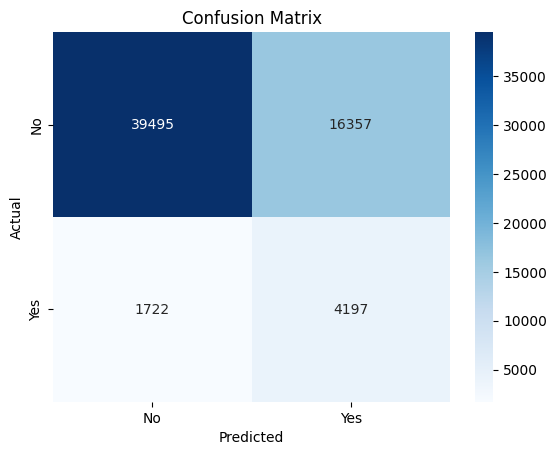

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we used the L1 regularization penalty, we can interpret the features with a nonzero coefficients as the important features for the predictor. In this way, this is an interpretive model where we can draw insights about the different features that predict an outcome variable. In this model, the features with a nonzero coefficients are 'Other_Cancer', 'Arthritis', 'Alcohol_Consumption', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_Within the past year'.

In [ ]:
non_zero_coef = lr_clf_sc.coef_

non_zero_indices = non_zero_coef.nonzero()[1]

feature_names_with_non_zero_coef = [sc_data_encoded.X_train.columns[i] for i in non_zero_indices]

print(feature_names_with_non_zero_coef)

['Other_Cancer', 'Arthritis', 'Alcohol_Consumption', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_Within the past year']


### Predicting Arthritis

**Simple logistic regression with no regularization penalty**

Test Accuracy (approximately 0.7119): The model accurately predicted the correct outcome for about 71.19% of the cases.

F1 Score (approximately 0.4122): An F1 score of 0.4122 is moderately low, which suggests that the model is not very effective at predicting the positive class (likely the presence of arthritis). This could be indicative of an imbalance in the dataset where one class is much more prevalent than the other.

Confusion Matrix:

 - True Negatives (37731): The model correctly predicted the absence of arthritis 37,731 times.
 - False Positives (3849): The model incorrectly predicted arthritis 3,849 times.
 - False Negatives (13951): The model failed to identify arthritis 13,951 times.
 - True Positives (6240): The model correctly identified arthritis 6,240 times.

The confusion matrix reveals a relatively high number of false negatives compared to true positives. This means that while the model can fairly accurately predict the absence of arthritis, it is not as good at correctly identifying when arthritis is present. This could potentially lead to a significant number of missed diagnoses if used in a clinical setting.

The model has a reasonable level of overall accuracy, but its ability to detect positive cases of arthritis is less than optimal, as reflected by the moderate F1 score and the relatively high number of false negatives. This could be an area to focus on improving, potentially by gathering more data, feature engineering, or trying different models or algorithms.

In [ ]:
# Simple Logistic Regression
lr_clf_a = LogisticRegression(penalty = None)

lr_clf_a.fit(a_data.X_train_scaled, a_data.y_train)
y_pred = lr_clf_a.predict(a_data.X_test_scaled)

test_accuracy = lr_clf_a.score(a_data.X_test_scaled, a_data.y_test)

lr_confusion = confusion_matrix(a_data.y_test, y_pred)

lf_f1_score = f1_score(a_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.711838888798951
Logistic Regression F1 Score: 0.41215323645970936
Confusion matrix: 
[[37731  3849]
 [13951  6240]]


Plot confusion matrix

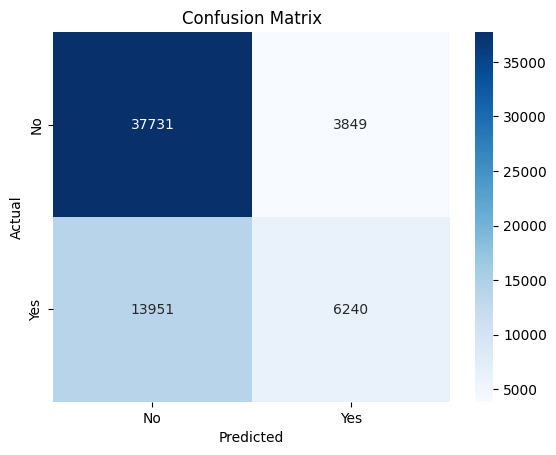

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic regression with L2 (ridge) regularization penalty and class weights to address imbalance class. We chose to use L2 penalty here because it is the default in `sklearn`, and we want to compare it to the model with no regularization penalty.

Confusion Matrix:

 - True Negatives (28760): The number of instances where the model correctly predicted the absence of arthritis.
 - False Positives (12820): The instances where the model incorrectly predicted arthritis when it was not present.
 - False Negatives (7622): The instances where the model failed to predict arthritis when it was present.
 - True Positives (12569): The number of instances where the model correctly predicted the presence of arthritis.

The confusion matrix suggests that while the model has a relatively high number of false positives, it also has a high number of true positives, which is reflected in the higher F1 score. The model is more effective at identifying positive cases than the non-regularized model, but this comes at the cost of more false positives.

Overall, the results indicate that the regularization and class balancing have improved the model's performance in terms of the F1 score, making it potentially more suitable for identifying cases of arthritis, despite a slight decrease in overall test accuracy. This trade-off might be acceptable in a clinical context where the cost of missing a true case of arthritis (false negative) is higher than the cost of additional testing due to a false positive.

In [ ]:
# Simple Logistic Regression with L2 penalty
lr_clf_a = LogisticRegression(penalty = 'l2', class_weight='balanced')

lr_clf_a.fit(a_data.X_train_scaled, a_data.y_train)
y_pred = lr_clf_a.predict(a_data.X_test_scaled)

test_accuracy = lr_clf_a.score(a_data.X_test_scaled, a_data.y_test)

lr_confusion = confusion_matrix(a_data.y_test, y_pred)

lf_f1_score = f1_score(a_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.6690680092600088
Logistic Regression F1 Score: 0.5515138218516893
Confusion matrix: 
[[28760 12820]
 [ 7622 12569]]


Plot confusion matrix

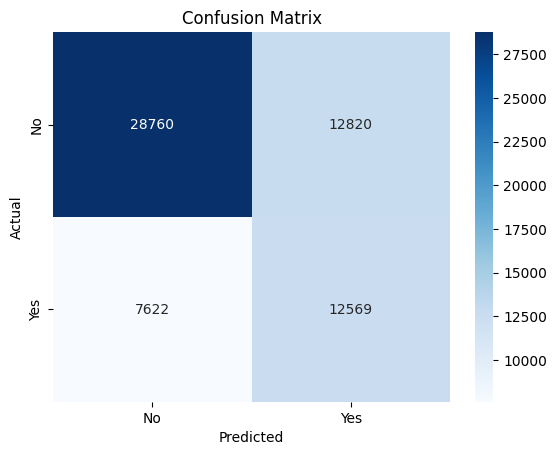

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameters using cross validation. In this case, the training data is split into 5 folds because we evaluate the model using the F1 score. The hyperparameter that we are tuning is the strength of the regularization parameter. Increasing the strength of the regularization parameter will shrink the coefficients of the model more, leading to increased bias and decreased variance in the model.

In [ ]:
# hyperparameter tuning for regularization strength and using f1 score as score
lambdas = np.logspace(0, -6, 15)

lr_clf_a = LogisticRegressionCV(penalty = 'l1', class_weight='balanced', solver='liblinear',
                                 scoring='f1', cv=5, Cs=lambdas, random_state=42)

lr_clf_a.fit(a_data.X_train_scaled, a_data.y_train)

Plot cross-validation error and strength of regularization penalty

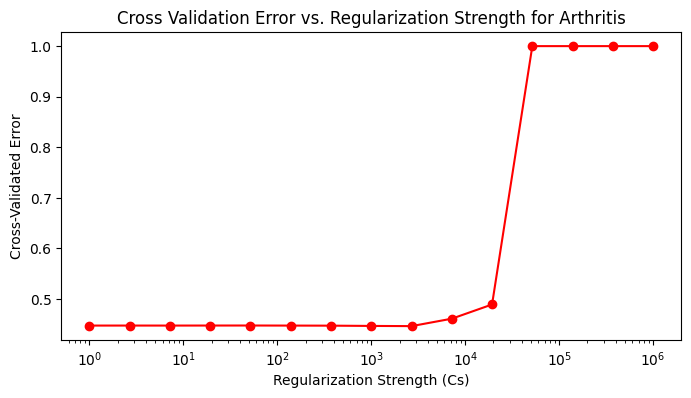

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(1 / lambdas, 1 - lr_clf_a.scores_[1].mean(axis=0), marker='o',
         linestyle='-', color='r')

plt.xscale('log')
plt.xlabel('Regularization Strength (Cs)')
plt.ylabel('Cross-Validated Error')
plt.title('Cross Validation Error vs. Regularization Strength for Arthritis')

plt.show()

Test performance of logistic regression parameter after choosing the regularization parameter that minimizes the cross-validation error curve. The parameter is the 9th one in the list of parameters that we tested.

Confusion Matrix:

 - True Negatives (27843): The number of instances where the model correctly predicted the absence of arthritis.
 - False Positives (13737): The instances where the model incorrectly predicted arthritis when it was not present.
 - False Negatives (7201): The instances where the model failed to predict arthritis when it was present.
 - True Positives (12990): The number of instances where the model correctly predicted the presence of arthritis.

The confusion matrix suggests that the model has a relatively high number of false positives and false negatives. However, the number of true positives is also high, which contributes to the higher F1 score.

Overall, these results suggest that the model with L1 regularization and balanced class weights is more effective at identifying cases of arthritis than the models without regularization or with different regularization parameters, as indicated by the higher F1 score. The trade-off for this improved F1 score is a decrease in overall accuracy and an increase in false positives, which may be considered acceptable depending on the specific application and the cost of false positives versus false negatives in the context of arthritis diagnosis.

In [ ]:
lr_clf_a = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[8], random_state=42)

lr_clf_a.fit(a_data.X_train_scaled, a_data.y_train)
y_pred = lr_clf_a.predict(a_data.X_test_scaled)

test_accuracy = sum(a_data.y_test == y_pred) / len(y_pred)

lf_f1_score = f1_score(a_data.y_test, y_pred)

lr_confusion = confusion_matrix(a_data.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.6610383513299121
Logistic Regression F1 Score: 0.5537320431390937
Confusion matrix: 
[[27843 13737]
 [ 7201 12990]]


Plot confusion matrix

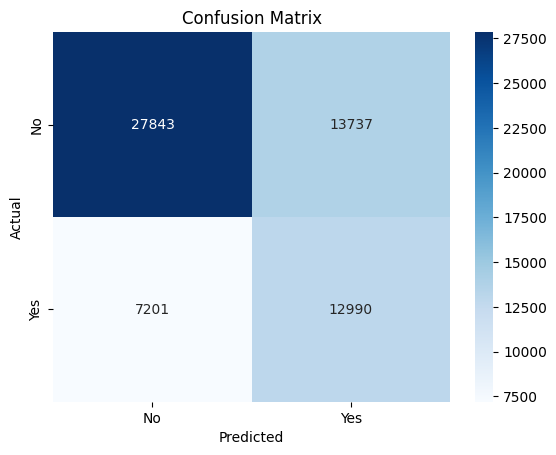

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we used the L1 regularization penalty, we can interpret the features with a nonzero coefficients as the important features for the predictor. In this way, this is an interpretive model where we can draw insights about the different features that predict an outcome variable. In this model, the features with a nonzero coefficients are 'General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Sex', 'Height_(cm)', 'BMI', 'Smoking_History', 'FriedPotato_Consumption'.

In [ ]:
non_zero_coef = lr_clf_a.coef_

non_zero_indices = non_zero_coef.nonzero()[1]

feature_names_with_non_zero_coef = [a_data.X_train.columns[i] for i in non_zero_indices]

print(feature_names_with_non_zero_coef)

['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Sex', 'Height_(cm)', 'BMI', 'Smoking_History', 'FriedPotato_Consumption']


Tuning hyperparameters for model using one hot encoding data for arthritis

In [ ]:
# hyperparameter tuning for regularization strength and using f1 score as score
lambdas = np.logspace(0, -6, 15)

lr_clf_a = LogisticRegressionCV(penalty = 'l1', class_weight='balanced', solver='liblinear',
                                 scoring='f1', cv=5, Cs=lambdas, random_state=42)

lr_clf_a.fit(a_data_encoded.X_train_scaled, a_data_encoded.y_train)

Plot cross validation error and strength of regularization penalty

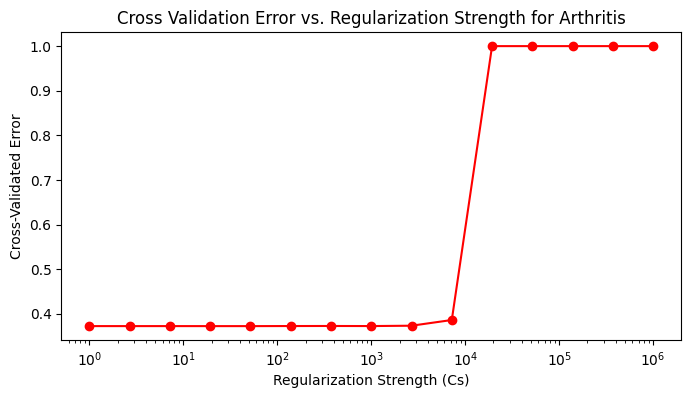

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(1 / lambdas, 1 - lr_clf_a.scores_[1].mean(axis=0), marker='o',
         linestyle='-', color='r')

plt.xscale('log')
plt.xlabel('Regularization Strength (Cs)')
plt.ylabel('Cross-Validated Error')
plt.title('Cross Validation Error vs. Regularization Strength for Arthritis')

plt.show()

Test performance of logistic regression parameter after choosing the regularization parameter that minimizes the cross-validation error curve. The parameter is the 9th one in the list of parameters that we tested.

Confusion Matrix:

 - True Negatives (26921): The number of instances where the model correctly predicted the absence of arthritis.
 - False Positives (14659): The instances where the model incorrectly predicted arthritis when it was not present.
 - False Negatives (4295): The instances where the model failed to predict arthritis when it was present.
 - True Positives (15896): The number of instances where the model correctly predicted the presence of arthritis.

The confusion matrix shows that while the model has a considerable number of false positives, it has successfully identified a large number of true positive cases (actual cases of arthritis). This is also reflected in the relatively high F1 score.

Overall, the results suggest that the model with L1 regularization and balanced class weights has a good ability to identify cases of arthritis, as indicated by the high F1 score. However, the trade-off for this improved identification of positive cases is a decrease in overall accuracy and an increase in false positives, which may be acceptable depending on the specific application and the consequences of false positives in the context of arthritis diagnosis.

In [ ]:
lr_clf_a = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[8], random_state=42)

lr_clf_a.fit(a_data_encoded.X_train_scaled, a_data_encoded.y_train)
y_pred = lr_clf_a.predict(a_data_encoded.X_test_scaled)

test_accuracy = sum(a_data_encoded.y_test == y_pred) / len(y_pred)

lf_f1_score = f1_score(a_data_encoded.y_test, y_pred)

lr_confusion = confusion_matrix(a_data_encoded.y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {test_accuracy}")
print(f"Logistic Regression F1 Score: {lf_f1_score}")
print(f"Confusion matrix: \n{lr_confusion}")

Logistic Regression Test Accuracy: 0.6931569830502987
Logistic Regression F1 Score: 0.6264927284909155
Confusion matrix: 
[[26921 14659]
 [ 4295 15896]]


Plot confusion matrix

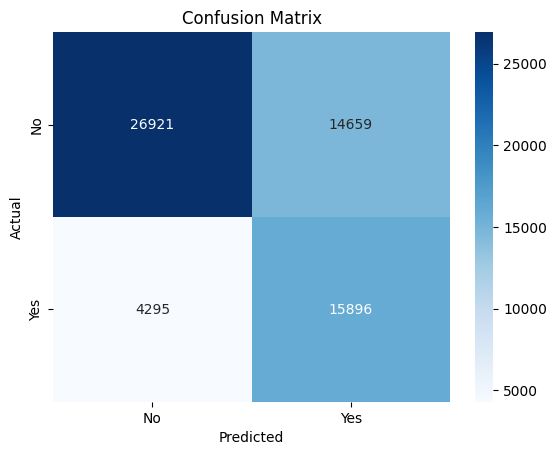

In [ ]:
sns.heatmap(lr_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we used the L1 regularization penalty, we can interpret the features with a nonzero coefficients as the important features for the predictor. In this way, this is an interpretive model where we can draw insights about the different features that predict an outcome variable. In this model, the features with a nonzero coefficients are 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Sex', 'BMI', 'Smoking_History', 'General_Health_Excellent', 'General_Health_Fair', 'General_Health_Poor', 'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago', 'Checkup_Within the past year'.

In [ ]:
non_zero_coef = lr_clf_a.coef_

non_zero_indices = non_zero_coef.nonzero()[1]

feature_names_with_non_zero_coef = [a_data_encoded.X_train.columns[i] for i in non_zero_indices]

print(feature_names_with_non_zero_coef)

['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Sex', 'BMI', 'Smoking_History', 'General_Health_Excellent', 'General_Health_Fair', 'General_Health_Poor', 'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago', 'Checkup_Within the past year']


## Decision Tree

Decision trees are a very interpretable machine learning model that splits the data based on a feature. Each subsequent branch of the tree further splits the data. This process creates axis-aligned decision boundaries.

The hyperparameter that we tuned for the decision tree models is the depth of the tree. Increasing the depth of the tree makes the model more complex because there are more features that the model uses to split the data and make a prediction. Trees with a larger depth have high variance and lower bias. Typically, the common way to tune decision trees is to prune the tree using the cost-complexity parameters. When pruning the trees, we noticed that there were too many pruned trees to considered, which led to an enormous runtime. To address this, we settled on tuning the depth of the tree, which gave similar performance.

### Fully grown regular decision tree

#### Predicting Heart Disease

**Fully grown decision tree for predicting heart disease**

The decision tree model correctly predicted the outcome for about 85.88% of the test set, which is a high accuracy rate.

The F1 score is quite low, suggesting that while the model has high accuracy, it is not very effective at predicting the positive class (cases with heart disease). The low F1 score is often a sign of an imbalanced dataset where one class is much more prevalent than the other, and the model may primarily predict the majority class correctly.

Confusion Matrix:

 - True Negatives (38979): The model correctly predicted 'no heart disease' 38,979 times.
 - False Positives (2601): The model incorrectly predicted 'heart disease' 2,601 times.
 - False Negatives (16989): The model failed to identify 'heart disease' 16,989 times.
 - True Positives (3202): The model correctly identified 'heart disease' 3,202 times.

The confusion matrix provides a more detailed view of the model's predictive capabilities. Despite the high overall accuracy, the model has a high number of false negatives compared to true positives. This indicates that the model is not sensitive enough to the positive class and is likely to miss many cases of heart disease, which could be dangerous in a clinical setting.

Overall, these results suggest that while the decision tree model may seem to perform well when looking only at accuracy, it has significant limitations in its ability to identify cases of heart disease correctly, as evidenced by the low F1 score and the high number of false negatives.

In [ ]:
clf_dt_full = DecisionTreeClassifier(random_state=42)
clf_dt_full.fit(hd_data.X_train, hd_data.y_train)

y_test_pred = clf_dt_full.predict(hd_data.X_test)

y_test = np.array(hd_data.y_test)

dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)

dt_confusion = confusion_matrix(a_data.y_test, y_test_pred)

dt_f1_score = f1_score(hd_data.y_test, y_test_pred)

print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")
print(f"Decision Tree F1 Score: {dt_f1_score}")
print(f"Confusion matrix: \n{dt_confusion}")

Decision Tree Test Accuracy: 0.85883343316443
Decision Tree F1 Score: 0.1925925925925926
Confusion matrix: 
[[38979  2601]
 [16989  3202]]


Plot confusion matrix

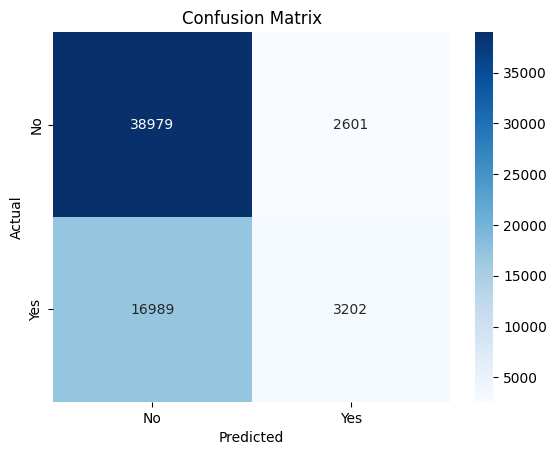

In [ ]:
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameter of depth of decision tree using one hot encoding data

In [ ]:
depth = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in depth:

    clf_dt_full = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf_dt_full.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)

    y_test_pred = clf_dt_full.predict(hd_data_encoded.X_test_pca)

    y_test = np.array(hd_data_encoded.y_test)

    dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)
    dt_f1_score = f1_score(hd_data_encoded.y_test, y_test_pred)

    accuracies.append(dt_test_accuracy)
    f_scores.append(dt_f1_score)

    print(f"Decision Tree Test Accuracy with depth {i}: {dt_test_accuracy}")
    print(f"Decision Tree F1 Score with depth {i}: {dt_f1_score}")
    print("----")

Decision Tree Test Accuracy with depth 1: 0.9191044341195707
Decision Tree F1 Score with depth 1: 0.0
----
Decision Tree Test Accuracy with depth 12: 0.9115280633306891
Decision Tree F1 Score with depth 12: 0.1318506751389992
----
Decision Tree Test Accuracy with depth 23: 0.8819672661928737
Decision Tree F1 Score with depth 23: 0.20534059945504088
----
Decision Tree Test Accuracy with depth 34: 0.8669116575739425
Decision Tree F1 Score with depth 34: 0.2076144578313253
----
Decision Tree Test Accuracy with depth 45: 0.8641433682472358
Decision Tree F1 Score with depth 45: 0.20815248160030195
----
Decision Tree Test Accuracy with depth 56: 0.8649366207443623
Decision Tree F1 Score with depth 56: 0.20911934780547917
----
Decision Tree Test Accuracy with depth 67: 0.8649366207443623
Decision Tree F1 Score with depth 67: 0.20911934780547917
----
Decision Tree Test Accuracy with depth 78: 0.8649366207443623
Decision Tree F1 Score with depth 78: 0.20911934780547917
----
Decision Tree Test A

Plot performance metric and depth of decision trees

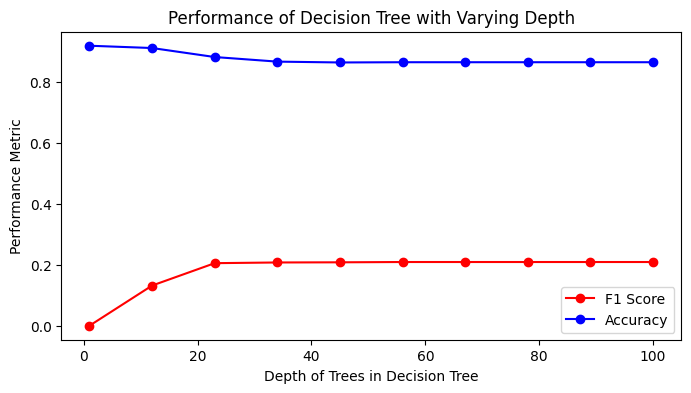

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(depth, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(depth, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Depth of Trees in Decision Tree')
plt.ylabel('Performance Metric')
plt.title('Performance of Decision Tree with Varying Depth')

plt.legend()

plt.show()

From the plot, the best performing tree has a depth of 56 because it is the smallest tree that has the highest F1 score. We choose a smallest tree with the highest F1 score because we don't want a very large tree because that would lead to high variance in the model.

Next, we can look at the following:

Decision Tree Accuracy (approximately 0.8649): The accuracy is about 86.49%, indicating a high overall rate of correctly predicting both the presence and absence of heart disease on the test set.

Random Forest F1 Score (approximately 0.2091): The F1 score is relatively low, which suggests that while the model is accurate overall, it may not be as effective when it comes to the precision and recall balance for the positive class (the class of interest, which is likely the presence of heart disease).

Confusion Matrix:

 - True Negatives (52325): The model correctly predicted 'no heart disease' for 52,325 instances.
 - False Positives (4449): The model incorrectly predicted 'heart disease' for 4,449 instances.
 - False Negatives (3894): The model failed to predict 'heart disease' when it was present for 3,894 instances.
 - True Positives (1103): The model correctly predicted 'heart disease' for 1,103 instances.

The confusion matrix reveals that the model performs well in terms of true negatives but is less effective at correctly identifying true positives, as indicated by the low F1 score. The relatively high number of false negatives is concerning in a medical context because it means that the model misses several cases of heart disease. Overall, these results suggest that the decision tree model has a good overall accuracy but lacks sensitivity in detecting heart disease cases, which is critical in a healthcare setting.

In [ ]:
clf_dt_full = DecisionTreeClassifier(max_depth=56, random_state=42)
clf_dt_full.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)

y_test_pred = clf_dt_full.predict(hd_data_encoded.X_test_pca)

y_test = np.array(hd_data_encoded.y_test)

dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)
dt_f1_score = f1_score(hd_data_encoded.y_test, y_test_pred)
dt_confusion = confusion_matrix(hd_data_encoded.y_test, y_test_pred)

print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")
print(f"Decision Tree F1 Score: {dt_f1_score}")
print(f"Confusion matrix: \n{dt_confusion}")

Random Forest Test Accuracy: 0.8649366207443623
Random Forest F1 Score: 0.20911934780547917
Confusion matrix: 
[[52325  4449]
 [ 3894  1103]]


Plot confusion matrix

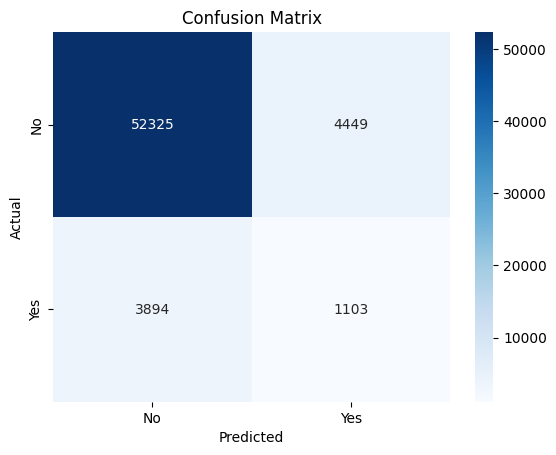

In [ ]:
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Predicting Skin Cancer

**Fully grown decision tree for predicting skin cancer**

The outputs describe the performance of a decision tree classifier for predicting skin cancer. Here's what the results tell us:

Decision Tree Test Accuracy (approximately 0.8177): This is the proportion of correct predictions made by the model on the test set. The model correctly predicted the outcome for about 81.77% of the cases.

Decision Tree F1 Score (approximately 0.1563): The F1 score is significantly lower than the accuracy, which suggests that while the model may be accurate overall, it performs poorly when specifically predicting the positive class (cases with skin cancer). This could be due to class imbalance, where the negative class (no skin cancer) is much more common.

Confusion Matrix:

 - True Negatives (37898): The model correctly predicted 'no skin cancer' 37,898 times.
 - False Positives (3682): The model incorrectly predicted 'skin cancer' 3,682 times.
 - False Negatives (16448): The model failed to identify 'skin cancer' 16,448 times.
 - True Positives (3743): The model correctly identified 'skin cancer' 3,743 times.

The confusion matrix reveals a relatively high number of false negatives compared to true positives. This means that the model is not sensitive enough to the positive class, leading to many cases of skin cancer being missed. This is a serious issue in a medical diagnostic context because it means the model fails to detect many actual cases of skin cancer.

Overall, these results suggest that the decision tree model, while having a reasonable level of overall accuracy, is not effective at identifying cases of skin cancer, as indicated by the low F1 score and the high number of false negatives.

In [ ]:
clf_dt_full = DecisionTreeClassifier(random_state=42)
clf_dt_full.fit(sc_data.X_train, sc_data.y_train)

y_test_pred = clf_dt_full.predict(sc_data.X_test)

y_test = np.array(sc_data.y_test)

dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)

dt_confusion = confusion_matrix(a_data.y_test, y_test_pred)

dt_f1_score = f1_score(sc_data.y_test, y_test_pred)

print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")
print(f"Decision Tree F1 Score: {dt_f1_score}")
print(f"Confusion matrix: \n{dt_confusion}")

Decision Tree Test Accuracy: 0.8177461915785724
Decision Tree F1 Score: 0.15632494004796163
Confusion matrix: 
[[37898  3682]
 [16448  3743]]


Plot confusion matrix

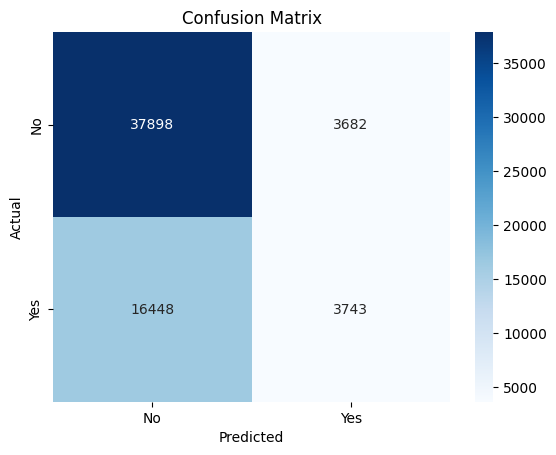

In [ ]:
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameter of depth of decision tree using one hot encoding data

In [ ]:
depth = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in depth:

    clf_dt_full = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf_dt_full.fit(sc_data_encoded.X_train_pca, sc_data_encoded.y_train)

    y_test_pred = clf_dt_full.predict(sc_data_encoded.X_test_pca)

    y_test = np.array(sc_data_encoded.y_test)

    dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)
    dt_f1_score = f1_score(sc_data_encoded.y_test, y_test_pred)

    accuracies.append(dt_test_accuracy)
    f_scores.append(dt_f1_score)

    print(f"Decision Tree Test Accuracy with depth {i}: {dt_test_accuracy}")
    print(f"Decision Tree F1 Score with depth {i}: {dt_f1_score}")
    print("----")

Decision Tree Test Accuracy with depth 1: 0.9041783361124152
Decision Tree F1 Score with depth 1: 0.0
----
Decision Tree Test Accuracy with depth 12: 0.8963915105793981
Decision Tree F1 Score with depth 12: 0.07084785133565621
----
Decision Tree Test Accuracy with depth 23: 0.8665069369121432
Decision Tree F1 Score with depth 23: 0.17737430167597765
----
Decision Tree Test Accuracy with depth 34: 0.8430331385277882
Decision Tree F1 Score with depth 34: 0.18685005031868498
----
Decision Tree Test Accuracy with depth 45: 0.8340807174887892
Decision Tree F1 Score with depth 45: 0.18896890084671994
----
Decision Tree Test Accuracy with depth 56: 0.8339835845299575
Decision Tree F1 Score with depth 56: 0.19423273355857626
----
Decision Tree Test Accuracy with depth 67: 0.8332712761651908
Decision Tree F1 Score with depth 67: 0.19242531169136676
----
Decision Tree Test Accuracy with depth 78: 0.8332712761651908
Decision Tree F1 Score with depth 78: 0.19242531169136676
----
Decision Tree Test

Plot performance metrics and depth of decision trees

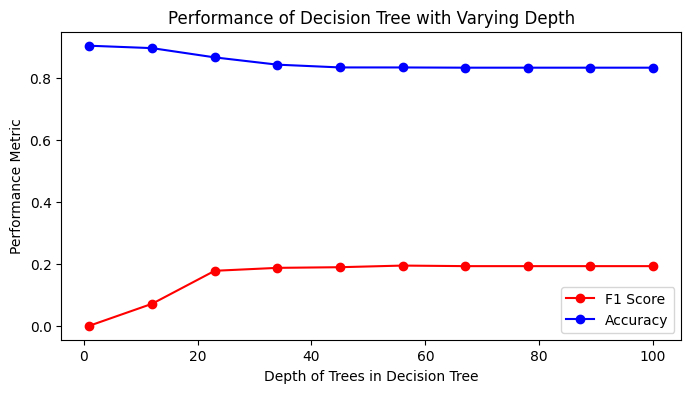

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(depth, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(depth, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Depth of Trees in Decision Tree')
plt.ylabel('Performance Metric')
plt.title('Performance of Decision Tree with Varying Depth')

plt.legend()

plt.show()

From the plot, the best performing tree has a depth of 34 because it is the smallest tree that has the highest F1 score. We choose a smallest tree with the highest F1 score because we don't want a very large tree because that would lead to high variance in the model.

The model has an accuracy rate of about 82.97%, which means it correctly predicted whether or not the subjects had skin cancer in roughly 83% of cases. The F1 score is quite low, which is indicative of a model that is not very effective at predicting the positive class (true cases of skin cancer).

Confusion Matrix:

 - True Negatives (49950): The number of non-skin cancer cases correctly identified as such by the model.
 - False Positives (5902): The number of cases where the model incorrectly predicted skin cancer when it wasn't present.
 - False Negatives (4617): The number of skin cancer cases that the model failed to detect.
 - True Positives (13021): The number of skin cancer cases correctly identified by the model.

The confusion matrix shows that while the model has a high number of true negatives, indicating it can recognize many non-cancer cases accurately, it also has a substantial number of false negatives, where it fails to identify skin cancer. This is problematic for a medical diagnostic tool, as failing to detect cancer can have serious consequences for patients.

In summary, the decision tree has a high overall accuracy but is lacking in its ability to reliably detect positive cases of skin cancer, as evidenced by the low F1 score and the significant number of false negatives. This suggests that while the model may be good at predicting non-cancer cases, it may not be sufficiently sensitive to the presence of skin cancer, which could be crucial for a diagnostic tool.

In [ ]:
clf_dt_full = DecisionTreeClassifier(max_depth=34, random_state=42)
clf_dt_full.fit(sc_data_encoded.X_train, sc_data_encoded.y_train)

y_test_pred = clf_dt_full.predict(sc_data_encoded.X_test)

y_test = np.array(sc_data_encoded.y_test)

dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)
dt_f1_score = f1_score(sc_data_encoded.y_test, y_test_pred)
dt_confusion = confusion_matrix(sc_data_encoded.y_test, y_test_pred)

print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")
print(f"Decision Tree F1 Score: {dt_f1_score}")
print(f"Confusion matrix: \n{dt_confusion}")

Random Forest Test Accuracy: 0.8297097343413576
Random Forest F1 Score: 0.19843023698849346
Confusion matrix: 
[[49950  5902]
 [ 4617  1302]]


Plot confusion matrix

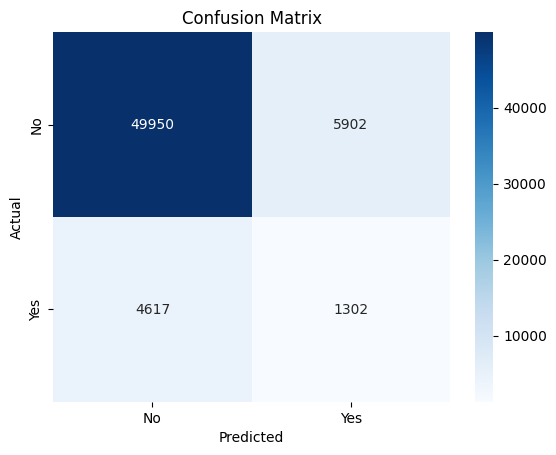

In [ ]:
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Predicting Arthritis

**Fully grown decision tree for predicting arthritis**

The decision tree model correctly predicted the arthritis status (whether arthritis was present or not) in about 61.54% of the test cases. This is a moderate accuracy rate. An F1 score of about 0.4231 indicates that the model has a moderate balance between precision and recall for the positive class (cases with arthritis).

Confusion Matrix:

 - True Negatives (29301): The number of instances where the model correctly predicted the absence of arthritis.
 - False Positives (12279): The number of instances where the model incorrectly predicted the presence of arthritis.
 - False Negatives (11479): The number of instances where the model failed to predict arthritis when it was actually present.
 - True Positives (8712): The number of instances where the model correctly predicted the presence of arthritis.

The confusion matrix shows that the model has a considerable number of false positives and false negatives, indicating that it is frequently making incorrect predictions for both classes. The decision tree's overall accuracy is moderate, and its ability to identify cases of arthritis specifically (as reflected by the F1 score) is not particularly high. The model appears to struggle with both over-predicting arthritis where it does not exist (false positives) and missing cases of arthritis that do exist (false negatives).

In [ ]:
clf_dt_full = DecisionTreeClassifier(random_state=42)
clf_dt_full.fit(a_data.X_train, a_data.y_train)

y_test_pred = clf_dt_full.predict(a_data.X_test)

y_test = np.array(a_data.y_test)

dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)

dt_confusion = confusion_matrix(a_data.y_test, y_test_pred)

dt_f1_score = f1_score(a_data.y_test, y_test_pred)

print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")
print(f"Decision Tree F1 Score: {dt_f1_score}")
print(f"Confusion matrix: \n{dt_confusion}")

Decision Tree Test Accuracy: 0.6153858606789594
Decision Tree F1 Score: 0.42309746976834545
Confusion matrix: 
[[29301 12279]
 [11479  8712]]


Plot confusion matrix

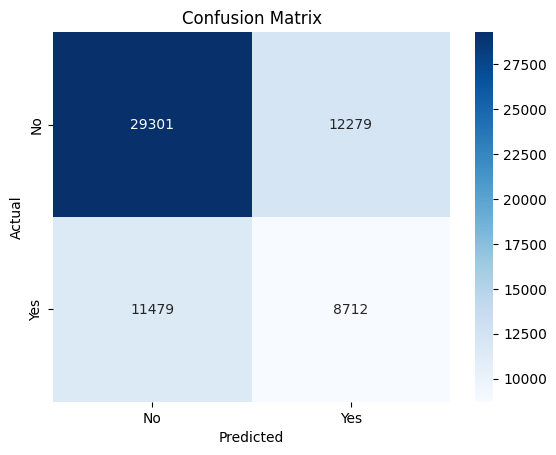

In [ ]:
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameter of depth of decision tree using one hot encoding data

In [ ]:
depth = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in depth:

    clf_dt_full = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf_dt_full.fit(a_data_encoded.X_train_pca, a_data_encoded.y_train)

    y_test_pred = clf_dt_full.predict(a_data_encoded.X_test_pca)

    y_test = np.array(a_data_encoded.y_test)

    dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)
    dt_f1_score = f1_score(a_data_encoded.y_test, y_test_pred)

    accuracies.append(dt_test_accuracy)
    f_scores.append(dt_f1_score)

    print(f"Decision Tree Test Accuracy with depth {i}: {dt_test_accuracy}")
    print(f"Decision Tree F1 Score with depth {i}: {dt_f1_score}")
    print("----")

Decision Tree Test Accuracy with depth 1: 0.673131404704473
Decision Tree F1 Score with depth 1: 0.0
----
Decision Tree Test Accuracy with depth 12: 0.7158537177639993
Decision Tree F1 Score with depth 12: 0.5173248267517325
----
Decision Tree Test Accuracy with depth 23: 0.6789431934079099
Decision Tree F1 Score with depth 23: 0.4910957146522967
----
Decision Tree Test Accuracy with depth 34: 0.6583024396561493
Decision Tree F1 Score with depth 34: 0.48136226257463693
----
Decision Tree Test Accuracy with depth 45: 0.6546761425264283
Decision Tree F1 Score with depth 45: 0.4772198122687057
----
Decision Tree Test Accuracy with depth 56: 0.6547085201793722
Decision Tree F1 Score with depth 56: 0.4798946572703553
----
Decision Tree Test Accuracy with depth 67: 0.654789464311732
Decision Tree F1 Score with depth 67: 0.4781714956930306
----
Decision Tree Test Accuracy with depth 78: 0.654789464311732
Decision Tree F1 Score with depth 78: 0.4781714956930306
----
Decision Tree Test Accuracy

Plot performance metric and depth of decision trees

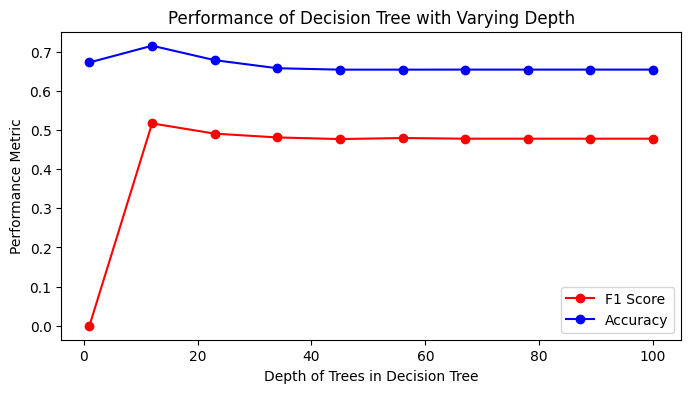

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(depth, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(depth, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Depth of Trees in Decision Tree')
plt.ylabel('Performance Metric')
plt.title('Performance of Decision Tree with Varying Depth')

plt.legend()

plt.show()

From the plot, the best performing tree has a depth of 12 because it is the smallest tree that has the highest F1 score. We choose a smallest tree with the highest F1 score because we don't want a very large tree because that would lead to high variance in the model.

The classifier correctly predicted the arthritis status in about 65.48% of cases in the test dataset. The F1 score, which combines precision and recall into a single metric, is moderate, indicating that the classifier has a fair performance in terms of both false positives and false negatives but is not particularly strong.

Confusion Matrix:

 - True Negatives (30669): The classifier correctly predicted 'no arthritis' for 30,669 instances.
 - False Positives (10911): The classifier incorrectly predicted 'arthritis' when there was none for 10,911 instances.
 - False Negatives (10414): The classifier failed to detect arthritis in 10,414 instances where it was present.
 - True Positives (9777): The classifier correctly predicted 'arthritis' for 9,777 instances.

The confusion matrix provides a more detailed view of the classifier's performance, showing that while the model can predict 'no arthritis' cases with a reasonable degree of accuracy, it struggles more with correctly identifying 'arthritis' cases, as indicated by a higher number of false negatives compared to true positives. This could be problematic in a clinical setting where missing a diagnosis of arthritis (false negatives) could lead to a lack of treatment for those patients. The results suggest there may be room for improvement in the model's ability to detect positive cases of arthritis.

In [ ]:
clf_dt_full = DecisionTreeClassifier(max_depth=12, random_state=42)
clf_dt_full.fit(a_data_encoded.X_train_pca, a_data_encoded.y_train)

y_test_pred = clf_dt_full.predict(a_data_encoded.X_test_pca)

y_test = np.array(a_data_encoded.y_test)

dt_test_accuracy = sum(y_test == y_test_pred) / len(y_test_pred)
dt_f1_score = f1_score(a_data_encoded.y_test, y_test_pred)
dt_confusion = confusion_matrix(a_data_encoded.y_test, y_test_pred)

print(f"Decision Tree Test Accuracy: {dt_test_accuracy}")
print(f"Decision Tree F1 Score: {dt_f1_score}")
print(f"Confusion matrix: \n{dt_confusion}")

Random Forest Test Accuracy: 0.6547732754852601
Random Forest F1 Score: 0.47833851121602783
Confusion matrix: 
[[30669 10911]
 [10414  9777]]


Plot confusion matrix

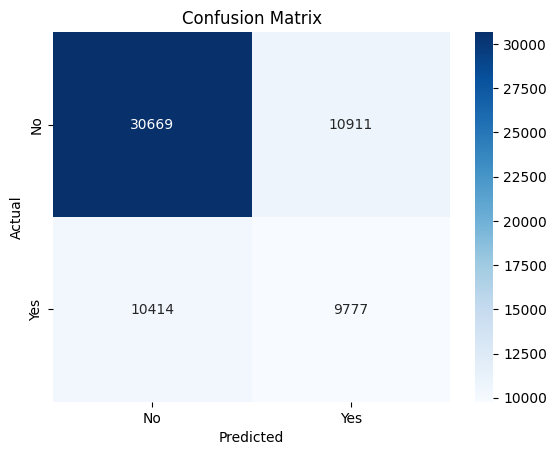

In [ ]:
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest Classification

Random Forest Models build an entire "forest" of decision trees during training. Each tree in the forest is constructed using a random subset of the data; and each split for the decision tree uses a random subset of features. When making predictions, the random forest aggregates the results from all trees. By growing large trees and making a prediction based on the aggregation of many trees, it reduces the variance while keeping the bias the same for the model, compared to a single decision tree.

The hyperparameters that we tuned in the random forest model are the number of trees in the forest and the depth of each tree. In instead of using grid search, we decided to tune each hyperparameter sequentially. We can only do this because the performance metrics stay the same and converges after a certain point. So, we can tune one hyperparameter at a time by fixing the other one. This allows us to try more options for an individual hyperparameter instead of trying all combinations of both hyperparameters in grid search.

### Predicting Heart Disease

Random forest classifer for heart disease with 120 trees and max depth of 30 and class weights to address imbalance classes

A high accuracy indicates that the model correctly predicted whether patients had heart disease in about 91.76% of cases. Given the context of heart disease prediction, a higher F1 score is desirable over the actual low F1 score in the output (0.0595) as it indicates a balanced performance between not missing true cases (recall) and not raising false alarms (precision).

Confusion Matrix:

 - True Negatives (56519): The model correctly predicted 'no heart disease' for 56,519 instances.
 - False Positives (255): The model incorrectly predicted 'heart disease' for 255 instances where there was none.
 - False Negatives (4836): The model failed to identify 'heart disease' in 4,836 instances where it was present.
 - True Positives (1611): The model correctly predicted 'heart disease' for 1,611 instances.

The confusion matrix indicates that while the model is very good at identifying negative cases (no heart disease), it is relatively poor at detecting positive cases (heart disease), as indicated by the high number of false negatives compared to true positives. This is reflected in the low F1 score, which suggests that the model's precision and recall for the positive class are not balanced and that the model might be overly conservative, preferring to predict 'no heart disease'.

For medical diagnostics, a high recall rate is often more important than precision, as failing to identify a disease (false negatives) can be more dangerous than incorrectly diagnosing it (false positives), given that further testing can rule out false positives. Hence, there may be a need to adjust the model or its threshold to improve its recall for the positive class, even if it might slightly decrease the overall accuracy.






In [ ]:
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=120,
                                max_depth=30, random_state=42)

rf_clf.fit(hd_data.X_train_scaled, hd_data.y_train)
y_pred_rf = rf_clf.predict(hd_data.X_test_scaled)

rf_acc = rf_clf.score(hd_data.X_test_scaled, hd_data.y_test)

rf_confusion = confusion_matrix(hd_data.y_test, y_pred_rf)

rf_f1_score = f1_score(hd_data.y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_acc}")
print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"Confusion matrix: \n{rf_confusion}")

Random Forest Test Accuracy: 0.9175826844312056
Random Forest F1 Score: 0.059486421577683364
Confusion matrix: 
[[56519   255]
 [ 4836   161]]


Plot confusion matrix

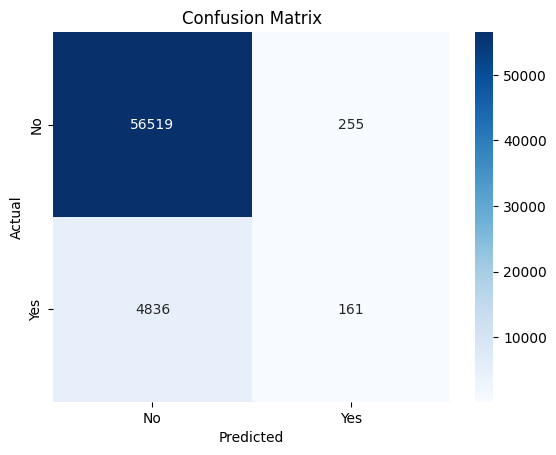

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tune hyperparameters of the random forest model. First we tune the number of trees in the forest.

In [ ]:
num_trees = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in num_trees:

    rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=i,
                                    max_depth=30, random_state=42)

    rf_clf.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)
    y_pred_rf = rf_clf.predict(hd_data_encoded.X_test_pca)

    rf_acc = rf_clf.score(hd_data_encoded.X_test_pca, hd_data_encoded.y_test)
    rf_f1_score = f1_score(hd_data_encoded.y_test, y_pred_rf)

    accuracies.append(rf_acc)
    f_scores.append(rf_f1_score)

    print(f"Random Forest Test Accuracy with {i} trees: {rf_acc}")
    print(f"Random Forest F1 Score with {i} trees: {rf_f1_score}")
    print("----")

Random Forest Test Accuracy with 1 trees: 0.8573764387819527
Random Forest F1 Score with 1 trees: 0.19513977708752056
----
Random Forest Test Accuracy with 12 trees: 0.9137944990367648
Random Forest F1 Score with 12 trees: 0.12056151940545003
----
Random Forest Test Accuracy with 23 trees: 0.9145877515338913
Random Forest F1 Score with 23 trees: 0.11861009021049117
----
Random Forest Test Accuracy with 34 trees: 0.9155428922957375
Random Forest F1 Score with 34 trees: 0.11471237060919734
----
Random Forest Test Accuracy with 45 trees: 0.9160447459163685
Random Forest F1 Score with 45 trees: 0.10985238585650532
----
Random Forest Test Accuracy with 56 trees: 0.9160123682634246
Random Forest F1 Score with 56 trees: 0.11194796302636084
----
Random Forest Test Accuracy with 67 trees: 0.9159961794369527
Random Forest F1 Score with 67 trees: 0.11010118333047506
----
Random Forest Test Accuracy with 78 trees: 0.9164170889252238
Random Forest F1 Score with 78 trees: 0.11090063716204582
----
Ra

Plot performance metric and number of trees in the random forest

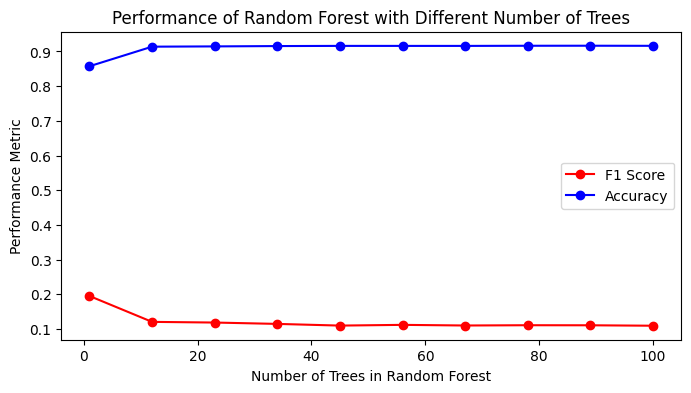

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(num_trees, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(num_trees, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Performance Metric')
plt.title('Performance of Random Forest with Different Number of Trees')

plt.legend()

plt.show()

We see that the performance metric stablizies after a certain number of trees. So, we can fix the number of trees and tune the depth of the trees. We can only do this because the performance metrics stay the same.

In [ ]:
depth = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in depth:

    rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                    max_depth=i, random_state=42)

    rf_clf.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)
    y_pred_rf = rf_clf.predict(hd_data_encoded.X_test_pca)

    rf_acc = rf_clf.score(hd_data_encoded.X_test_pca, hd_data_encoded.y_test)
    rf_f1_score = f1_score(hd_data_encoded.y_test, y_pred_rf)

    accuracies.append(rf_acc)
    f_scores.append(rf_f1_score)

    print(f"Random Forest Test Accuracy with depth {i}: {rf_acc}")
    print(f"Random Forest F1 Score with depth {i}: {rf_f1_score}")
    print("----")

Random Forest Test Accuracy with depth 1: 0.7132635055284843
Random Forest F1 Score with depth 1: 0.2881028938906753
----
Random Forest Test Accuracy with depth 12: 0.761554774894368
Random Forest F1 Score with depth 12: 0.3310169414543307
----
Random Forest Test Accuracy with depth 23: 0.8815139790516585
Random Forest F1 Score with depth 23: 0.33287758636405074
----
Random Forest Test Accuracy with depth 34: 0.9107024331806187
Random Forest F1 Score with depth 34: 0.21736662883087401
----
Random Forest Test Accuracy with depth 45: 0.9166599213223033
Random Forest F1 Score with depth 45: 0.10965063991698375
----
Random Forest Test Accuracy with depth 56: 0.9172912855547102
Random Forest F1 Score with depth 56: 0.08588298443370908
----
Random Forest Test Accuracy with depth 67: 0.9174855514723738
Random Forest F1 Score with depth 67: 0.0774660633484163
----
Random Forest Test Accuracy with depth 78: 0.9175988732576775
Random Forest F1 Score with depth 78: 0.07689517591585056
----
Random

Plot performance metrics and depth of trees

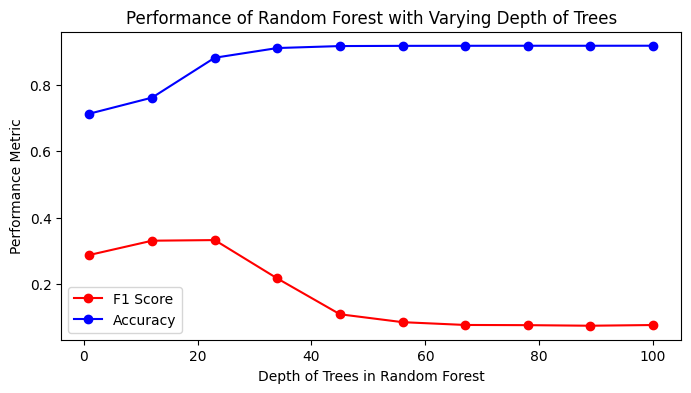

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(depth, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(depth, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Depth of Trees in Random Forest')
plt.ylabel('Performance Metric')
plt.title('Performance of Random Forest with Varying Depth of Trees')

plt.legend()

plt.show()

Test random forest classification. From the above plots, the best performing model has 50 trees and a max depth of 23

The model correctly predicted the test data with about 88.15% accuracy. The F1 score of 0.3329 is a measure of the test's accuracy in identifying true positives, which is moderate but suggests there might be room for improvement.

Confusion Matrix:

 - True Negatives (52626): The number of negative instances (no heart disease) correctly classified by the model.
 - False Positives (4148): The number of negative instances incorrectly classified as positive (heart disease).
 - False Negatives (3171): The number of positive instances (heart disease) that the model incorrectly classified as negative.
 - True Positives (1826): The number of positive instances correctly identified.

The confusion matrix indicates that while the model is quite good at identifying negative cases, it is not as effective at correctly identifying positive cases, as seen by the lower number of true positives compared to false negatives. This is also reflected in the F1 score, which is a balance between precision and recall. A higher F1 score would be preferred, especially in medical diagnostics where missing out on true cases (higher recall) can be crucial.

Overall, the model shows good accuracy, but it might not be as effective in conditions where the cost of false negatives is high. It could be necessary to adjust the model to improve its sensitivity (recall) to the positive class, potentially at the expense of some accuracy.

In [ ]:
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                max_depth=23, random_state=42)

rf_clf.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)
y_pred_rf = rf_clf.predict(hd_data_encoded.X_test_pca)

rf_acc = rf_clf.score(hd_data_encoded.X_test_pca, hd_data_encoded.y_test)

rf_confusion = confusion_matrix(hd_data_encoded.y_test, y_pred_rf)

rf_f1_score = f1_score(hd_data_encoded.y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_acc}")
print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"Confusion matrix: \n{rf_confusion}")

Random Forest Test Accuracy: 0.8815139790516585
Random Forest F1 Score: 0.33287758636405074
Confusion matrix: 
[[52626  4148]
 [ 3171  1826]]


Plot confusion matrix

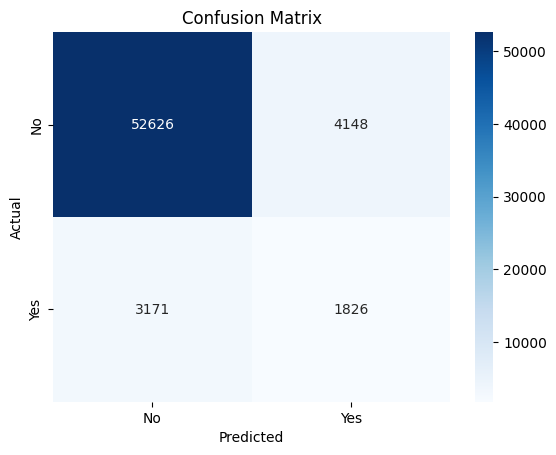

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predicting Skin Cancer

Random forest classifier for skin cancer using 120 trees and a max depth of 30

The model correctly predicted the test data with about 90.22% accuracy, indicating a high level of performance in classifying the cases as either positive or negative for skin cancer. The very low F1 score suggests that the model's performance is not balanced when it comes to precision and recall, particularly in correctly identifying the positive cases (skin cancer).

Confusion Matrix:

 - True Negatives (55687): The number of correctly identified non-cases of skin cancer.
 - False Positives (165): The instances where the model incorrectly predicted skin cancer.
 - False Negatives (5877): The cases where the model missed identifying skin cancer.
 - True Positives (421): The number of correctly identified cases of skin cancer.

Despite the high accuracy, the model has a very low F1 score due to a high number of false negatives compared to true positives. This indicates that while the model is good at identifying negatives (not skin cancer), it frequently misses positive cases (actual skin cancer), which is a significant issue for a medical diagnostic tool where failing to detect the disease can have serious consequences.

The low F1 score suggests that the model is not very effective for the positive class and would not be reliable as a diagnostic tool without further improvement, particularly aimed at increasing its sensitivity to detecting skin cancer cases.

In [ ]:
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=120,
                                max_depth=30, random_state=42)

rf_clf.fit(sc_data.X_train_scaled, sc_data.y_train)
y_pred_rf = rf_clf.predict(sc_data.X_test_scaled)

rf_acc = rf_clf.score(sc_data.X_test_scaled, sc_data.y_test)

rf_confusion = confusion_matrix(sc_data.y_test, y_pred_rf)

rf_f1_score = f1_score(sc_data.y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_acc}")
print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"Confusion matrix: \n{rf_confusion}")

Random Forest Test Accuracy: 0.902187110456363
Random Forest F1 Score: 0.013712047012732615
Confusion matrix: 
[[55687   165]
 [ 5877    42]]


Plot confusion matrix

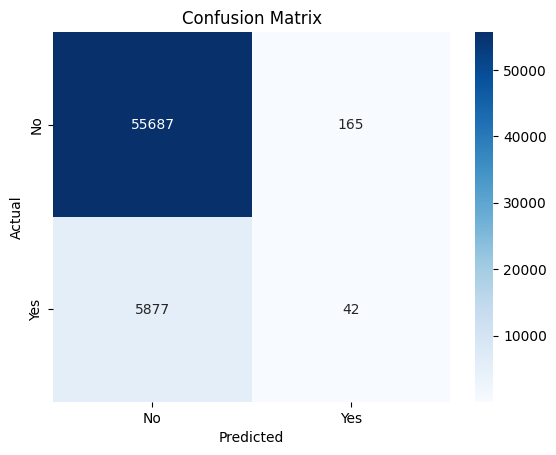

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tune hyperparameter of number of trees in random forest

In [ ]:
num_trees = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in num_trees:

    rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=i,
                                    max_depth=30, random_state=42)

    rf_clf.fit(sc_data_encoded.X_train_pca, sc_data_encoded.y_train)
    y_pred_rf = rf_clf.predict(sc_data_encoded.X_test_pca)

    rf_acc = rf_clf.score(sc_data_encoded.X_test_pca, sc_data_encoded.y_test)
    rf_f1_score = f1_score(sc_data_encoded.y_test, y_pred_rf)

    accuracies.append(rf_acc)
    f_scores.append(rf_f1_score)

    print(f"Random Forest Test Accuracy with {i} trees: {rf_acc}")
    print(f"Random Forest F1 Score with {i} trees: {rf_f1_score}")
    print("----")

Random Forest Test Accuracy with 1 trees: 0.8045361091774458
Random Forest F1 Score with 1 trees: 0.2318361114645629
----
Random Forest Test Accuracy with 12 trees: 0.8785999902867041
Random Forest F1 Score with 12 trees: 0.22682750799051446
----
Random Forest Test Accuracy with 23 trees: 0.8843632125107251
Random Forest F1 Score with 23 trees: 0.21237181607674493
----
Random Forest Test Accuracy with 34 trees: 0.8861116057696977
Random Forest F1 Score with 34 trees: 0.20875042177482847
----
Random Forest Test Accuracy with 45 trees: 0.8869858023991841
Random Forest F1 Score with 45 trees: 0.21002602693221684
----
Random Forest Test Accuracy with 56 trees: 0.8884427967816613
Random Forest F1 Score with 56 trees: 0.20802206642914609
----
Random Forest Test Accuracy with 67 trees: 0.8884427967816613
Random Forest F1 Score with 67 trees: 0.20638028331221928
----
Random Forest Test Accuracy with 78 trees: 0.8887180068316848
Random Forest F1 Score with 78 trees: 0.21061093247588425
----
Ran

Plot performance metrics and number of trees in random forest

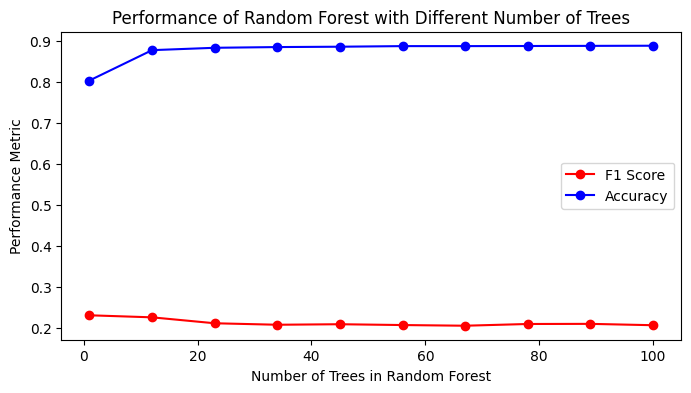

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(num_trees, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(num_trees, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Performance Metric')
plt.title('Performance of Random Forest with Different Number of Trees')

plt.legend()

plt.show()

We see that the performance metric stablizies after a certain number of trees. So, we can fix the number of trees and tune the depth of the trees. We can only do this because the performance metrics stay the same.

In [ ]:
depth = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in depth:

    rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                    max_depth=i, random_state=42)

    rf_clf.fit(sc_data_encoded.X_train_pca, sc_data_encoded.y_train)
    y_pred_rf = rf_clf.predict(sc_data_encoded.X_test_pca)

    rf_acc = rf_clf.score(sc_data_encoded.X_test_pca, sc_data_encoded.y_test)
    rf_f1_score = f1_score(sc_data_encoded.y_test, y_pred_rf)

    accuracies.append(rf_acc)
    f_scores.append(rf_f1_score)

    print(f"Random Forest Test Accuracy with depth {i}: {rf_acc}")
    print(f"Random Forest F1 Score with depth {i}: {rf_f1_score}")
    print("----")

Random Forest Test Accuracy with depth 1: 0.5792200223405806
Random Forest F1 Score with depth 1: 0.25974025974025977
----
Random Forest Test Accuracy with depth 12: 0.6812905732463453
Random Forest F1 Score with depth 12: 0.3102203847097159
----
Random Forest Test Accuracy with depth 23: 0.8464166032604297
Random Forest F1 Score with depth 23: 0.29762345450507144
----
Random Forest Test Accuracy with depth 34: 0.895922034611711
Random Forest F1 Score with depth 34: 0.145874850538063
----
Random Forest Test Accuracy with depth 45: 0.9018147674475078
Random Forest F1 Score with depth 45: 0.06447632269011261
----
Random Forest Test Accuracy with depth 56: 0.902753719382882
Random Forest F1 Score with depth 56: 0.04392805984402356
----
Random Forest Test Accuracy with depth 67: 0.9026242087711062
Random Forest F1 Score with depth 67: 0.04204491161012899
----
Random Forest Test Accuracy with depth 78: 0.902753719382882
Random Forest F1 Score with depth 78: 0.043623626811017356
----
Random 

Plot performance metrics and depth of trees

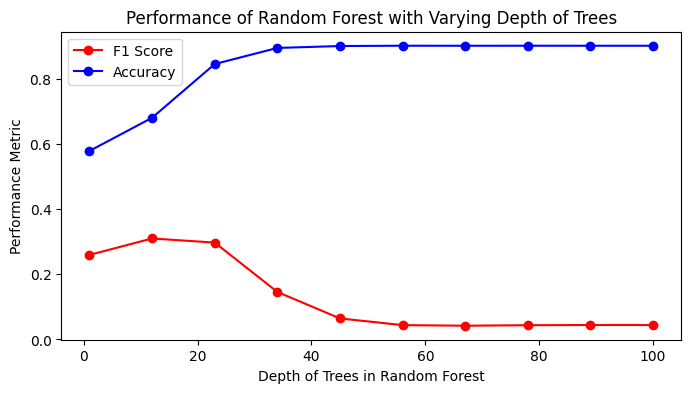

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(depth, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(depth, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Depth of Trees in Random Forest')
plt.ylabel('Performance Metric')
plt.title('Performance of Random Forest with Varying Depth of Trees')

plt.legend()

plt.show()

Test random forest classifier. From the above plots, the best performing classifiers have 50 trees and a max depth of 23

The model accurately classified about 84.64% of the test cases. This high accuracy rate indicates that the model is performing well overall on the test set. An F1 score of approximately 0.2976 suggests that there is room for improvement, especially in correctly classifying the positive class (cases of skin cancer).

Confusion Matrix:

 - True Negatives (50274): The model correctly predicted the absence of skin cancer.
 - False Positives (5578): The model incorrectly predicted skin cancer when it was not present.
 - False Negatives (3909): The model incorrectly predicted the absence of skin cancer when it was present.
 - True Positives (20101): The model correctly predicted the presence of skin cancer.

The high number of True Positives indicates that the model has a substantial capacity to identify positive cases (skin cancer).
The number of False Positives is also high, which might suggest that the model tends to overpredict the positive class. The F1 score being closer to 0 than to 1 implies that the model's precision and recall are not optimal, especially given that the ideal F1 score is 1.

This information suggests that while the classifier has a reasonable level of accuracy, its capacity to correctly identify skin cancer cases (as reflected by the F1 score) could be improved. The balance between sensitivity (true positive rate) and specificity (true negative rate) could be further optimized.

In [ ]:
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                max_depth=23, random_state=42)

rf_clf.fit(sc_data_encoded.X_train_pca, sc_data_encoded.y_train)
y_pred_rf = rf_clf.predict(sc_data_encoded.X_test_pca)

rf_acc = rf_clf.score(sc_data_encoded.X_test_pca, sc_data_encoded.y_test)

rf_confusion = confusion_matrix(sc_data_encoded.y_test, y_pred_rf)

rf_f1_score = f1_score(sc_data_encoded.y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_acc}")
print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"Confusion matrix: \n{rf_confusion}")

Random Forest Test Accuracy: 0.8464166032604297
Random Forest F1 Score: 0.29762345450507144
Confusion matrix: 
[[50274  5578]
 [ 3909  2010]]


Plot confusion matrix

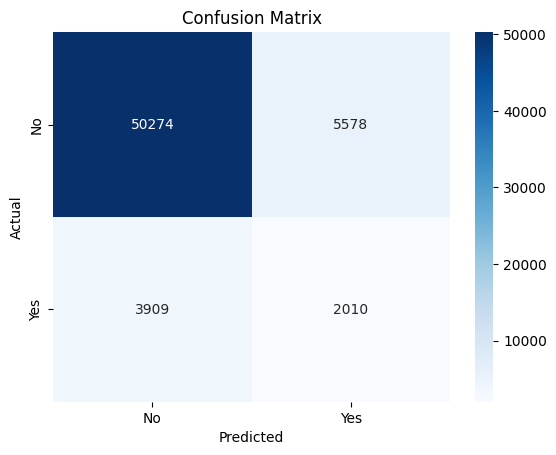

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predicting Arthritis

Random forest classifier for arthritis with 120 trees and a max depth of 30

The model correctly classified about 70.00% of the test cases. This is the proportion of the total number of predictions that were correct. An F1 score of about 0.4255 suggests that the model has moderate performance in terms of precision and recall, particularly for the positive class (cases of arthritis).

Confusion Matrix:

 - True Negatives (36377): The model correctly predicted the absence of arthritis.
 - False Positives (5203): The model incorrectly predicted arthritis when it was not present.
 - False Negatives (13327): The model incorrectly predicted the absence of arthritis when it was present.
 - True Positives (6864): The model correctly predicted the presence of arthritis.

The model has a relatively high number of False Negatives, indicating a potential issue with sensitivity (the model's ability to correctly identify those with arthritis). The number of True Positives is lower than False Negatives, which further suggests that the model may struggle to identify all positive cases effectively.

While the accuracy is fair, the F1 score indicates that there is significant room for improvement in the model's performance on the positive class. These outputs indicate that the model can fairly predict arthritis, but it may benefit from improvements in its ability to classify positive cases accurately, as evidenced by a moderate F1 score and a substantial number of False Negatives.

In [ ]:
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=120,
                                max_depth=30, random_state=42)

rf_clf.fit(a_data.X_train, a_data.y_train)
y_pred_rf = rf_clf.predict(a_data.X_test)

rf_acc = rf_clf.score(a_data.X_test, a_data.y_test)

rf_confusion = confusion_matrix(a_data.y_test, y_pred_rf)

rf_f1_score = f1_score(a_data.y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_acc}")
print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"Confusion matrix: \n{rf_confusion}")

Random Forest Test Accuracy: 0.7000210454744136
Random Forest F1 Score: 0.4255688511377023
Confusion matrix: 
[[36377  5203]
 [13327  6864]]


Plot of confusion matrix

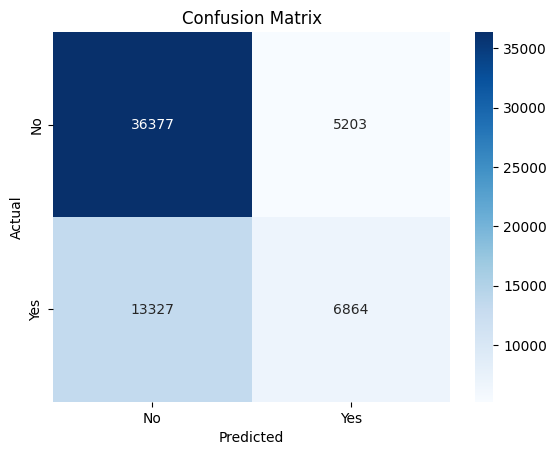

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tune hyperparameter of number of trees in random forest

In [ ]:
num_trees = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in num_trees:

    rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=i,
                                    max_depth=30, random_state=42)

    rf_clf.fit(a_data_encoded.X_train_pca, a_data.y_train)
    y_pred_rf = rf_clf.predict(a_data_encoded.X_test_pca)

    rf_acc = rf_clf.score(a_data_encoded.X_test_pca, a_data_encoded.y_test)
    rf_f1_score = f1_score(a_data_encoded.y_test, y_pred_rf)

    accuracies.append(rf_acc)
    f_scores.append(rf_f1_score)

    print(f"Random Forest Test Accuracy with {i} trees: {rf_acc}")
    print(f"Random Forest F1 Score with {i} trees: {rf_f1_score}")
    print("----")

Random Forest Test Accuracy with 1 trees: 0.654821841964676
Random Forest F1 Score with 1 trees: 0.4886810551558753
----
Random Forest Test Accuracy with 12 trees: 0.7105761603341374
Random Forest F1 Score with 12 trees: 0.5230498345960944
----
Random Forest Test Accuracy with 23 trees: 0.7160803613346068
Random Forest F1 Score with 23 trees: 0.5383278930188481
----
Random Forest Test Accuracy with 34 trees: 0.7204837221349825
Random Forest F1 Score with 34 trees: 0.5384656508954825
----
Random Forest Test Accuracy with 45 trees: 0.7213093522850529
Random Forest F1 Score with 45 trees: 0.5412147216373958
----
Random Forest Test Accuracy with 56 trees: 0.7225558919233944
Random Forest F1 Score with 56 trees: 0.5422787244271139
----
Random Forest Test Accuracy with 67 trees: 0.7222159265674831
Random Forest F1 Score with 67 trees: 0.5423412370309124
----
Random Forest Test Accuracy with 78 trees: 0.7224749477910346
Random Forest F1 Score with 78 trees: 0.5430848370159119
----
Random Fore

Plot performance metrics and number of trees in random forest

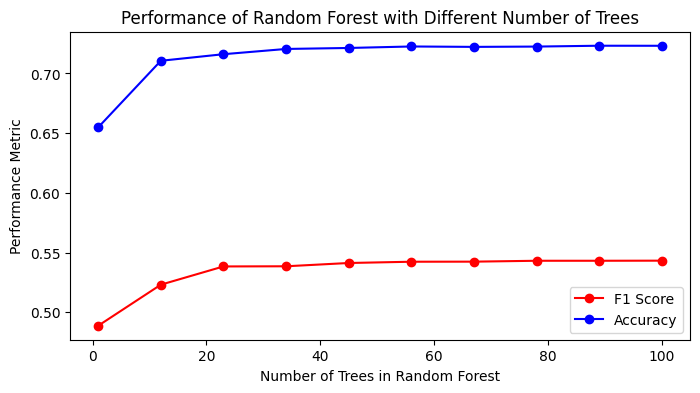

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(num_trees, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(num_trees, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Performance Metric')
plt.title('Performance of Random Forest with Different Number of Trees')

plt.legend()

plt.show()

We see that the performance metric stablizies after a certain number of trees. So, we can fix the number of trees and tune the depth of the trees. We can only do this because the performance metrics stay the same.

In [ ]:
depth = np.linspace(1, 100, 10, dtype=int)

f_scores = []
accuracies = []

for i in depth:

    rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                    max_depth=i, random_state=42)

    rf_clf.fit(a_data_encoded.X_train_pca, a_data_encoded.y_train)
    y_pred_rf = rf_clf.predict(a_data_encoded.X_test_pca)

    rf_acc = rf_clf.score(a_data_encoded.X_test_pca, a_data_encoded.y_test)
    rf_f1_score = f1_score(a_data_encoded.y_test, y_pred_rf)

    accuracies.append(rf_acc)
    f_scores.append(rf_f1_score)

    print(f"Random Forest Test Accuracy with depth {i}: {rf_acc}")
    print(f"Random Forest F1 Score with depth {i}: {rf_f1_score}")
    print("----")

Random Forest Test Accuracy with depth 1: 0.6633857311683476
Random Forest F1 Score with depth 1: 0.5751588582636944
----
Random Forest Test Accuracy with depth 12: 0.6939826132003691
Random Forest F1 Score with depth 12: 0.6216600284210316
----
Random Forest Test Accuracy with depth 23: 0.717067879749397
Random Forest F1 Score with depth 23: 0.58578437181523
----
Random Forest Test Accuracy with depth 34: 0.7212769746321089
Random Forest F1 Score with depth 34: 0.5228500956128925
----
Random Forest Test Accuracy with depth 45: 0.7214388628968286
Random Forest F1 Score with depth 45: 0.5055885986840214
----
Random Forest Test Accuracy with depth 56: 0.7202408897379029
Random Forest F1 Score with depth 56: 0.5014856483484783
----
Random Forest Test Accuracy with depth 67: 0.7218597723850998
Random Forest F1 Score with depth 67: 0.5044561737475123
----
Random Forest Test Accuracy with depth 78: 0.7216169399880202
Random Forest F1 Score with depth 78: 0.5040378403322566
----
Random Forest

Plot of performance metrics and depth of trees

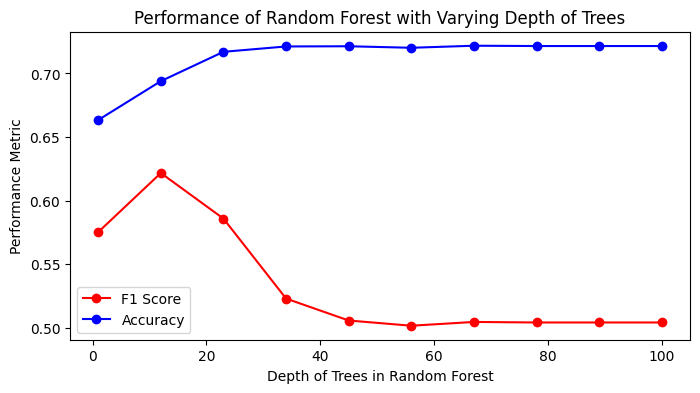

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(depth, f_scores, marker='o', linestyle='-', color='r', label='F1 Score')
plt.plot(depth, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Depth of Trees in Random Forest')
plt.ylabel('Performance Metric')
plt.title('Performance of Random Forest with Varying Depth of Trees')

plt.legend()

plt.show()

Test random forest classifier. The best performing classifier has 50 trees and a max depth of 12

The model has an accuracy rate of about 69.39%, which indicates that it correctly predicted the outcome for approximately 69.39% of the cases in the test set. An F1 score of about 0.6217 suggests that the model has a good balance between precision and recall, especially for the positive class.

Confusion Matrix:

 - True Negatives (27338): The model correctly predicted the negative class.
 - False Positives (14242): The model incorrectly predicted the positive class when it was actually the negative class.
 - False Negatives (4661): The model incorrectly predicted the negative class when it was actually the positive class.
 - True Positives (15530): The model correctly predicted the positive class.

The model has a relatively high number of True Positives (TP) compared to False Negatives (FN), which is desirable. The number of False Positives (FP) is also quite high, which could indicate that the model is more biased towards predicting the positive class.

The F1 score is quite high, which suggests that the model has a good balance between precision (how many of the instances it identified as positive were actually positive) and recall (how many of the actual positive instances it identified).

These outputs suggest that the Random Forest model has a reasonably good performance on this particular dataset, with a tendency to predict the positive class. However, the number of False Positives is considerable, which may be a concern depending on the cost or risk associated with a false positive in the specific application domain.

In [ ]:
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                max_depth=12, random_state=42)

rf_clf.fit(a_data_encoded.X_train_pca, a_data_encoded.y_train)
y_pred_rf = rf_clf.predict(a_data_encoded.X_test_pca)

rf_acc = rf_clf.score(a_data_encoded.X_test_pca, a_data_encoded.y_test)

rf_confusion = confusion_matrix(a_data_encoded.y_test, y_pred_rf)

rf_f1_score = f1_score(a_data_encoded.y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_acc}")
print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"Confusion matrix: \n{rf_confusion}")

Random Forest Test Accuracy: 0.6939826132003691
Random Forest F1 Score: 0.6216600284210316
Confusion matrix: 
[[27338 14242]
 [ 4661 15530]]


Plot confusion matrix

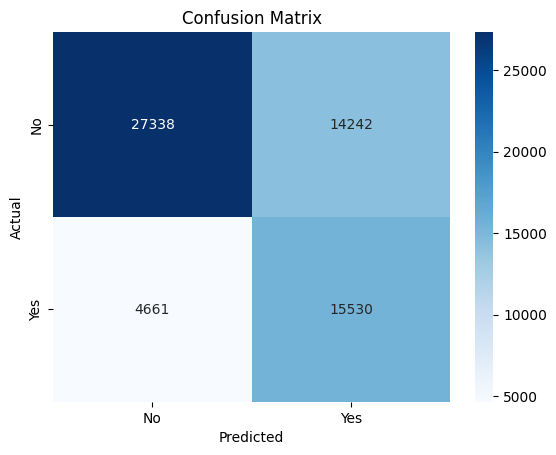

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gradient Boosting Tree Classification

Gradient boosting tree classifier is an ensemble method where each successive tree is trained on the residual errors on the previous aggregated trees. It trains and fits trees in a sequential order, where each new tree is created to fit the errors the ensemble so far. This improves the overall accuracy of the model. This is an iterative learning process that optimizes predictions over many iterations.

The hyperparameters that we tuned are the number of trees, max depth of the trees, and the learning rate. Increasing the number of trees makes the model more complex and prone to overfitting because each subsequent tree that is fitted will be trained on the error of the ensemble so far, so the training error will reduce. As such, the variance will increase and the bias will decrease as the number of trees increases. Increasing the depth of the trees will also increase the complexity of the ensemble because each tree is more complex since there are more splits of the data. The learning rate affects the size of the contribution of each tree to the overall ensemble prediction. Having a small learning rate will mostly likely result in needing more trees to achieve good performance.


### Predicting Heart Disease

Gradient boosting classifier for predicting heart disease with 100 trees, max depth of 1 and a learning rate of 1.

As we can see here, the model from the gradient boosting tree test is approximately 91.88% accurate.

In [ ]:
gbt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=1, random_state=42)

gbt_clf.fit(hd_data.X_train, hd_data.y_train)
y_pred_gbt = gbt_clf.predict(hd_data.X_test)

gbt_acc = gbt_clf.score(hd_data.X_test, hd_data.y_test)

gbt_confusion = confusion_matrix(hd_data.y_test, y_pred_gbt)

gbt_f1_score = f1_score(hd_data.y_test, y_pred_gbt)

print(f"Gradient Boosting Tree Test Accuracy: {gbt_acc}")
print(f"Gradient Boosting Tree F1 Score: {gbt_f1_score}")
print(f"Confusion matrix: \n{gbt_confusion}")

Gradient Boosting Tree Test Accuracy: 0.9188130352430752
Gradient Boosting Tree F1 Score: 0.08301334796123606
Confusion matrix: 
[[56529   245]
 [ 4770   227]]


Plot of confusion matrix

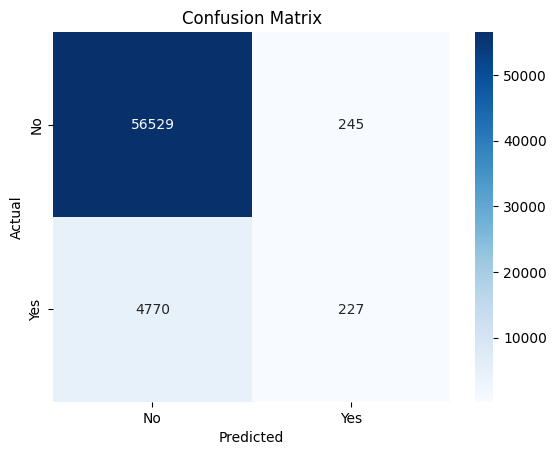

In [ ]:
sns.heatmap(gbt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameters: learning rate, max depth, and number of trees

Since we need to tune 3 hyperparameters, we will use grid search to determine the best set of parameters.

In [ ]:
param_grid = {
    'learning_rate': [0.7, 0.8, 0.9],
    'max_depth': [1, 2, 3],
    'num_estimators': [50, 100, 150],
}

pgrid = ParameterGrid(param_grid)

In [ ]:
best_params = None
best_fscore = 0

for params in pgrid:
    print(f"Checking following parameters: {params}")
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    num_estimators = params['num_estimators']

    gbt_clf = GradientBoostingClassifier(n_estimators=num_estimators,
                                         learning_rate=learning_rate,
                                         max_depth=max_depth, random_state=42)

    gbt_clf.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)
    y_pred_gbt = gbt_clf.predict(hd_data_encoded.X_test_pca)

    gbt_f1_score = f1_score(hd_data_encoded.y_test, y_pred_gbt)

    if gbt_f1_score > best_fscore:
        best_fscore = gbt_f1_score
        best_params = params

print(f"best parameters: {best_params}")

Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.8, 'max_depth': 1, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.8, 'max_depth': 1, 'num

Test gradient boosting model. The best performing model had the following hyperparameters: 0.9 for the learning_rate, 3 for the max depth, 150 for the number of trees.

As we can see here, the model from the gradient boosting tree test is approximately 91.59% accurate.

In [ ]:
gbt_clf = GradientBoostingClassifier(n_estimators=best_params['num_estimators'],
                                     learning_rate=best_params['learning_rate'],
                                     max_depth=best_params['max_depth'],
                                     random_state=42)

gbt_clf.fit(hd_data_encoded.X_train_pca, hd_data_encoded.y_train)
y_pred_gbt = gbt_clf.predict(hd_data_encoded.X_test_pca)

gbt_acc = gbt_clf.score(hd_data_encoded.X_test_pca, hd_data_encoded.y_test)

gbt_confusion = confusion_matrix(hd_data_encoded.y_test, y_pred_gbt)

gbt_f1_score = f1_score(hd_data_encoded.y_test, y_pred_gbt)

print(f"Gradient Boosting Tree Test Accuracy: {gbt_acc}")
print(f"Gradient Boosting Tree F1 Score: {gbt_f1_score}")
print(f"Confusion matrix: \n{gbt_confusion}")

Gradient Boosting Tree Test Accuracy: 0.915850479998705
Gradient Boosting Tree F1 Score: 0.11808618934509671
Confusion matrix: 
[[56225   549]
 [ 4649   348]]


Plot confusion matrix

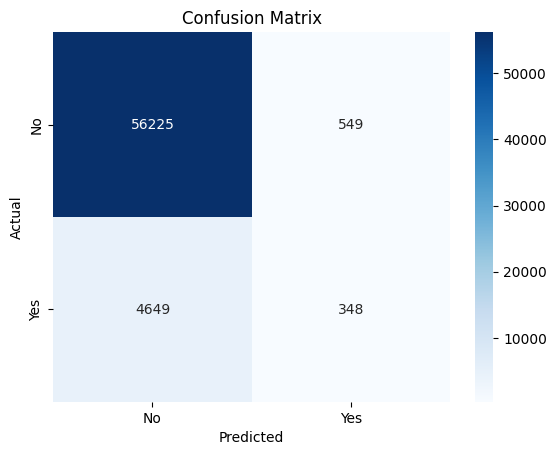

In [ ]:
sns.heatmap(gbt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predicting Skin Cancer

Gradient boosting classifier for skin cancer using 100 trees, max depth of 1, and a learning rate of 1.

As we can see here, the model from the gradient boosting tree test is approximately 90.40% accurate.

In [ ]:
gbt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=1, random_state=42)

gbt_clf.fit(sc_data.X_train, sc_data.y_train)
y_pred_gbt = gbt_clf.predict(sc_data.X_test)

gbt_acc = gbt_clf.score(sc_data.X_test, sc_data.y_test)

gbt_confusion = confusion_matrix(sc_data.y_test, y_pred_gbt)

gbt_f1_score = f1_score(sc_data.y_test, y_pred_gbt)

print(f"Gradient Boosting Tree Test Accuracy: {gbt_acc}")
print(f"Gradient Boosting Tree F1 Score: {gbt_f1_score}")
print(f"Confusion matrix: \n{gbt_confusion}")

Gradient Boosting Tree Test Accuracy: 0.9039840701947516
Gradient Boosting Tree F1 Score: 0.009684421439305393
Confusion matrix: 
[[55811    41]
 [ 5890    29]]


Plot confusion matrix

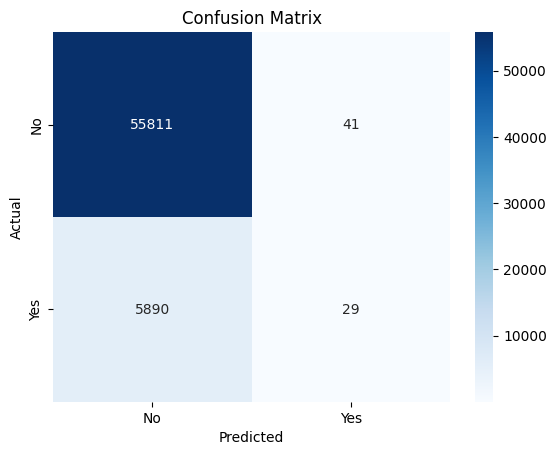

In [ ]:
sns.heatmap(gbt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameters: learning rate, max depth, and number of trees.

Since we need to tune 3 hyperparameters, we will use grid search to determine the best set of parameters.

In [ ]:
param_grid = {
    'learning_rate': [0.7, 0.8, 0.9],
    'max_depth': [1, 2, 3],
    'num_estimators': [50, 100, 150],
}

pgrid = ParameterGrid(param_grid)

In [ ]:
best_params = None
best_fscore = 0

for params in pgrid:
    print(f"Checking following parameters: {params}")
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    num_estimators = params['num_estimators']

    gbt_clf = GradientBoostingClassifier(n_estimators=num_estimators,
                                         learning_rate=learning_rate,
                                         max_depth=max_depth, random_state=42)

    gbt_clf.fit(sc_data_encoded.X_train_pca, sc_data_encoded.y_train)
    y_pred_gbt = gbt_clf.predict(sc_data_encoded.X_test_pca)

    gbt_f1_score = f1_score(sc_data_encoded.y_test, y_pred_gbt)

    if gbt_f1_score > best_fscore:
        best_fscore = gbt_f1_score
        best_params = params

print(f"best parameters: {best_params}")

Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.8, 'max_depth': 1, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.8, 'max_depth': 1, 'num

Test gradient boosting model. The best performing model had the following hyperparameters: 0.9 for the learning_rate, 3 for the max depth, 150 for the number of trees.

As we can see here, the model from the gradient boosting tree test is approximately 90.02% accurate.

In [ ]:
gbt_clf = GradientBoostingClassifier(n_estimators=best_params['num_estimators'],
                                     learning_rate=best_params['learning_rate'],
                                     max_depth=best_params['max_depth'],
                                     random_state=42)

gbt_clf.fit(sc_data_encoded.X_train_pca, sc_data_encoded.y_train)
y_pred_gbt = gbt_clf.predict(sc_data_encoded.X_test_pca)

gbt_acc = gbt_clf.score(sc_data_encoded.X_test_pca, sc_data_encoded.y_test)

gbt_confusion = confusion_matrix(sc_data_encoded.y_test, y_pred_gbt)

gbt_f1_score = f1_score(sc_data_encoded.y_test, y_pred_gbt)

print(f"Gradient Boosting Tree Test Accuracy: {gbt_acc}")
print(f"Gradient Boosting Tree F1 Score: {gbt_f1_score}")
print(f"Confusion matrix: \n{gbt_confusion}")

Gradient Boosting Tree Test Accuracy: 0.9002282624532547
Gradient Boosting Tree F1 Score: 0.06465320989528
Confusion matrix: 
[[55395   457]
 [ 5706   213]]


Plot confusion matrix

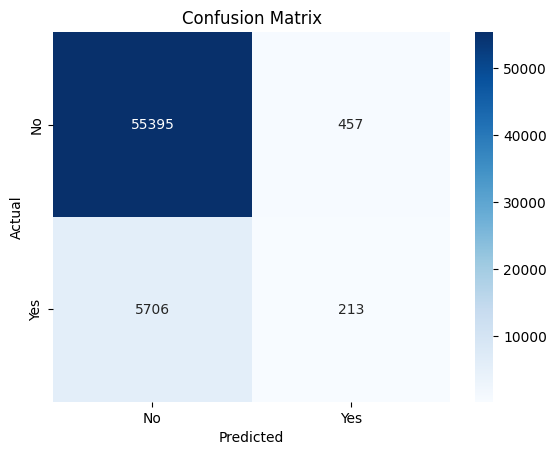

In [ ]:
sns.heatmap(gbt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predicting Arthritis

Gradient boosting classifer for arthritis with 100 trees, max depth of 1, and a learning rate of 1.

As we can see here, the model from the gradient boosting tree test is approximately 71.30% accurate.

In [ ]:
gbt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=1, random_state=42)

gbt_clf.fit(a_data.X_train, a_data.y_train)
y_pred_gbt = gbt_clf.predict(a_data.X_test)

gbt_acc = gbt_clf.score(a_data.X_test, a_data.y_test)

gbt_confusion = confusion_matrix(a_data.y_test, y_pred_gbt)

gbt_f1_score = f1_score(a_data.y_test, y_pred_gbt)

print(f"Gradient Boosting Tree Test Accuracy: {gbt_acc}")
print(f"Gradient Boosting Tree F1 Score: {gbt_f1_score}")
print(f"Confusion matrix: \n{gbt_confusion}")

Gradient Boosting Tree Test Accuracy: 0.7129882954784608
Gradient Boosting Tree F1 Score: 0.4245886209470644
Confusion matrix: 
[[37501  4079]
 [13650  6541]]


Plot confusion matrix

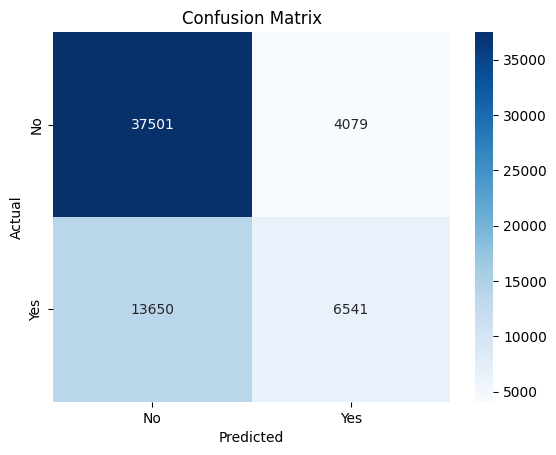

In [ ]:
sns.heatmap(gbt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tuning hyperparameters: learning rate, max depth, and number of trees

Since we need to tune 3 hyperparameters, we will use grid search to determine the best set of parameters.

In [ ]:
param_grid = {
    'learning_rate': [0.7, 0.8, 0.9],
    'max_depth': [1, 2, 3],
    'num_estimators': [50, 100, 150],
}

pgrid = ParameterGrid(param_grid)

In [ ]:
best_params = None
best_fscore = 0

for params in pgrid:
    print(f"Checking following parameters: {params}")
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    num_estimators = params['num_estimators']

    gbt_clf = GradientBoostingClassifier(n_estimators=num_estimators,
                                         learning_rate=learning_rate,
                                         max_depth=max_depth, random_state=42)

    gbt_clf.fit(a_data_encoded.X_train_pca, a_data_encoded.y_train)
    y_pred_gbt = gbt_clf.predict(a_data_encoded.X_test_pca)

    gbt_f1_score = f1_score(a_data_encoded.y_test, y_pred_gbt)

    if gbt_f1_score > best_fscore:
        best_fscore = gbt_f1_score
        best_params = params

print(f"best parameters: {best_params}")

Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 1, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 2, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 100}
Checking following parameters: {'learning_rate': 0.7, 'max_depth': 3, 'num_estimators': 150}
Checking following parameters: {'learning_rate': 0.8, 'max_depth': 1, 'num_estimators': 50}
Checking following parameters: {'learning_rate': 0.8, 'max_depth': 1, 'num

Test gradient boosting model. The best performing model had the following hyperparameters: 0.7 for the learning_rate, 2 for the max depth, 150 for the number of trees.

As we can see here, the model from the gradient boosting tree test is approximately 73.25% accurate.

In [ ]:
gbt_clf = GradientBoostingClassifier(n_estimators=best_params['num_estimators'],
                                     learning_rate=best_params['learning_rate'],
                                     max_depth=best_params['max_depth'],
                                     random_state=42)

gbt_clf.fit(a_data_encoded.X_train_pca, a_data_encoded.y_train)
y_pred_gbt = gbt_clf.predict(a_data_encoded.X_test_pca)

gbt_acc = gbt_clf.score(a_data_encoded.X_test_pca, a_data_encoded.y_test)

gbt_confusion = confusion_matrix(a_data_encoded.y_test, y_pred_gbt)

gbt_f1_score = f1_score(a_data_encoded.y_test, y_pred_gbt)

print(f"Gradient Boosting Tree Test Accuracy: {gbt_acc}")
print(f"Gradient Boosting Tree F1 Score: {gbt_f1_score}")
print(f"Confusion matrix: \n{gbt_confusion}")

Gradient Boosting Tree Test Accuracy: 0.7324958313771834
Gradient Boosting Tree F1 Score: 0.5392080312325711
Confusion matrix: 
[[35579  6001]
 [10523  9668]]


Plot confusion matrix

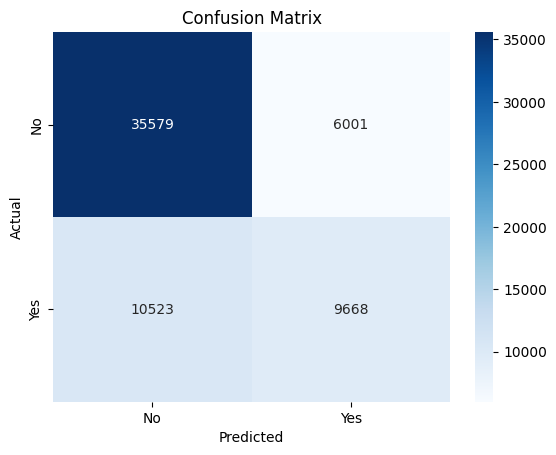

In [ ]:
sns.heatmap(gbt_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Neural Network

Neural networks consists of interconnected nodes organized into layers. The input layer receives data, the hidden layers process it through weighted connections, and the output layer produces the final result. During training, the network adjusts these weights based on the error in its predictions. In between each layer, there is typically a nonlinear activation function so that these models can capture more complex relationships in the data.

The hyperparameters that we are tuning are the betas for the optimizer, the number of hidden layers, and the learning rate. We tuning the neural network, we compare the F1 score because that is a better metric for how well the model is classifying the data. We initially look at the accuracies of the simple neural networks as a benchmark for overall performance.


In [ ]:
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class CVDDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return (self.features[index], self.labels[index])

In [ ]:
class DataLoaderWrapper:
    def __init__(self, predictor, encoded=False, batch=64, pca=False):
        if predictor == 'Heart_Disease' and not encoded:
            data = hd_data
        elif predictor == 'Heart_Disease' and encoded:
            data = hd_data_encoded
        elif predictor == 'Skin_Cancer' and not encoded:
            data = sc_data
        elif predictor == 'Skin_Cancer' and encoded:
            data = sc_data_encoded
        elif predictor == 'Arthritis' and not encoded:
            data = a_data
        elif predictor == 'Arthritis' and encoded:
            data = a_data_encoded
        else:
            print(f"Unimplemented predictor: {predictor}")

        if pca:
            X_train_tensor = torch.tensor(data.X_train_pca, dtype=torch.float32)
            X_test_tensor = torch.tensor(data.X_test_pca, dtype=torch.float32)
        else:
            X_train_tensor = torch.tensor(data.X_train.values, dtype=torch.float32)
            X_test_tensor = torch.tensor(data.X_test.values, dtype=torch.float32)

        y_train_tensor = torch.tensor(data.y_train.values, dtype=torch.long)
        y_test_tensor = torch.tensor(data.y_test.values, dtype=torch.long)

        train_dataset = CVDDataset(X_train_tensor, y_train_tensor)
        test_dataset = CVDDataset(X_test_tensor, y_test_tensor)

        self.train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True, num_workers=0)
        self.test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=True, num_workers=0)

        self.num_features = X_train_tensor.shape[1]


In [ ]:
def train_model(model_class, train_loader, epochs=10):
    model = model_class()
    model = model.to(device)
    loss_function = nn.CrossEntropyLoss()

    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    acc_epochs = []
    loss_epochs = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct_pred = 0
        total_num = 0

        for inputs, labels in train_loader:
            labels = labels.type(torch.LongTensor)
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            predicted = outputs.argmax(1)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            total_num += labels.size(0)
            correct_pred += (predicted == labels).sum().item()

        accuracy = 100 * correct_pred / total_num
        acc_epochs.append(accuracy)

        average_loss = running_loss / len(train_loader)
        loss_epochs.append(average_loss)

        print(f"The loss for Epoch {epoch} is: {running_loss/len(train_loader)}, Accuracy = {accuracy}")

    return model, acc_epochs, loss_epochs

In [ ]:
def plot_training_accuracy(model_name, acc_epochs):
    epochs = list(range(1, 11))

    fig, ax = plt.subplots(figsize=(5, 3))

    sns.lineplot(x=epochs, y=acc_epochs)

    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel("Accuracy", fontsize=12)

    plt.title(f"Training Accuracy on Each Epoch for {model_name}")

    plt.show()

In [ ]:
def calc_test_accuracy(model, test_loader):
    total = 0
    correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.type(torch.LongTensor)
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            predicted = outputs.argmax(1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    test_acc = 100 * correct / total

    print('Test Accuracy: ' + str(test_acc))

    return test_acc

### Simple Neural Network

As our baseline neural network model, we created a simple feedforward neural network with no hidden layers. The input layer is directly connected to the output layer. Since there is no nonlinear activation in between the layers, this model should perform the same as a regular logistic regression model because the output layer will be passed through a sigmoid function, since this is a binary classification task. In the previous logistic regression models, we used the standardized version of our data, whereas here we decided to use the original dataset to see if the model can uncover the relationships. Additionally, a neural network is not as sensitive to feature scaling. So, the results here for the simple feedforward neural network is slightly different than the results of the logistic regression model with no regularization penalty from before.

In [ ]:
class FNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sequence = nn.Sequential(
            nn.Linear(in_features=16, out_features=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        outputs = self.linear_sequence(x)

        return self.linear_sequence(self.flatten(x))

#### Predicting Heart Disease

Get `Heart_Disease` data

In [ ]:
hd_dl = DataLoaderWrapper('Heart_Disease')

Train neural network to predict `Heart_Disease`

In [ ]:
fnn_model, acc_epochs_FNN, loss_epochs_FNN = train_model(FNN, hd_dl.train_loader, epochs=10)

The loss for Epoch 0 is: 0.39410386558518884, Accuracy = 91.91607678391472
The loss for Epoch 1 is: 0.39409991255914323, Accuracy = 91.91607678391472
The loss for Epoch 2 is: 0.3941018887981483, Accuracy = 91.91607678391472
The loss for Epoch 3 is: 0.39409596025866567, Accuracy = 91.91607678391472
The loss for Epoch 4 is: 0.39409793591104125, Accuracy = 91.91607678391472
The loss for Epoch 5 is: 0.39409991242020465, Accuracy = 91.91607678391472
The loss for Epoch 6 is: 0.39409991228126606, Accuracy = 91.91607678391472
The loss for Epoch 7 is: 0.39409793622751244, Accuracy = 91.91607678391472
The loss for Epoch 8 is: 0.394099912366173, Accuracy = 91.91607678391472
The loss for Epoch 9 is: 0.3941058408361863, Accuracy = 91.91607678391472


Plot training accuracy of neural network for each epoch. We see that the accuracy is constant for all epochs.

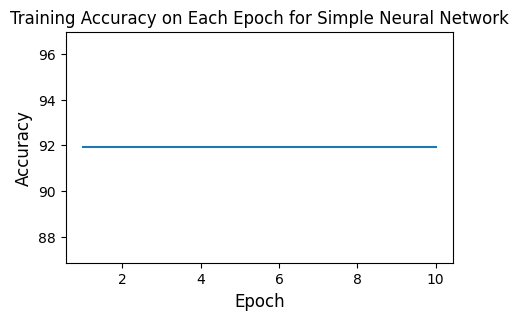

In [ ]:
plot_training_accuracy("Simple Neural Network", acc_epochs_FNN)

Calculate test accuracy of neural network, which comes out to 91.9104.

In [ ]:
fnn_test_acc = calc_test_accuracy(fnn_model, hd_dl.test_loader)

Test Accuracy: 91.91044341195706


#### Predicting Skin Cancer

Get `Skin_Cancer` data

In [ ]:
sc_dl = DataLoaderWrapper('Skin_Cancer')

Train neural network to predict `Skin_Cancer`

In [ ]:
fnn_model, acc_epochs_FNN, loss_epochs_FNN = train_model(FNN, sc_dl.train_loader, epochs=10)

The loss for Epoch 0 is: 0.4671247405605716, Accuracy = 90.1239664404269
The loss for Epoch 1 is: 0.41071978211402893, Accuracy = 90.25631063245953
The loss for Epoch 2 is: 0.41070825486750034, Accuracy = 90.25631063245953
The loss for Epoch 3 is: 0.41069848503173556, Accuracy = 90.25631063245953
The loss for Epoch 4 is: 0.4106981987411017, Accuracy = 90.25631063245953
The loss for Epoch 5 is: 0.4107040781812389, Accuracy = 90.25631063245953
The loss for Epoch 6 is: 0.4106922110755405, Accuracy = 90.25631063245953
The loss for Epoch 7 is: 0.4106961613614088, Accuracy = 90.25631063245953
The loss for Epoch 8 is: 0.4107020904643645, Accuracy = 90.25631063245953
The loss for Epoch 9 is: 0.41069813800179195, Accuracy = 90.25631063245953


Plot training accuracy of neural network for each epoch. We see that the accuracy stabilizes after 2 epochs.

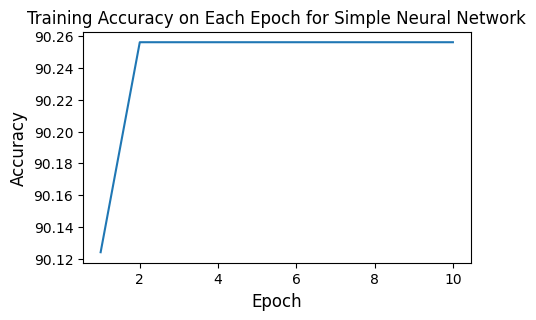

In [ ]:
plot_training_accuracy("Simple Neural Network", acc_epochs_FNN)

Calculate test accuracy of neural network, which comes out to 90.4178.

In [ ]:
fnn_test_acc = calc_test_accuracy(fnn_model, sc_dl.test_loader)

Test Accuracy: 90.41783361124152


#### Predicting Arthritis

Get `Arthritis` data

In [ ]:
a_dl = DataLoaderWrapper('Arthritis')

Train neural network to predict `Arthritis`

In [ ]:
fnn_model, acc_epochs_FNN, loss_epochs_FNN = train_model(FNN, a_dl.train_loader, epochs=10)

The loss for Epoch 0 is: 0.6446367153399536, Accuracy = 67.14869092572131
The loss for Epoch 1 is: 0.635365776457153, Accuracy = 67.2575612243659
The loss for Epoch 2 is: 0.6135340153213857, Accuracy = 67.26646511496136
The loss for Epoch 3 is: 0.5996747369887884, Accuracy = 67.26686983726117
The loss for Epoch 4 is: 0.5964908528377342, Accuracy = 67.26727455956096
The loss for Epoch 5 is: 0.5949251077407323, Accuracy = 67.26929817105993
The loss for Epoch 6 is: 0.593823063546467, Accuracy = 67.26727455956096
The loss for Epoch 7 is: 0.5929467477381029, Accuracy = 67.26686983726117
The loss for Epoch 8 is: 0.5922772601165787, Accuracy = 67.26970289335972
The loss for Epoch 9 is: 0.5917337080321452, Accuracy = 67.26929817105993


Plot training accuracy of neural network for each epoch. We see that the accuracy stabilizes after about 2 epochs.

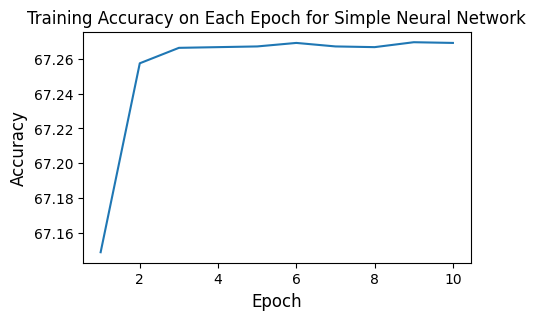

In [ ]:
plot_training_accuracy("Simple Neural Network", acc_epochs_FNN)

Calculate test accuracy of neural network, which comes out to 67.3358.

In [ ]:
fnn_test_acc = calc_test_accuracy(fnn_model, a_dl.test_loader)

Test Accuracy: 67.33580482750806


### Neural Network with Hidden Layers


Create a more complex neural network with 3 hidden layers. We want to compare this performance to the simple neural network with no hidden layers to see if the model can learn hidden nonlinear relationships.

In [ ]:
class FC_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sequence = nn.Sequential(
            nn.Linear(in_features=16, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=10),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear_sequence(self.flatten(x))

#### Predicting Heart Disease

Get `Heart_Disease` data

In [ ]:
hd_dl = DataLoaderWrapper('Heart_Disease')

Train neural network to predict `Heart_Disease`

In [ ]:
fc_nn_model, acc_epochs_FCNN, loss_epochs_FCNN = train_model(FC_NN, hd_dl.train_loader, epochs=10)

The loss for Epoch 0 is: 1.5444778199024196, Accuracy = 91.72019119081442
The loss for Epoch 1 is: 1.5419886980116042, Accuracy = 91.91607678391472
The loss for Epoch 2 is: 1.5419946315220001, Accuracy = 91.91607678391472
The loss for Epoch 3 is: 1.5419887023032623, Accuracy = 91.91607678391472
The loss for Epoch 4 is: 1.541998584571202, Accuracy = 91.91607678391472
The loss for Epoch 5 is: 1.5419847501803172, Accuracy = 91.91607678391472
The loss for Epoch 6 is: 1.5419867261646016, Accuracy = 91.91607678391472
The loss for Epoch 7 is: 1.541992655568591, Accuracy = 91.91607678391472
The loss for Epoch 8 is: 1.5419847502420678, Accuracy = 91.91607678391472
The loss for Epoch 9 is: 1.541982773300651, Accuracy = 91.91607678391472


Plot training accuracy of neural network for each epoch. We see that the accuracy stabilizes after 2 epochs.

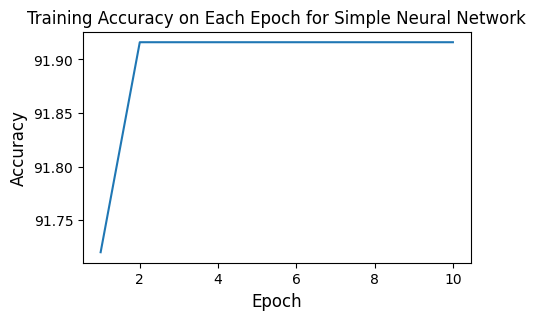

In [ ]:
plot_training_accuracy("Simple Neural Network", acc_epochs_FCNN)

Calculate test accuracy of neural network, which comes out to 91.9104.

In [ ]:
fc_nn_test_acc = calc_test_accuracy(fc_nn_model, hd_dl.test_loader)

Test Accuracy: 91.91044341195706


#### Predicting Skin Cancer

Get `Skin_Cancer` data

In [ ]:
sc_dl = DataLoaderWrapper('Skin_Cancer')

Train neural network to predict `Skin_Cancer`

In [ ]:
fc_nn_model, acc_epochs_FCNN, loss_epochs_FCNN = train_model(FC_NN, sc_dl.train_loader, epochs=10)

The loss for Epoch 0 is: 1.556705480503684, Accuracy = 90.17941339549868
The loss for Epoch 1 is: 1.5510286628134786, Accuracy = 90.25631063245953
The loss for Epoch 2 is: 1.5465773333233583, Accuracy = 90.25631063245953
The loss for Epoch 3 is: 1.5452624386192386, Accuracy = 90.25631063245953
The loss for Epoch 4 is: 1.5445815821874638, Accuracy = 90.25631063245953
The loss for Epoch 5 is: 1.5440299486255622, Accuracy = 90.25631063245953
The loss for Epoch 6 is: 1.543990104039757, Accuracy = 90.25631063245953
The loss for Epoch 7 is: 1.5436695701438077, Accuracy = 90.25631063245953
The loss for Epoch 8 is: 1.5434888923949326, Accuracy = 90.25631063245953
The loss for Epoch 9 is: 1.5433022946281403, Accuracy = 90.25631063245953


Plot training accuracy of neural network for each epoch. We see that the accuracy stabilizes after 2 epochs.

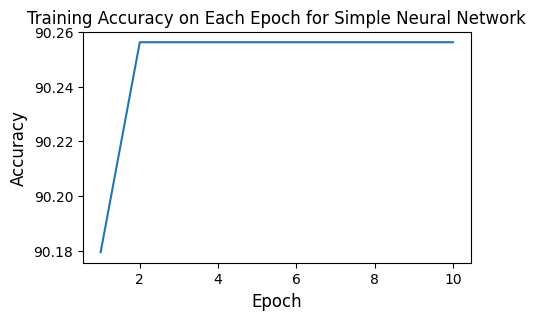

In [ ]:
plot_training_accuracy("Simple Neural Network", acc_LIST_FCNN)

Calculate test accuracy of neural network, which comes out to 90.4178.

In [ ]:
fc_nn_test_acc = calc_test_accuracy(fc_nn_model, sc_dl.test_loader)

Test Accuracy: 90.41783361124152


#### Predicting Arthritis

Get `Arthritis` data

In [ ]:
a_dl = DataLoaderWrapper('Arthritis')

Train neural network to predict `Arthritis`

In [ ]:
fc_nn_model, acc_epochs_FCNN, loss_epochs_FCNN = train_model(FC_NN, a_dl.train_loader, epochs=10)

The loss for Epoch 0 is: 1.5989611818209364, Accuracy = 67.10740925114233
The loss for Epoch 1 is: 1.5979797839809655, Accuracy = 67.26686983726117
The loss for Epoch 2 is: 1.5979797839809655, Accuracy = 67.26606039266157
The loss for Epoch 3 is: 1.5979797839809655, Accuracy = 67.26727455956096
The loss for Epoch 4 is: 1.5979797839809655, Accuracy = 67.26646511496136
The loss for Epoch 5 is: 1.5979797839809655, Accuracy = 67.26646511496136
The loss for Epoch 6 is: 1.5979797839809655, Accuracy = 67.26686983726117
The loss for Epoch 7 is: 1.5979797839809655, Accuracy = 67.26646511496136
The loss for Epoch 8 is: 1.5979797839809655, Accuracy = 67.26727455956096
The loss for Epoch 9 is: 1.5979797839809655, Accuracy = 67.26646511496136


Plot training accuracy of neural network for each epoch. We see that the accuracy stabilizes after 2 epochs.

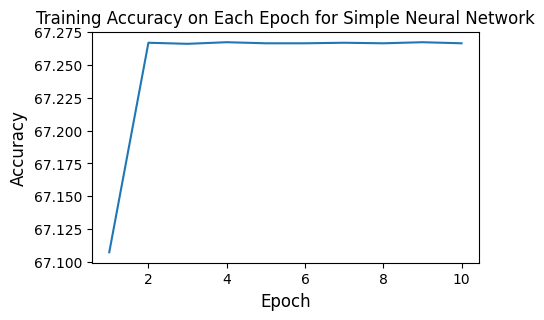

In [ ]:
plot_training_accuracy("Simple Neural Network", acc_epochs_FCNN)

Calculate test accuracy of neural network, which comes out to 67.3131.

In [ ]:
fc_nn_test_acc = calc_test_accuracy(fc_nn_model, a_dl.test_loader)

Test Accuracy: 67.3131404704473


### Tuning Hyperparameters




The hyperparameters that we are tuning are the betas for the optimizer, the number of hidden layers, and the learning rate. Since we have 3 hyperparameters to tune, we use grid search. We define a new neural network class to vary the number of hidden layers. Additionally, we define a new training loop where we can vary the betas and learning rate.

When determining the best parameters, we use the F1 score and not the accuracy to account for the class imbalance.

In [ ]:
class TunedNN(nn.Module):
    def __init__(self, in_features, ff_layers=3):
        super().__init__()

        self.flatten = nn.Flatten()

        self.relu = nn.ReLU()

        self.fcs = nn.ModuleList()

        if ff_layers == 1:
            self.fcs.append(nn.Linear(in_features=in_features, out_features=2))
        else:
            self.fcs.append(nn.Linear(in_features=in_features, out_features=10))

            for i in range(1, ff_layers - 1):
                self.fcs.append(nn.Linear(in_features=10, out_features=10))

            self.fcs.append(nn.Linear(in_features=10, out_features=2))

        self.sigmoid = nn.Sigmoid(dim=1)


    def forward(self, x):
        x = self.flatten(x)

        if len(self.fcs) == 1:
            output = self.fcs[0](x)
        else:
            x = self.relu(self.fcs[0](x))

            for i in range(1, len(self.fcs) - 1):
                x = self.relu(self.fcs[i](x))

            output = self.fcs[-1](x)

        return self.sigmoid(output)

In [ ]:
def train_tuned_nn(train_loader, in_features, pgrid, num_epochs=5):
    best_params = None
    best_f1 = 0

    for params in pgrid:
        print(f"Checking following parameters: {params}")

        nn_tuned = TunedNN(in_features=in_features, ff_layers=params['num_fcs'])
        nn_tuned = nn_tuned.to(device)
        loss_function = nn.CrossEntropyLoss()

        optimizer = optim.Adam(nn_tuned.parameters(), lr=params['learning_rate'], betas=params['betas'])

        for epoch in range(num_epochs):
            running_loss = 0.0
            f1_sum = 0

            for inputs, labels in train_loader:
                labels = labels.type(torch.LongTensor)
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = nn_tuned(inputs)
                predicted = outputs.argmax(1)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

                f1_sum += f1_score(labels, predicted, zero_division=0)

            avg_f1 = f1_sum / len(train_loader)

            if avg_f1 > best_f1:
                best_f1 = avg_f1
                best_params = params

    print(f"best parameters: {best_params}")
    return best_params, best_f1

In [ ]:
def test_tuned_model(train_loader, in_features, best_params, epoch=5):
    f1_epochs_NN_TUNE = []
    loss_epochs_NN_TUNE = []

    nn_tuned = TunedNN(in_features=in_features, ff_layers=best_params['num_fcs'])
    nn_tuned = nn_tuned.to(device)
    loss_function = nn.CrossEntropyLoss()

    optimizer = optim.Adam(nn_tuned.parameters(), lr=best_params['learning_rate'], betas=best_params['betas'])

    for epoch in range(epoch):
        running_loss = 0.0
        f1_sum = 0

        for inputs, labels in train_loader:
            labels = labels.type(torch.LongTensor)

            optimizer.zero_grad()
            outputs = nn_tuned(inputs)
            predicted = outputs.argmax(1)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            f1_sum += f1_score(labels, predicted, zero_division=0)

        avg_f1 = f1_sum / len(train_loader)
        f1_epochs_NN_TUNE.append(avg_f1)

        average_loss = running_loss / len(train_loader)
        loss_epochs_NN_TUNE.append(average_loss)

    print(f1_epochs_NN_TUNE)

    return nn, f1_epochs_NN_TUNE, loss_epochs_NN_TUNE

In [ ]:
def plot_training_f1_tuned(model_name, f1_epochs, epochs=5):
    epochs = list(range(1, epochs + 1))

    fig, ax = plt.subplots(figsize=(5, 3))

    sns.lineplot(x=epochs, y=f1_epochs)

    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel("F1 Score", fontsize=12)
    # plt.legend()
    plt.title(f"Training F1 Score on Each Epoch for {model_name}")

    plt.show()

Values for hyperparameters to tune

In [ ]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'betas': [(0.1, 0.2), (0.2, 0.3), (0.3, 0.4)],
    'num_fcs': [1, 2, 3],
}

pgrid = ParameterGrid(param_grid)

#### Heart Disease

Get the one hot encoding data for `Heart_Disease`

In [ ]:
hd_encoded_dl = DataLoaderWrapper('Heart_Disease', encoded=True, pca=True)

Tune a neural network to predict `Heart_Disease`. The best parameters are the following: betas--(0.2, 0.3), learning_rate -- 0.01, num_fcs -- 2

In [ ]:
hd_best_param, hd_best_f1 = train_tuned_nn(hd_encoded_dl.train_loader, hd_encoded_dl.num_features, pgrid)

Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 3}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 3}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 3}
Checking following parameters: {'betas': (0.2, 0.3), 'learning_rate': 0.001, 'num_fcs': 1}
Checking following parameters: {'betas': (0.2, 0.3), 'learning_rate': 0.001, 'num_fcs': 2}
Checking

Test the neural network using best parameters

In [ ]:
hd_nn, hd_acc_epochs_NN_TUNE, hd_loss_epochs_NN_TUNE = test_tuned_model(hd_encoded_dl.train_loader, hd_encoded_dl.num_features, hd_best_param)

[0.1386253005442526, 0.19082043641938065, 0.19171515630803057, 0.1877151742942995, 0.17840135013580485]


Plot the training F1 score for each epoch. We see that the training F1 score increases before decreasing as the number of epochs increases. This signifies that the model might have been surpassed a minimum in the optimization function. This could happen when the step size is too big.

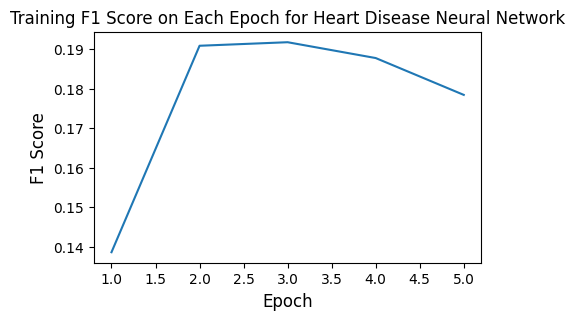

In [ ]:
plot_training_f1_tuned("Heart Disease Neural Network", hd_acc_epochs_NN_TUNE)

#### Skin Cancer

Get the one hot encoding data for `Skin_Cancer`

In [ ]:
sc_encoded_dl = DataLoaderWrapper('Skin_Cancer', encoded=True, pca=True)

Tune a neural network to predict `Skin_Cancer`. The best parameters are the following: betas--(0.1, 0.2), learning_rate -- 0.1, num_fcs -- 1

In [ ]:
sc_best_param, sc_best_f1 = train_tuned_nn(sc_encoded_dl.train_loader, sc_encoded_dl.num_features, pgrid)

Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 3}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 3}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 3}
Checking following parameters: {'betas': (0.2, 0.3), 'learning_rate': 0.001, 'num_fcs': 1}
Checking following parameters: {'betas': (0.2, 0.3), 'learning_rate': 0.001, 'num_fcs': 2}
Checking

Test the neural network using best parameters

In [ ]:
sc_nn, sc_acc_epochs_NN_TUNE, sc_loss_epochs_NN_TUNE = test_tuned_model(sc_encoded_dl.train_loader, sc_encoded_dl.num_features, sc_best_param)

[0.11121968779420115, 0.11081070156628005, 0.11087764130692239, 0.11108523884629792, 0.11215898779000161]


Plot the training F1 score for each epoch. We see that the training F1 score decreases before increasing as the number of epochs increases. This signifies that the model might have been leaving a local minimum before finding a deeper minimum, since F1 score function is not a convex function, so there are many local minimums at which the model could get stuck because they are not the global minimum.

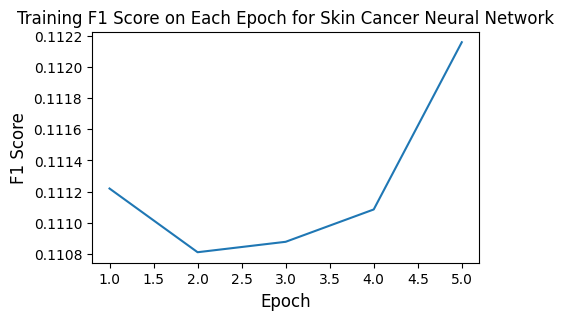

In [ ]:
plot_training_f1_tuned("Skin Cancer Neural Network", sc_acc_epochs_NN_TUNE)

#### Arthritis

Get the one hot encoding data for `Arthritis`

In [ ]:
a_encoded_dl = DataLoaderWrapper('Arthritis', encoded=True, pca=True)

Tune a neural network to predict `Arthritis`. The best parameters are the following: betas--(0.2, 0.3), learning_rate -- 0.001, num_fcs -- 2

In [ ]:
a_best_param, a_best_f1 = train_tuned_nn(a_encoded_dl.train_loader, a_encoded_dl.num_features, pgrid)

Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.001, 'num_fcs': 3}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.01, 'num_fcs': 3}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 1}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 2}
Checking following parameters: {'betas': (0.1, 0.2), 'learning_rate': 0.1, 'num_fcs': 3}
Checking following parameters: {'betas': (0.2, 0.3), 'learning_rate': 0.001, 'num_fcs': 1}
Checking following parameters: {'betas': (0.2, 0.3), 'learning_rate': 0.001, 'num_fcs': 2}
Checking

Test the neural network using best parameters

In [ ]:
a_nn, a_acc_epochs_NN_TUNE, a_loss_epochs_NN_TUNE = test_tuned_model(a_encoded_dl.train_loader, a_encoded_dl.num_features, a_best_param)

[0.5135611273291857, 0.5400155365063617, 0.5416387630930058, 0.5434764998638483, 0.5452240984261729]


Plot the training F1 score for each epoch. We see that the training F1 score increases as the number of epochs increases. This signifies that the model is optimizing itself after each epoch.

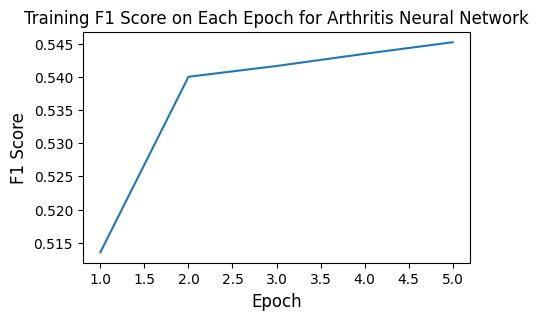

In [ ]:
plot_training_f1_tuned("Arthritis Neural Network", a_acc_epochs_NN_TUNE)

## K-Means Clustering

K-Means is a powerful clustering algorithm that groups similar data points together. The k is the number of clusters. The algorithm iteratively assigns data points to clusters based on the distance to a cluster center and then recalculates the center of each cluster by using the average of the data points in the cluster. This process repeats until the clusters stabilize.

We used this unsupervised clustering algorithm to predict `General Health`. After getting the stabilized clusters, we make a prediction on new data points that belong to a particular cluster by classifying it as the majority label in the clusters.

The hyperparameter that we tune is the number of clusters. As the number of clusters increases, the model becomes more complex because more groupings are formed. This increaes the complexity of the model, which increases variance and decreases bias.

Create and fit a K-Means model with 5 clusters

In [ ]:
clf_km = KMeans(n_clusters=5, random_state=42, n_init="auto")

clf_km.fit(gh_data.X_train)

# clf_km.labels_
clf_km.cluster_centers_

array([[6.97733965e-01, 7.79883071e-02, 8.71207272e-02, 9.83442154e-02,
        2.33879572e-01, 1.09461017e-01, 3.07579055e-01, 3.46306491e-01,
        1.65757777e+02, 6.90780523e+01, 2.52709873e+01, 4.50603849e-01,
        4.58191439e+00, 8.82159775e+00, 7.92811420e+00, 6.42186233e+00],
       [8.58494904e-01, 6.98329374e-02, 1.07632769e-01, 9.93371140e-02,
        1.79726416e-01, 1.21503563e-01, 3.19334815e-01, 3.91907426e-01,
        1.69402445e+02, 7.83098485e+01, 2.72582721e+01, 3.32362633e-01,
        4.91664112e+00, 7.05669400e+01, 2.14405318e+01, 5.34719136e+00],
       [8.24849265e-01, 6.90485524e-02, 1.07520860e-01, 1.04235501e-01,
        1.77596087e-01, 1.03451494e-01, 3.16309197e-01, 2.86124956e-01,
        1.65596722e+02, 6.88761442e+01, 2.52072340e+01, 3.73560322e-01,
        5.48778257e+00, 2.76772881e+01, 2.11264863e+01, 5.19084953e+00],
       [6.63709779e-01, 1.00255241e-01, 7.11745261e-02, 8.32670823e-02,
        2.67793632e-01, 2.55868446e-01, 4.12192979e-01, 6.816

The hyperparameter in the K-Means model is the number of clusters.

Plot inertia/distortion to determine best value of `k` (number of clusters). The intertia is the sum of squared distances of data points to their closest cluster center. Good choices for the clusters have a relatively small intertia value because all the data points for that cluster are close to the center, so the sum of squared distances will be small.

In [ ]:
def test_cluster_size(X, max_k):

    inertia = []
    distortion = []

    for k in range(1, max_k + 1):
        clf = KMeans(n_clusters=k, n_init='auto')
        clf.fit(X)

        inertia.append(clf.inertia_)
        distortion.append(sum(np.min(cdist(X, clf.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    return inertia, distortion

First, we don't use feature scaling to establish a baseline. Using the "elbow method," the optimal of number of clusters is 13.

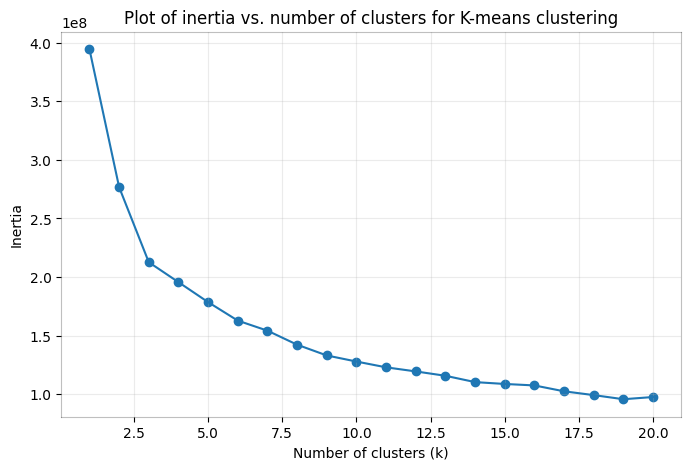

In [ ]:
# Plot distortion vs. k (without feature scaling)
max_k = 20
scores, _ = test_cluster_size(gh_data.X_train, max_k)

plt.scatter(range(1, max_k + 1), scores)
plt.plot(range(1, max_k + 1), scores, label='inertia')

figure = plt.gcf()
figure.set_size_inches(8, 5)

plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
# plt.legend()
plt.title("Plot of inertia vs. number of clusters for K-means clustering")

plt.grid(visible=True, alpha=0.25)

ax = plt.gca()
ax.spines["top"].set_alpha(0.25)
ax.spines["right"].set_alpha(0.25)
ax.spines["bottom"].set_alpha(0.25)
ax.spines["left"].set_alpha(0.25)

plt.show()

Next, we use feature scaling and PCA. The curve for the inertia vs. number of clusters looks more of a straight line with feature scaling compared to without. Using the "elbow method," the optimal number of clusters is 14.

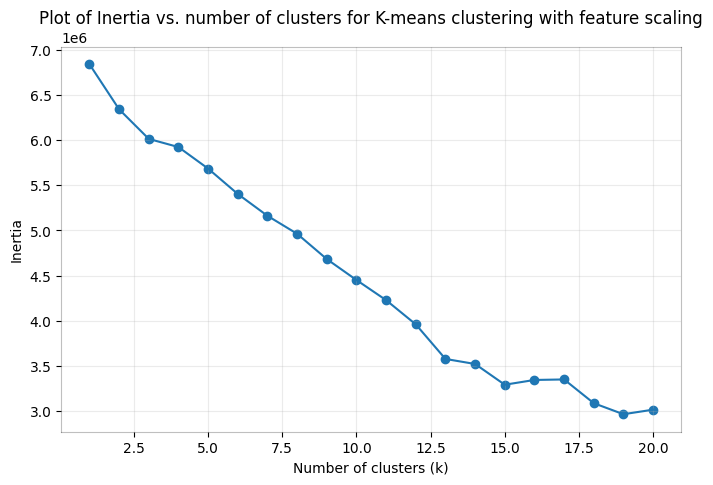

In [ ]:
# Plot distortion vs. k (with feature scaling + PCA)
X = gh_data_encoded.X_train_pca

max_k = 20
scores, _ = test_cluster_size(X, max_k)

plt.scatter(range(1, max_k + 1), scores)
plt.plot(range(1, max_k + 1), scores)

figure = plt.gcf()
figure.set_size_inches(8, 5)

plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Plot of Inertia vs. number of clusters for K-means clustering with feature scaling")

plt.grid(visible=True, alpha=0.25)

ax = plt.gca()
ax.spines["top"].set_alpha(0.25)
ax.spines["right"].set_alpha(0.25)
ax.spines["bottom"].set_alpha(0.25)
ax.spines["left"].set_alpha(0.25)

plt.show()

Plot of clusters in 2D space by projecting all data points onto the top 2 principal components. From the plot of the intertia and number of clusters using the scaled data, using the "elbow method", the optimal number of clusters is 14. As we can see the plot of the clusters, there doesn't seem to be any significant groupings of the data. All the points are scattered and intermixed. This seems to suggest that there is no good groupings of data points for each of the general health values.

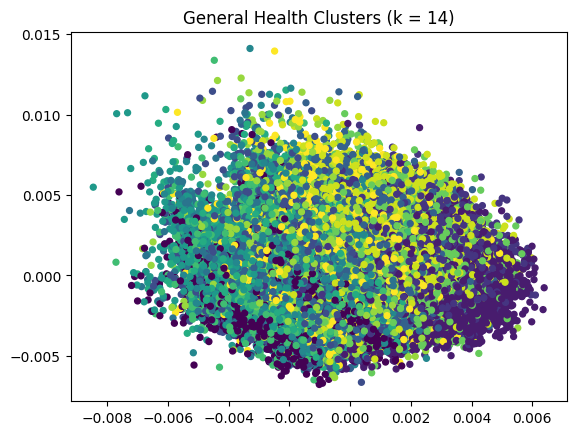

In [ ]:
# PCA for visualisation in 2D.
pca = PCA(n_components=2)
v = pca.fit(np.transpose(X)).components_

clf_kmeans_best = KMeans(n_clusters=14, n_init='auto')
clf_kmeans_best.fit(X)

plt.scatter(v[0], v[1], c=clf_kmeans_best.labels_, s=18)
plt.title("General Health Clusters (k = 14)")
plt.show()

Test the K-Means model on the test set. We use 14 clusters from the "elbow method." For each cluster, we assign the label of the majority class of `General_Health`. So, if majority of the samples have Good `General_Health`, then all test data points that are assigned to this cluster will be predicted to have Good `General_Health`.

We noticed that using this method, the model only predicts 'Very Good' `General_Health`. This is because there are a lot more 'Very Good' samples compared to all other classes. As such, there is significant class imbalance. Since we are using the majority label in each cluster as the prediction, it makes sense that the model would always predict 'Very Good'.

In [ ]:
pred_cluster = clf_kmeans_best.predict(gh_data_encoded.X_test_pca)

cluster_mapping = {}
for cluster in range(14):
    cluster_indices = np.where(pred_cluster == cluster)[0]
    cluster_true_labels = np.array(gh_data_encoded.y_train)[cluster_indices]

    majority_label = np.bincount(cluster_true_labels).argmax()

    cluster_mapping[cluster] = majority_label

pred = np.array([cluster_mapping[cluster] for cluster in pred_cluster])

km_acc = sum(np.array(gh_data_encoded.y_test) == pred) / len(pred)

km_confusion = confusion_matrix(gh_data_encoded.y_test, pred)

km_f1_score = f1_score(gh_data_encoded.y_test, pred, average='macro')

print(f"kMeans Test Accuracy: {km_acc}")
print(f"kMeans F1 Score: {km_f1_score}")
print(f"Confusion matrix: \n{km_confusion}")

kMeans Test Accuracy: 0.35966715772773633
kMeans F1 Score: 0.10581035386007524
Confusion matrix: 
[[    0     0     0  2265     0]
 [    0     0     0  7166     0]
 [    0     0     0 18784     0]
 [    0     0     0 22217     0]
 [    0     0     0 11339     0]]


To address the class imbalance, we decided to run the same model, but use a more balanced training set. In particular, we will sample the same number of data points from each class. The class with the fewest number samples is 'Poor', which has 11,331 data points. So, we decided to use 11,000 samples from each class to retrain the K-Means model.

**Balanced set of General Health Data**

In [ ]:
Counter(cvd_df['General_Health'])

Counter({0: 11331, 3: 110395, 2: 95364, 1: 35810, 4: 55954})

Create the balanced training dataset

In [ ]:
gh_df_0 = cvd_df[cvd_df['General_Health'] == 0][:11000]
gh_df_1 = cvd_df[cvd_df['General_Health'] == 1][:11000]
gh_df_2 = cvd_df[cvd_df['General_Health'] == 2][:11000]
gh_df_3 = cvd_df[cvd_df['General_Health'] == 3][:11000]
gh_df_4 = cvd_df[cvd_df['General_Health'] == 4][:11000]

gh_balanced_df = pd.concat([gh_df_0, gh_df_1, gh_df_2, gh_df_3, gh_df_4]).reset_index(drop=True)

gh_balanced_target = gh_balanced_df['General_Health']

gh_balanced_df = pd.get_dummies(gh_balanced_df, columns=['General_Health', 'Age_Category', 'Checkup'])

Scale the balanced dataset

In [ ]:
gh_balanced_drop_columns = gh_balanced_df.filter(like='General_Health').columns
gh_balanced_features = gh_balanced_df.drop(columns=gh_balanced_drop_columns)


X_train, X_test, y_train, y_test = train_test_split(gh_balanced_features, gh_balanced_target,
                                                    test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply PCA to the balanced dataset to reduce the dimensionality and eliminate any effects of correlation between features

In [ ]:
pca = PCA(n_components=22)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Refit the K-Means model using the balanced dataset. Now we see that the model makes predictions for all classes. And there is an improved F1 score compared to not using the balanced dataset. However, the F1 score is still relatively low, which means that using the unsupervised algorithm to create clusters is not a good method to make predictions. We also see that the model also tends to make more 'Fair' predictions

In [ ]:
clf = KMeans(n_clusters=14, n_init='auto')
clf.fit(X_train_pca)

pred_cluster = clf.predict(X_test_pca)

cluster_mapping = {}
for cluster in range(14):
    cluster_indices = np.where(pred_cluster == cluster)[0]
    cluster_true_labels = np.array(y_train)[cluster_indices]

    majority_label = np.bincount(cluster_true_labels).argmax()

    cluster_mapping[cluster] = majority_label

pred = np.array([cluster_mapping[cluster] for cluster in pred_cluster])

km_acc = sum(np.array(y_test) == pred) / len(pred)

km_confusion = confusion_matrix(y_test, pred)

km_f1_score = f1_score(y_test, pred, average='macro')

print(f"kMeans Test Accuracy: {km_acc}")
print(f"kMeans F1 Score: {km_f1_score}")
print(f"Confusion matrix: \n{km_confusion}")

kMeans Test Accuracy: 0.208
kMeans F1 Score: 0.1914542555971556
Confusion matrix: 
[[ 284 1192  360  366   45]
 [ 341 1038  345  356   67]
 [ 402  892  360  424  127]
 [ 431  873  402  406  113]
 [ 490  647  415  424  200]]


Plot confusion matrix

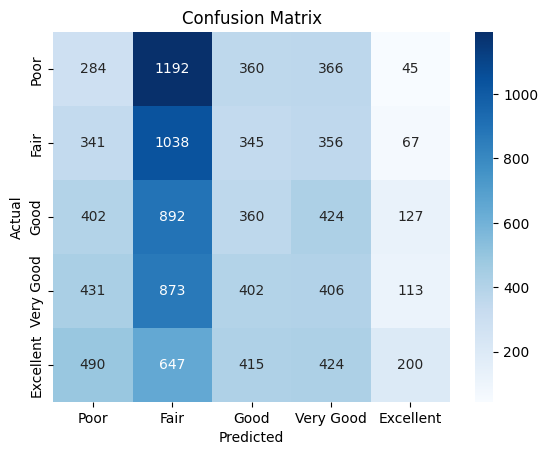

In [ ]:
sns.heatmap(km_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Poor", "Fair", "Good", "Very Good", "Excellent"],
            yticklabels=["Poor", "Fair", "Good", "Very Good", "Excellent"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predictions

Using our best models, we wanted to make predictions using data about ourselves. First, we collected our own data and went through the same preprocessing pipeline of the data. To predict `Heart_Disease`, our best model is the tuned random forest model with an accuracy of 0.882 and an F1 score of 0.333. To predict `Skin_Cancer`, our best model is tuned logistic regression model with an accuracy of 0.707 and an F1 score of 0.317. To predict `Arthritis`, our best model is the tuned logistic regression model with an accuracy of 0.693 and an F1 score of 0.626.

Variables in the dataset

In [ ]:
cvd_df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

Variables in the dataset using one-hot encoding

In [ ]:
cvd_df_encoded.columns

Index(['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Excellent',
       'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor',
       'General_Health_Very Good', 'Age_Category_18-24', 'Age_Category_25-29',
       'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44',
       'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59',
       'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74',
       'Age_Category_75-79', 'Age_Category_80+', 'Checkup_5 or more years ago',
       'Checkup_Never', 'Checkup_Within the past 2 years',
       'Checkup_Within the past 5 years', 'Checkup_Within the past year'],
      dtype='object')

Best Models

In [ ]:
# Best Classifiers
lambdas = np.logspace(0, -6, 15)

# Heart Disease Model
scaler_hd = StandardScaler()
X_train_scaled_hd = scaler_hd.fit_transform(hd_data_encoded.X_train)
pca_hd = PCA(n_components=24)
X_train_pca_hd = pca_hd.fit_transform(X_train_scaled_hd)

rf_clf_hd = RandomForestClassifier(class_weight='balanced', n_estimators=50,
                                   max_depth=23, random_state=42)

rf_clf_hd.fit(X_train_pca_hd, hd_data_encoded.y_train)

# Skin Cancer Model
scaler_sc = StandardScaler()
X_train_scaled_sc = scaler_sc.fit_transform(sc_data_encoded.X_train)
pca_sc = PCA(n_components=24)
X_train_pca_sc = pca_sc.fit_transform(X_train_scaled_sc)

lr_clf_sc = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[9], random_state=42)

lr_clf_sc.fit(X_train_pca_sc, sc_data_encoded.y_train)

# Arthritis Model
scaler_a = StandardScaler()
X_train_scaled_a = scaler_a.fit_transform(a_data_encoded.X_train)
pca_a = PCA(n_components=22)
X_train_pca_a = pca_a.fit_transform(X_train_scaled_a)

lr_clf_a = LogisticRegression(penalty = 'l1', class_weight='balanced', solver='liblinear',
                               C=lambdas[8], random_state=42)

lr_clf_a.fit(X_train_pca_a, a_data_encoded.y_train)

In [ ]:
def make_predictions(data_encoded):
    df_encoded = pd.DataFrame(data=c_data_encoded, columns=list(cvd_df_encoded.columns))

    X_test_scaled = scaler_hd.transform(df_encoded.drop(columns=['Heart_Disease']))
    X_test_pca = pca_hd.transform(X_test_scaled)
    y_pred_hd = rf_clf_hd.predict(X_test_pca)

    X_test_scaled = scaler_sc.transform(df_encoded.drop(columns=['Skin_Cancer']))
    X_test_pca = pca_sc.transform(X_test_scaled)
    y_pred_sc = lr_clf_sc.predict(X_test_pca)

    X_test_scaled = scaler_a.transform(df_encoded.drop(columns=['Arthritis']))
    X_test_pca = pca_a.transform(X_test_scaled)
    y_pred_a = lr_clf_a.predict(X_test_pca)

    pred_hd = "Yes" if y_pred_hd[0] else "No"
    pred_sc = "Yes" if y_pred_sc[0] else "No"
    pred_a = "Yes" if y_pred_a[0] else "No"

    return pred_hd, pred_sc, pred_a

Prediction for Chandler

In [ ]:
# Chandler Data

c_data = [['Excellent', 'Within the past year', 'Yes', 'No', 'No', 'No', 'No',
                 'No', 'No', 'Male', '18-24', 170.18, 64.41, 22.2, 'No', 0, 30, 30, 5]]

c_data_encoded = [[1, 0, 0, 0, 0, 0, 0, 1, 170.18, 64.41, 22.2, 0, 0, 30, 30, 5, 1,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [ ]:
cc_pred_hd, cc_pred_sc, cc_pred_a = make_predictions(c_data_encoded)

print(f"Chandler Heart Disease Prediction: {cc_pred_hd}")
print(f"Chandler Skin Cancer Prediction: {cc_pred_sc}")
print(f"Chandler Arthritis Prediction: {cc_pred_a}")

Chandler Heart Disease Prediction: No
Chandler Skin Cancer Prediction: No
Chandler Arthritis Prediction: No


Prediction for Keshav

In [ ]:
# Keshav Data

k_data = [['Excellent', 'Within the past year', 'Yes', 'No', 'No', 'No', 'No',
           'No', 'No', 'Male', '18-24', 171.45, 63.5, 21.6, 'No', 0, 40, 60, 1]]

k_data_encoded = [[1, 0, 0, 0, 0, 0, 0, 1, 171.45, 63.5, 21.6, 0, 0, 40, 60, 1,
                   0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [ ]:
kr_pred_hd, kr_pred_sc, kr_pred_a = make_predictions(k_data_encoded)

print(f"Keshav Heart Disease Prediction: {kr_pred_hd}")
print(f"Keshav Skin Cancer Prediction: {kr_pred_sc}")
print(f"Kehav Arthritis Prediction: {kr_pred_a}")

Keshav Heart Disease Prediction: No
Keshav Skin Cancer Prediction: No
Kehav Arthritis Prediction: No


Prediction for Skyler

In [ ]:
# Skyler Data

s_data = [['Very Good', 'Within the past year', 'Yes', 'No', 'No', 'No', 'No',
           'No', 'No', 'Male', '18-24', 179.71, 72.6, 22.5, 'No', 0, 30, 30, 3]]

s_data_encoded = [[1, 0, 0, 0, 0, 0, 0, 1, 179.71, 72.6, 22.5, 0, 0,
                   30, 30, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [ ]:
sc_pred_hd, sc_pred_sc, sc_pred_a = make_predictions(s_data_encoded)

print(f"Skyler Heart Disease Prediction: {sc_pred_hd}")
print(f"Skyler Skin Cancer Prediction: {sc_pred_sc}")
print(f"Skyler Arthritis Prediction: {sc_pred_a}")

Skyler Heart Disease Prediction: No
Skyler Skin Cancer Prediction: No
Skyler Arthritis Prediction: No
